In [1]:
import math
import os
import random
import shutil
import pickle
import matplotlib.colors
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
import tensorflow as tf
import shap
import sys
import copy

from matplotlib.pyplot import cm
from matplotlib.colors import ListedColormap
from scipy.stats import ttest_ind
from scipy.special import softmax
from scipy.stats import rankdata
from scipy.stats import kendalltau
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from alibi.explainers import IntegratedGradients
from alibi.explainers import AnchorText

SEED_VALUE = 3435
os.environ['PYTHONHASHSEED']=str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
warnings.filterwarnings('ignore')
os.chdir(os.getcwd())

from analysis.distributions import *
from analysis.plots import *
from analysis.metrics.consistency import *

In [2]:
# dataset = "SENTIMENT140"
# configurations = [
#                   "CNN-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-BERT-STATIC-SENTIMENT140-EARLY_STOPPING-2",
#                   "CNN-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING",
    
#                   "CNN-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "CNN-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  
#                   "CNN-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION", 
#                   "CNN-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-BERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
    
#                   "CNN-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "CNN-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
                    
#                   "LSTM-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-BERT-STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING",
    
#                   "LSTM-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
#                   "LSTM-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING",
                  
#                   "LSTM-WORD2VEC-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION", 
#                   "LSTM-GLOVE-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-ELMO-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-BERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-sentiBERT-STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
    
#                   "LSTM-WORD2VEC-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-GLOVE-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-ELMO-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-BERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION",
#                   "LSTM-sentiBERT-NON_STATIC-SENTIMENT140-EARLY_STOPPING-DISTILLATION"
#                  ]

dataset = "SST2"
configurations = [
                  "CNN-WORD2VEC-STATIC-NESTED_CV",
                  "CNN-GLOVE-STATIC-NESTED_CV",
                  "CNN-ELMO-STATIC-SST2-NESTED_CV",
                  "CNN-BERT-STATIC-SST2-NESTED_CV",
                  "CNN-WORD2VEC-NON_STATIC-NESTED_CV",
                  "CNN-GLOVE-NON_STATIC-NESTED_CV",
                  "CNN-ELMO-NON_STATIC-SST2-NESTED_CV",
                  "CNN-BERT-NON_STATIC-SST2-NESTED_CV",
                  
                  "CNN-WORD2VEC-STATIC-NESTED_CV-DISTILLATION", 
                  "CNN-GLOVE-STATIC-NESTED_CV-DISTILLATION",
                  "CNN-ELMO-STATIC-SST2-NESTED_CV-DISTILLATION",
                  "CNN-BERT-STATIC-SST2-NESTED_CV-DISTILLATION", 
                  "CNN-WORD2VEC-NON_STATIC-NESTED_CV-DISTILLATION",
                  "CNN-GLOVE-NON_STATIC-NESTED_CV-DISTILLATION",
                  "CNN-ELMO-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
                  "CNN-BERT-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
                    
                  "LSTM-WORD2VEC-STATIC-SST2-NESTED_CV",
                  "LSTM-GLOVE-STATIC-SST2-NESTED_CV",
                  "LSTM-ELMO-STATIC-SST2-NESTED_CV-2",
                  "LSTM-BERT-STATIC-SST2-NESTED_CV",
                  "LSTM-WORD2VEC-NON_STATIC-SST2-NESTED_CV",
                  "LSTM-GLOVE-NON_STATIC-SST2-NESTED_CV",
                  "LSTM-ELMO-NON_STATIC-SST2-NESTED_CV",
                  "LSTM-BERT-NON_STATIC-SST2-NESTED_CV",
                  
                  "LSTM-WORD2VEC-STATIC-SST2-NESTED_CV-DISTILLATION", 
                  "LSTM-GLOVE-STATIC-SST2-NESTED_CV-DISTILLATION",
                  "LSTM-ELMO-STATIC-SST2-NESTED_CV-DISTILLATION-2",
                  "LSTM-BERT-STATIC-SST2-NESTED_CV-DISTILLATION", 
                  "LSTM-WORD2VEC-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
                  "LSTM-GLOVE-NON_STATIC-SST2-NESTED_CV-DISTILLATION",
                  "LSTM-ELMO-NON_STATIC-SST2-NESTED_CV-DISTILLATION-2",
                  "LSTM-BERT-NON_STATIC-SST2-NESTED_CV-DISTILLATION"
                ]

In [3]:
distributions = {}
for config in configurations:
    try:
        base_model = config.split("-")[0]
        if base_model not in list(distributions.keys()):
            distributions[base_model] = {}

        word_vectors = config.split("-")[1]
        if word_vectors not in list(distributions[base_model].keys()):
            distributions[base_model][word_vectors] = {}

        fine_tuning = config.split("-")[2]
        if fine_tuning not in list(distributions[base_model][word_vectors].keys()):
            distributions[base_model][word_vectors][fine_tuning] = {}

        dataset = config.split("-")[3]
        if dataset not in list(distributions[base_model][word_vectors][fine_tuning].keys()):
            distributions[base_model][word_vectors][fine_tuning][dataset] = {}

        validation_method = config.split("-")[4]
        if validation_method not in list(distributions[base_model][word_vectors][fine_tuning][dataset].keys()):
            distributions[base_model][word_vectors][fine_tuning][dataset][validation_method] = {}

        if "DISTILLATION" in config.split("-"):
            distillation = config.split("-")[5]
            if distillation not in list(distributions[base_model][word_vectors][fine_tuning][dataset][validation_method].keys()):
                distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation] = {}
    except:
        base_model = config.split("-")[0]
        if base_model not in list(distributions.keys()):
            distributions[base_model] = {}

        word_vectors = config.split("-")[1]
        if word_vectors not in list(distributions[base_model].keys()):
            distributions[base_model][word_vectors] = {}

        fine_tuning = config.split("-")[2]
        if fine_tuning not in list(distributions[base_model][word_vectors].keys()):
            distributions[base_model][word_vectors][fine_tuning] = {}

        validation_method = config.split("-")[3]
        if validation_method not in list(distributions[base_model][word_vectors][fine_tuning].keys()):
            distributions[base_model][word_vectors][fine_tuning][validation_method] = {}

        if "DISTILLATION" in config.split("-"):
            distillation = config.split("-")[4]
            if distillation not in list(distributions[base_model][word_vectors][fine_tuning][validation_method].keys()):
                distributions[base_model][word_vectors][fine_tuning][validation_method][distillation] = {}

In [4]:
# Calculate all metrics for all configurations in distributions

# #### Performance Acc. ####
# distributions = sent_acc_for_distributions(configurations, distributions)

#### Explanation Acc. ####
distributions = lime_acc_for_distributions(configurations, distributions)
# distributions = shap_acc_for_distributions(configurations, distributions)
# distributions = int_grad_acc_for_distributions(configurations, distributions)



sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['minutes', '90', 'short', 'movie', 'this']
B conjunct:  ['longer', 'it', 'feels', 'much']
A conjunct explanations:  [0.11154803836215858, 0.07224644035739013, 0.05465525946740332, 0.05257817694588592, 0.04423681780315723]
B conjunct explanations:  [0.18124631014599346, 0.0007444158772592082, 0.0003546844370575854, 0.0002483492438529011]
A conjunct score:  0.06705294658719904
B conjunct score:  0.045648439926040785
features:  ['at', '90', 'minutes', 'this', 'movie', 'is', 'short', ',', 'but', 'it', 'feels', 'much', 'longer']
no of features:  13
Scores:  [0.0, 0.07224644035739013, 0.11154803836215858, 0.04423681780315723, 0.05257817694588592, 0.0, 0.05465525946740332, 0.0, 0.0, 0.0007444158772592082, 0.0003546844370575854, 0.0002483492438529011, 0.18124631014599346]
no of scores:  13




sentence:  statham employs an accent that i think is supposed to be an attempt at hardass american bu



sentence:  like watching a dress rehearsal the week before the show goes up everything 's in place but something 's just a little off kilter
sentiment:  0
A conjunct:  ['rehearsal', 'watching', 'week', 'show', 'goes']
B conjunct:  ['little', 'off', 'kilter', 'just', "'s"]
A conjunct explanations:  [0.018940559654697705, 0.012661688350127386, 0.009786319144412461, 0.006922774287497715, 0.006318398245155086]
B conjunct explanations:  [0.023061409296499198, 0.013021199876670936, 0.00866307099420788, 0.00591461796726997, 0.0007509364795480801]
A conjunct score:  0.01092594793637807
B conjunct score:  0.010282246922839213
features:  ['like', 'watching', 'a', 'dress', 'rehearsal', 'the', 'week', 'before', 'the', 'show', 'goes', 'up', 'everything', "'s", 'in', 'place', 'but', 'something', "'s", 'just', 'a', 'little', 'off', 'kilter']
no of features:  24
Scores:  [0.0, 0.012661688350127386, 0.0, 0.0, 0.018940559654697705, 0.0, 0.009786319144412461, 0.0, 0.0, 0.006922774287497715, 0.006318398



sentence:  there 's too much forced drama in this wildly uneven movie , about a young man 's battle with his inescapable past and uncertain future in a very shapable but largely unfulfilling present
sentiment:  0
A conjunct:  ['uneven', 'too', 'in', 'in', 'inescapable']
B conjunct:  ['unfulfilling', 'largely', 'present']
A conjunct explanations:  [0.18943330321500054, 0.08467848316148477, 0.03701081827650045, 0.03701081827650045, 0.03623553701169882]
B conjunct explanations:  [0.1922031979049574, 0.024842430400033956, 1.2524507393062883e-07]
A conjunct score:  0.076873791988237
B conjunct score:  0.07234858451668842
features:  ['there', "'s", 'too', 'much', 'forced', 'drama', 'in', 'this', 'wildly', 'uneven', 'movie', ',', 'about', 'a', 'young', 'man', "'s", 'battle', 'with', 'his', 'inescapable', 'past', 'and', 'uncertain', 'future', 'in', 'a', 'very', 'shapable', 'but', 'largely', 'unfulfilling', 'present']
no of features:  33
Scores:  [0.0, 0.0, 0.08467848316148477, 0.0, 0.0, 0.0,


sentence:  there 's too much forced drama in this wildly uneven movie , about a young man 's battle with his inescapable past and uncertain future in a very shapable but largely unfulfilling present
sentiment:  0
A conjunct:  ['uneven', 'too', "'s", "'s", 'inescapable']
B conjunct:  ['unfulfilling', 'largely', 'present']
A conjunct explanations:  [0.1286192532159347, 0.05634249364740506, 0.04897650028182454, 0.04897650028182454, 0.04353646319152198]
B conjunct explanations:  [0.14106452102248213, 0.037223246035533966, 3.67703419815695e-08]
A conjunct score:  0.06529024212370217
B conjunct score:  0.059429267942786024
features:  ['there', "'s", 'too', 'much', 'forced', 'drama', 'in', 'this', 'wildly', 'uneven', 'movie', ',', 'about', 'a', 'young', 'man', "'s", 'battle', 'with', 'his', 'inescapable', 'past', 'and', 'uncertain', 'future', 'in', 'a', 'very', 'shapable', 'but', 'largely', 'unfulfilling', 'present']
no of features:  33
Scores:  [0.0, 0.04897650028182454, 0.05634249364740506

features:  ['in', 'truth', ',', 'it', 'has', 'all', 'the', 'heart', 'of', 'a', 'porno', 'flick', 'lrb', 'but', 'none', 'of', 'the', 'sheer', 'lust', 'rrb']
no of features:  20
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.03230567421728826, 0.0, 0.15680572113008837, 0.0, 0.0, 0.24050123884828556, 0.03449260386252045, 0.12865277455477397, 0.0, 0.24801076898822946, 0.027511867630186013, 0.0, 0.015302821546097925, 0.0435733757474687, 0.036078629842475826]
no of scores:  20




sentence:  see scratch for the history , see scratch for the music , see scratch for a lesson in scratching , but , most of all , see it for the passion
sentiment:  1
A conjunct:  ['see', 'see', 'see', 'music', 'history']
B conjunct:  ['passion', 'see', 'most', 'all', 'for']
A conjunct explanations:  [0.1038265047311699, 0.1038265047311699, 0.1038265047311699, 0.06924534074556842, 0.04473586893813042]
B conjunct explanations:  [0.17816908542191814, 0.1038265047311699, 0.08093932333255453, 0.016332774247394367, 0.014600710922

A conjunct explanations:  [0.11081385648693289, 0.10543010401513198, 0.09000324062135197, 0.050627675105894616, 0.016907131742547658]
B conjunct explanations:  [0.19469325234907758, 0.056130635145035114, 0.04471986219390097, 0.030430087355254445, 0.024104970380326305]
A conjunct score:  0.07475640159437182
B conjunct score:  0.07001576148471889
features:  ['we', 'know', 'the', 'plot', "'s", 'a', 'little', 'crazy', ',', 'but', 'it', 'held', 'my', 'interest', 'from', 'start', 'to', 'finish']
no of features:  18
Scores:  [0.0, 0.0, 0.0, 0.050627675105894616, 0.11081385648693289, 0.09000324062135197, 0.10543010401513198, 0.016907131742547658, 0.0, 0.0, 0.0, 0.024104970380326305, 0.04471986219390097, 0.0, 0.056130635145035114, 0.030430087355254445, 0.0, 0.19469325234907758]
no of scores:  18




sentence:  a strong script , powerful direction and splendid production design allows us to be transported into the life of wladyslaw szpilman , who is not only a pianist , but a good human being
se



sentence:  the pivotal narrative point is so ripe the film ca n't help but go soft and stinky
sentiment:  0
A conjunct:  ["n't", 'point', 'the', 'the', 'ca']
B conjunct:  ['stinky', 'and', 'soft', 'go']
A conjunct explanations:  [0.16438832283557267, 0.0926222209810757, 0.030783985039350367, 0.030783985039350367, 0.023561261681018224]
B conjunct explanations:  [0.2494164373569989, 0.020942722029785813, 6.1032889828245e-09, 5.592552053805676e-10]
A conjunct score:  0.06842795511527347
B conjunct score:  0.06758979151233223
features:  ['the', 'pivotal', 'narrative', 'point', 'is', 'so', 'ripe', 'the', 'film', 'ca', "n't", 'help', 'but', 'go', 'soft', 'and', 'stinky']
no of features:  17
Scores:  [0.030783985039350367, 0.0, 0.0, 0.0926222209810757, 0.0, 0.0, 0.0, 0.030783985039350367, 0.0, 0.023561261681018224, 0.16438832283557267, 0.0, 0.0, 5.592552053805676e-10, 6.1032889828245e-09, 0.020942722029785813, 0.2494164373569989]
no of scores:  17




sentence:  not everyone will welcome or

A conjunct score:  0.08026306979266135
B conjunct score:  0.07880016781551763
features:  ['the', 'movie', 'feels', 'like', 'it', "'s", 'going', 'to', 'be', 'great', ',', 'and', 'it', 'carries', 'on', 'feeling', 'that', 'way', 'for', 'a', 'long', 'time', ',', 'but', 'takeoff', 'just', 'never', 'happens']
no of features:  28
Scores:  [0.0, 0.06857590610379428, 0.12042357143074643, 0.0, 0.06303226866511126, 0.0, 0.0727380626646523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06303226866511126, 0.0, 0.07654554009900248, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20297020871453336, 0.027204923417136317, 0.002115325501984291, 0.08291021362841657]
no of scores:  28




sentence:  talkiness is n't necessarily bad , but the dialogue frequently misses the mark
sentiment:  0
A conjunct:  ['bad', "n't", 'necessarily', 'is', 'talkiness']
B conjunct:  ['misses', 'dialogue', 'frequently', 'mark', 'the']
A conjunct explanations:  [0.0506422110547205, 0.047001926915944445, 0.02606737297208217, 0.02519874430946917, 



sentence:  one of those rare films that seems as though it was written for no one , but somehow manages to convince almost everyone that it was put on the screen , just for them
sentiment:  1
A conjunct:  ['rare', 'no', 'films', 'was', 'seems']
B conjunct:  ['manages', 'was', 'somehow', 'almost', 'that']
A conjunct explanations:  [0.12279860602127701, 0.1179221239680453, 0.10076965493114519, 0.09460216102323817, 0.04475445412074862]
B conjunct explanations:  [0.15999333096979843, 0.09460216102323817, 0.047581642288287394, 0.039637198849137065, 0.03638641361832907]
A conjunct score:  0.09616940001289086
B conjunct score:  0.07564014934975802
features:  ['one', 'of', 'those', 'rare', 'films', 'that', 'seems', 'as', 'though', 'it', 'was', 'written', 'for', 'no', 'one', ',', 'but', 'somehow', 'manages', 'to', 'convince', 'almost', 'everyone', 'that', 'it', 'was', 'put', 'on', 'the', 'screen', ',', 'just', 'for', 'them']
no of features:  34
Scores:  [0.0, 0.0, 0.0, 0.12279860602127701, 0.

no of features:  36
Scores:  [0.0, 0.0, 0.0, 0.03133885839588394, 0.03952170435138129, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14696009008524108, 0.06381807581181134, 0.18226344060141172, 0.0, 0.0, 0.0, 0.0, 0.038640660304458216, 0.0, 0.0, 0.0, 0.07366291539468109, 0.21351777152502177, 0.0, 0.0, 0.0, 0.0, 0.05458900061385864, 0.0, 0.0, 0.0, 0.03447208765511927]
no of scores:  36




sentence:  jones makes a great impression as the writer director of this little 1 8 million charmer , which may not be cutting edge indie filmmaking but has a huge heart
sentiment:  1
A conjunct:  ['charmer', 'great', 'makes', 'indie', 'a']
B conjunct:  ['heart', 'a', 'huge', 'has']
A conjunct explanations:  [0.07495626393474901, 0.058163429989353276, 0.04197797665874012, 0.03662352120295215, 0.03389749173717596]
B conjunct explanations:  [0.10583596829066616, 0.03389749173717596, 0.020563815556403246, 0.012738248808184041]
A conjunct score:  0.0491237367045941
B conjunct score:  0.043258881098107355



sentence:  it 's a good film not a classic , but odd , entertaining and authentic
sentiment:  1
A conjunct:  ['good', 'classic', 'film', 'a', 'a']
B conjunct:  ['entertaining', 'authentic', 'and', 'odd', ',']
A conjunct explanations:  [0.05120862637455544, 0.04174328288370267, 0.020773487829054065, 0.014537813642418641, 0.014537813642418641]
B conjunct explanations:  [0.0625433904665121, 0.0491313564234495, 0.010317065750402084, 1.2304607043406245e-08, 0]
A conjunct score:  0.02856020487442989
B conjunct score:  0.024398364988994146
features:  ['it', "'s", 'a', 'good', 'film', 'not', 'a', 'classic', ',', 'but', 'odd', ',', 'entertaining', 'and', 'authentic']
no of features:  15
Scores:  [0.0, 0.0, 0.014537813642418641, 0.05120862637455544, 0.020773487829054065, 0.0, 0.014537813642418641, 0.04174328288370267, 0.0, 0.0, 1.2304607043406245e-08, 0, 0.0625433904665121, 0.010317065750402084, 0.0491313564234495]
no of scores:  15




sentence:  dragonfly has no atmosphere , no tension nothi


sentence:  katz uses archival footage , horrifying documents of lynchings , still photographs and charming old reel to reel recordings of meeropol entertaining his children to create his song history , but most powerful of all is the song itself
sentiment:  1
A conjunct:  ['entertaining', 'charming', 'children', 'photographs', 'horrifying']
B conjunct:  ['powerful', 'most', 'the', 'song', 'all']
A conjunct explanations:  [0.027808076585110406, 0.021892950592449768, 0.017470484453772774, 0.009268993477947464, 0.007534211426192563]
B conjunct explanations:  [0.028322824715250362, 0.01174796983603758, 0.006965209927817331, 0.003733955044175745, 0.002537585430931746]
A conjunct score:  0.016794943307094596
B conjunct score:  0.01066150899084255
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 't

sentence:  the story drifts so inexorably into cliches about tortured lrb and torturing rrb artists and consuming but impossible love that you ca n't help but become more disappointed as each overwrought new sequence plods on
sentiment:  0
A conjunct:  ['cliches', 'and', 'and', 'rrb', 'artists']
B conjunct:  ['overwrought', 'sequence', 'plods', 'impossible', 'new']
A conjunct explanations:  [0.12032925351854834, 0.08422120321760222, 0.08422120321760222, 0.08409301992918151, 0.08033460136339747]
B conjunct explanations:  [0.13696446612642027, 0.06452963806122586, 0.05022699114611099, 0.04063058008678451, 0.03703843697825494]
A conjunct score:  0.09063985624926636
B conjunct score:  0.06587802247975931
features:  ['the', 'story', 'drifts', 'so', 'inexorably', 'into', 'cliches', 'about', 'tortured', 'lrb', 'and', 'torturing', 'rrb', 'artists', 'and', 'consuming', 'but', 'impossible', 'love', 'that', 'you', 'ca', "n't", 'help', 'but', 'become', 'more', 'disappointed', 'as', 'each', 'overwr



sentence:  a cleverly crafted but ultimately hollow mockumentary
sentiment:  0
A conjunct:  ['crafted', 'a', 'cleverly']
B conjunct:  ['ultimately', 'hollow', 'mockumentary']
A conjunct explanations:  [0.07763645672076017, 0.05484803848124027, 0.0486083239702662]
B conjunct explanations:  [0.11674082247196803, 0.034552737301189566, 0.012212165111904351]
A conjunct score:  0.06036427305742222
B conjunct score:  0.05450190829502064
features:  ['a', 'cleverly', 'crafted', 'but', 'ultimately', 'hollow', 'mockumentary']
no of features:  7
Scores:  [0.05484803848124027, 0.0486083239702662, 0.07763645672076017, 0.0, 0.11674082247196803, 0.034552737301189566, 0.012212165111904351]
no of scores:  7




sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['more', 'more', 'racist', 'never', 'of']
B conjunct:  ['missing', 'excitement', 'is', 'the']
A conjun



sentence:  fessenden has nurtured his metaphors at the expense of his narrative , but he does display an original talent
sentiment:  1
A conjunct:  ['nurtured', 'fessenden', 'has', 'his', 'his']
B conjunct:  ['talent', 'he', 'display', 'an', 'does']
A conjunct explanations:  [0.17447354610033605, 0.07828898836175605, 0.056142730609330865, 0.0558904709218709, 0.0558904709218709]
B conjunct explanations:  [0.2107745977033949, 0.09894824614184336, 0.038579541883296514, 0.020098132176813076, 0.0017020888894889643]
A conjunct score:  0.08413724138303294
B conjunct score:  0.07402052135896736
features:  ['fessenden', 'has', 'nurtured', 'his', 'metaphors', 'at', 'the', 'expense', 'of', 'his', 'narrative', ',', 'but', 'he', 'does', 'display', 'an', 'original', 'talent']
no of features:  19
Scores:  [0.07828898836175605, 0.056142730609330865, 0.17447354610033605, 0.0558904709218709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0558904709218709, 0.0, 0.0, 0.0, 0.09894824614184336, 0.0017020888894889643, 0.03857


sentence:  some of the computer animation is handsome , and various amusing sidekicks add much needed levity to the otherwise bleak tale , but overall the film never rises above mediocrity
sentiment:  0
A conjunct:  ['handsome', 'amusing', 'levity', 'sidekicks', 'the']
B conjunct:  ['never', 'rises', 'film', 'the', 'above']
A conjunct explanations:  [0.06997853829668493, 0.06173342862585058, 0.05405440433676073, 0.05055642538220743, 0.03614238430538226]
B conjunct explanations:  [0.09195859871471979, 0.04480974315954598, 0.040783263204755185, 0.03614238430538226, 0.02440204912049311]
A conjunct score:  0.05449303618937719
B conjunct score:  0.04761920770097926
features:  ['some', 'of', 'the', 'computer', 'animation', 'is', 'handsome', ',', 'and', 'various', 'amusing', 'sidekicks', 'add', 'much', 'needed', 'levity', 'to', 'the', 'otherwise', 'bleak', 'tale', ',', 'but', 'overall', 'the', 'film', 'never', 'rises', 'above', 'mediocrity']
no of features:  30
Scores:  [0.0, 0.0, 0.03614238



sentence:  if they broke out into elaborate choreography , singing and finger snapping it might have held my attention , but as it stands i kept looking for the last exit from brooklyn
sentiment:  0
A conjunct:  ['might', 'if', 'snapping', 'broke', 'elaborate']
B conjunct:  ['exit', 'looking', 'for', 'kept', 'brooklyn']
A conjunct explanations:  [0.06376476587076237, 0.0537161073117607, 0.0535859098396363, 0.05325160645515498, 0.05239278284522333]
B conjunct explanations:  [0.11486235605711523, 0.04115254626842927, 0.02008094770898879, 0.013498132039085913, 0.009436754043573378]
A conjunct score:  0.055342234464507534
B conjunct score:  0.03980614722343852
features:  ['if', 'they', 'broke', 'out', 'into', 'elaborate', 'choreography', ',', 'singing', 'and', 'finger', 'snapping', 'it', 'might', 'have', 'held', 'my', 'attention', ',', 'but', 'as', 'it', 'stands', 'i', 'kept', 'looking', 'for', 'the', 'last', 'exit', 'from', 'brooklyn']
no of features:  32
Scores:  [0.0537161073117607, 0



sentence:  dull , if not devoid of wit , this shaggy dog longs to frisk through the back alleys of history , but scarcely manages more than a modest , snoozy charm
sentiment:  0
A conjunct:  ['frisk', 'devoid', 'dull', 'of', 'of']
B conjunct:  ['snoozy', 'charm', 'more', 'scarcely', 'manages']
A conjunct explanations:  [0.08243629310444184, 0.07467633602180175, 0.06898243266600272, 0.039916681726329006, 0.039916681726329006]
B conjunct explanations:  [0.09781937422275304, 0.05971844247969969, 0.05709184960779833, 0.034400786793940145, 0.019471651354619625]
A conjunct score:  0.061185685048980865
B conjunct score:  0.05370042089176217
features:  ['dull', ',', 'if', 'not', 'devoid', 'of', 'wit', ',', 'this', 'shaggy', 'dog', 'longs', 'to', 'frisk', 'through', 'the', 'back', 'alleys', 'of', 'history', ',', 'but', 'scarcely', 'manages', 'more', 'than', 'a', 'modest', ',', 'snoozy', 'charm']
no of features:  31
Scores:  [0.06898243266600272, 0.0, 0.0, 0.0, 0.07467633602180175, 0.039916681


sentence:  was that movie nothing more than a tepid exercise in trotting out a formula that worked five years ago but has since lost its fizz \?
sentiment:  0
A conjunct:  ['tepid', 'that', 'that', 'nothing', 'more']
B conjunct:  ['lost', 'since', 'fizz', 'its', 'has']
A conjunct explanations:  [0.03882229955124322, 0.034305772398631126, 0.034305772398631126, 0.027769164032056336, 0.022352119885252052]
B conjunct explanations:  [0.055458687877727876, 0.017945950219185974, 0.0004994819669083305, 0.00022483451811436072, 7.051826117357455e-05]
A conjunct score:  0.03151102565316277
B conjunct score:  0.014839894568622022
features:  ['was', 'that', 'movie', 'nothing', 'more', 'than', 'a', 'tepid', 'exercise', 'in', 'trotting', 'out', 'a', 'formula', 'that', 'worked', 'five', 'years', 'ago', 'but', 'has', 'since', 'lost', 'its', 'fizz', '\\?']
no of features:  26
Scores:  [0.0, 0.034305772398631126, 0.0, 0.027769164032056336, 0.022352119885252052, 0.0, 0.0, 0.03882229955124322, 0.0, 0.0, 0



sentence:  a cleverly crafted but ultimately hollow mockumentary
sentiment:  0
A conjunct:  ['cleverly', 'crafted', 'a']
B conjunct:  ['mockumentary', 'ultimately', 'hollow']
A conjunct explanations:  [0.12973643227473364, 0.12965648148299713, 0.05737990054670979]
B conjunct explanations:  [0.1532504891740916, 0.06405133003215618, 0.0277829664758598]
A conjunct score:  0.10559093810148018
B conjunct score:  0.08169492856070253
features:  ['a', 'cleverly', 'crafted', 'but', 'ultimately', 'hollow', 'mockumentary']
no of features:  7
Scores:  [0.05737990054670979, 0.12973643227473364, 0.12965648148299713, 0.0, 0.06405133003215618, 0.0277829664758598, 0.1532504891740916]
no of scores:  7




sentence:  the story drifts so inexorably into cliches about tortured lrb and torturing rrb artists and consuming but impossible love that you ca n't help but become more disappointed as each overwrought new sequence plods on
sentiment:  0
A conjunct:  ['cliches', 'drifts', 'lrb', 'inexorably', 'abou

A conjunct score:  0.03715819761516385
B conjunct score:  0.0261890988854683
features:  ['the', 'problem', 'with', 'the', 'mayhem', 'in', 'formula', '51', 'is', 'not', 'that', 'it', "'s", 'offensive', ',', 'but', 'that', 'it', "'s", 'boring']
no of features:  20
Scores:  [0.0, 0.05603319962672229, 0.0, 0.0, 0.0, 0.0, 0.03907423934572118, 0.02059821273291795, 0.0, 0.0385798334470979, 0.03150550292335992, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03150550292335992, 0.0005303397629163544, 0.00220543636678871, 0.0705151164888082]
no of scores:  20




sentence:  for once , a movie does not proclaim the truth about two love struck somebodies , but permits them time and space to convince us of that all on their own
sentiment:  1
A conjunct:  ['love', 'movie', 'for', 'proclaim', 'once']
B conjunct:  ['and', 'permits', 'that', 'them', 'all']
A conjunct explanations:  [0.08243195215290391, 0.04683061634616523, 0.04527356116748347, 0.03545339963874158, 0.031854779520213844]
B conjunct explanations:  [0.0868411



sentence:  it 's rare to find a film that dazzles the eye , challenges the brain , and satisfies our lust for fast paced action , but minority report delivers all that and a whole lot more
sentiment:  1
A conjunct:  ['and', 'rare', 'challenges', 'eye', 'film']
B conjunct:  ['delivers', 'and', 'whole', 'more', 'a']
A conjunct explanations:  [0.0915731469593301, 0.06906767313469421, 0.05240917770494, 0.04357068787553981, 0.036384032804340306]
B conjunct explanations:  [0.1339840422902657, 0.0915731469593301, 0.015003589322937464, 0.012806156208158195, 0.0022652623295486628]
A conjunct score:  0.05860094369576889
B conjunct score:  0.05112643942204802
features:  ['it', "'s", 'rare', 'to', 'find', 'a', 'film', 'that', 'dazzles', 'the', 'eye', ',', 'challenges', 'the', 'brain', ',', 'and', 'satisfies', 'our', 'lust', 'for', 'fast', 'paced', 'action', ',', 'but', 'minority', 'report', 'delivers', 'all', 'that', 'and', 'a', 'whole', 'lot', 'more']
no of features:  36
Scores:  [0.0, 0.0, 0.0


sentence:  lrb director rrb byler may yet have a great movie in him , but charlotte sometimes is only half of one
sentiment:  0
A conjunct:  ['have', 'may', 'great', 'lrb', 'byler']
B conjunct:  ['half', 'is', 'only', 'one', 'charlotte']
A conjunct explanations:  [0.10612312489830192, 0.0878991996415515, 0.060317671442428354, 0.03504820647126942, 0.02252178840432622]
B conjunct explanations:  [0.12821446440302448, 0.047116176254273424, 0.022033095826031412, 0.013527069753165786, 0.012214210187829951]
A conjunct score:  0.062381998171575484
B conjunct score:  0.044621003284865006
features:  ['lrb', 'director', 'rrb', 'byler', 'may', 'yet', 'have', 'a', 'great', 'movie', 'in', 'him', ',', 'but', 'charlotte', 'sometimes', 'is', 'only', 'half', 'of', 'one']
no of features:  21
Scores:  [0.03504820647126942, 0.0, 0.0, 0.02252178840432622, 0.0878991996415515, 0.0, 0.10612312489830192, 0.0, 0.060317671442428354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012214210187829951, 0.0, 0.047116176254273424, 0.0220


sentence:  the real triumphs in igby come from philippe , who makes oliver far more interesting than the character 's lines would suggest , and sarandon , who could n't be better as a cruel but weirdly likable wasp matron
sentiment:  1
A conjunct:  ['triumphs', 'philippe', "n't", 'than', 'who']
B conjunct:  ['likable', 'weirdly', 'matron', 'wasp']
A conjunct explanations:  [0.06540267643738246, 0.04032277700621131, 0.0398317214307799, 0.03610282467524076, 0.03488897104700406]
B conjunct explanations:  [0.07033641279479434, 0.01023700975797399, 0.007213787959246344, 0.004708532513350046]
A conjunct score:  0.043309794119323695
B conjunct score:  0.023123935756341182
features:  ['the', 'real', 'triumphs', 'in', 'igby', 'come', 'from', 'philippe', ',', 'who', 'makes', 'oliver', 'far', 'more', 'interesting', 'than', 'the', 'character', "'s", 'lines', 'would', 'suggest', ',', 'and', 'sarandon', ',', 'who', 'could', "n't", 'be', 'better', 'as', 'a', 'cruel', 'but', 'weirdly', 'likable', 'wa



sentence:  not only are the special effects and narrative flow much improved , and daniel radcliffe more emotionally assertive this time around as harry , but the film conjures the magic of author j k rowling 's books
sentiment:  1
A conjunct:  ['only', 'the', 'and', 'and', 'improved']
B conjunct:  ['magic', 'the', 'the', 'conjures', 'of']
A conjunct explanations:  [0.059839553502369046, 0.04907759016074808, 0.04448025191908212, 0.04448025191908212, 0.04084179767431772]
B conjunct explanations:  [0.06290508293282804, 0.04907759016074808, 0.04907759016074808, 0.03482538532343253, 0.03422132706002849]
A conjunct score:  0.04774388903511982
B conjunct score:  0.046021395127557055
features:  ['not', 'only', 'are', 'the', 'special', 'effects', 'and', 'narrative', 'flow', 'much', 'improved', ',', 'and', 'daniel', 'radcliffe', 'more', 'emotionally', 'assertive', 'this', 'time', 'around', 'as', 'harry', ',', 'but', 'the', 'film', 'conjures', 'the', 'magic', 'of', 'author', 'j', 'k', 'rowling



sentence:  as david letterman and the onion have proven , the worst of tragedies can be fertile sources of humor , but lawrence has only a fleeting grasp of how to develop them
sentiment:  0
A conjunct:  ['onion', 'worst', 'letterman', 'sources', 'tragedies']
B conjunct:  ['has', 'only', 'grasp', 'how', 'a']
A conjunct explanations:  [0.10215456050057074, 0.0780127972144395, 0.07465198180101691, 0.06151978618674643, 0.030821238024317535]
B conjunct explanations:  [0.11634014267135619, 0.08454423463313022, 0.06907837125053667, 0.05257038480491092, 0.019645608423204324]
A conjunct score:  0.06943207274541821
B conjunct score:  0.06843574835662768
features:  ['as', 'david', 'letterman', 'and', 'the', 'onion', 'have', 'proven', ',', 'the', 'worst', 'of', 'tragedies', 'can', 'be', 'fertile', 'sources', 'of', 'humor', ',', 'but', 'lawrence', 'has', 'only', 'a', 'fleeting', 'grasp', 'of', 'how', 'to', 'develop', 'them']
no of features:  32
Scores:  [0.0, 0.0, 0.07465198180101691, 0.0, 0.0, 

A conjunct explanations:  [0.01233646683402538, 0.011818132385445492]
B conjunct explanations:  [0.01568936029450188, 0.014695299827765218, 0.00799920338789847, 0.00790615088132906, 0.0062054998294038596]
A conjunct score:  0.012077299609735435
B conjunct score:  0.010499102844179698
features:  ['a', 'warm', 'but', 'realistic', 'meditation', 'on', 'friendship', ',', 'family', 'and', 'affection']
no of features:  11
Scores:  [0.011818132385445492, 0.01233646683402538, 0.0, 0.00799920338789847, 0.0062054998294038596, 0.0, 0.014695299827765218, 0.0, 0.00790615088132906, 0.0, 0.01568936029450188]
no of scores:  11




sentence:  it 's amazingly perceptive in its subtle , supportive but unsentimental look at the marks family
sentiment:  1
A conjunct:  ['subtle', 'amazingly', 'perceptive', 'supportive', 'it']
B conjunct:  ['unsentimental', 'look', 'at', 'family', 'marks']
A conjunct explanations:  [0.003749484973228947, 0.003021436643415476, 0.003005863494546653, 0.0026288128368488033, 0.001

sentence:  katz uses archival footage , horrifying documents of lynchings , still photographs and charming old reel to reel recordings of meeropol entertaining his children to create his song history , but most powerful of all is the song itself
sentiment:  1
A conjunct:  ['charming', 'entertaining', 'uses', 'children', 'horrifying']
B conjunct:  ['powerful', 'most', 'the', 'of', 'is']
A conjunct explanations:  [0.02067827870574568, 0.01961042729476135, 0.009950983918562287, 0.009558879990277476, 0.008483193888635844]
B conjunct explanations:  [0.02314093940039614, 0.011393657300091111, 0.002890112949276452, 0.0024180572515841445, 0.002411045061107753]
A conjunct score:  0.013656352759596526
B conjunct score:  0.00845076239249112
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to', 'create'

sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['racist', 'no', 'never', 'much', 'more']
B conjunct:  ['missing', 'excitement', 'is', 'the']
A conjunct explanations:  [0.12858874741872553, 0.09252923417847989, 0.06147674636413199, 0.04366659496715026, 0.021675200554960958]
B conjunct explanations:  [0.16076462600304334, 4.777483842818065e-08, 1.2195900757412185e-08, 2.1971306199141975e-09]
A conjunct score:  0.06958730469668972
B conjunct score:  0.04019117204272828
features:  ['return', 'to', 'never', 'land', 'is', 'much', 'more', 'p', 'c', 'than', 'the', 'original', 'version', 'lrb', 'no', 'more', 'racist', 'portraits', 'of', 'indians', ',', 'for', 'instance', 'rrb', ',', 'but', 'the', 'excitement', 'is', 'missing']
no of features:  30
Scores:  [0.0, 0.0, 0.06147674636413199, 0.0, 0.0, 0.04366659496715026, 0.021675200554960958, 0.0, 0.0, 0.



sentence:  talkiness is n't necessarily bad , but the dialogue frequently misses the mark
sentiment:  0
A conjunct:  ['bad', "n't", 'is', 'necessarily', 'talkiness']
B conjunct:  ['misses', 'frequently', 'the', 'the', 'dialogue']
A conjunct explanations:  [0.0866382776312008, 0.05846357171144382, 0.019549269636399014, 0.008683420802819496, 0.007032620809155072]
B conjunct explanations:  [0.09712277551527913, 0.020869939276353205, 0.016290836047061608, 0.016290836047061608, 0.01040656695740702]
A conjunct score:  0.036073432118203644
B conjunct score:  0.03219619076863252
features:  ['talkiness', 'is', "n't", 'necessarily', 'bad', ',', 'but', 'the', 'dialogue', 'frequently', 'misses', 'the', 'mark']
no of features:  13
Scores:  [0.007032620809155072, 0.019549269636399014, 0.05846357171144382, 0.008683420802819496, 0.0866382776312008, 0.0, 0.0, 0.016290836047061608, 0.01040656695740702, 0.020869939276353205, 0.09712277551527913, 0.016290836047061608, 0.0]
no of scores:  13




sentence

A conjunct score:  0.0463351700380905
B conjunct score:  0.023768777227824205
features:  ['the', 'problem', 'with', 'the', 'mayhem', 'in', 'formula', '51', 'is', 'not', 'that', 'it', "'s", 'offensive', ',', 'but', 'that', 'it', "'s", 'boring']
no of features:  20
Scores:  [0.0, 0.04002964387909372, 0.0, 0.0, 0.013749885141432192, 0.0, 0.0, 0.04249262599365933, 0.0, 0.07906433213787828, 0.0, 0.0, 0.0, 0.05633936303838897, 0.0, 0.0, 0.0036902252415015884, 1.378073591473533e-08, 0.000924411345540161, 0.09046045854351915]
no of scores:  20




sentence:  i 'm not sure which half of dragonfly is worse the part where nothing 's happening , or the part where something 's happening , but it 's stupid
sentiment:  0
A conjunct:  ['worse', 'where', 'where', 'nothing', 'half']
B conjunct:  ['stupid', "'s", 'it']
A conjunct explanations:  [0.05122778879699052, 0.045500522744354184, 0.045500522744354184, 0.039522324200114006, 0.01955108259329734]
B conjunct explanations:  [0.05757899656591743, 0.017

sentence:  the master of disguise may have made a great saturday night live sketch , but a great movie it is not
sentiment:  0
A conjunct:  ['disguise', 'sketch', 'of', 'may', 'have']
B conjunct:  ['not', 'movie', 'great', 'is', 'a']
A conjunct explanations:  [0.2217644118679449, 0.1427576941506884, 0.06883431899860674, 0.06455942982971513, 0.03187905950356429]
B conjunct explanations:  [0.4379868970483279, 0.025614896538879103, 0.002174089256551549, 0.0019031900385162166, 0.0007399728494642561]
A conjunct score:  0.1059589828701039
B conjunct score:  0.0936838091463478
features:  ['the', 'master', 'of', 'disguise', 'may', 'have', 'made', 'a', 'great', 'saturday', 'night', 'live', 'sketch', ',', 'but', 'a', 'great', 'movie', 'it', 'is', 'not']
no of features:  21
Scores:  [0.0, 0.0, 0.06883431899860674, 0.2217644118679449, 0.06455942982971513, 0.03187905950356429, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1427576941506884, 0.0, 0.0, 0.0007399728494642561, 0.002174089256551549, 0.0256148965388791



sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['no', 'racist', 'version', 'original', 'is']
B conjunct:  ['missing', 'is', 'excitement', 'the']
A conjunct explanations:  [0.1072069283551983, 0.0935804686681377, 0.06306318292848978, 0.0437721110947661, 0.04097859682675159]
B conjunct explanations:  [0.15754172630781885, 0.04097859682675159, 8.521525872149747e-08, 3.555769920074698e-08]
A conjunct score:  0.06972025757466868
B conjunct score:  0.04963011097688209
features:  ['return', 'to', 'never', 'land', 'is', 'much', 'more', 'p', 'c', 'than', 'the', 'original', 'version', 'lrb', 'no', 'more', 'racist', 'portraits', 'of', 'indians', ',', 'for', 'instance', 'rrb', ',', 'but', 'the', 'excitement', 'is', 'missing']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.0, 0.04097859682675159, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0437721110947661, 0.06306


sentence:  these guys seem great to knock back a beer with but they 're simply not funny performers
sentiment:  0
A conjunct:  ['knock', 'beer', 'seem', 'back', 'a']
B conjunct:  ['not', 'simply', "'re", 'performers', 'funny']
A conjunct explanations:  [0.20360706201443635, 0.1274525759050497, 0.06293158374151876, 0.04287549825083393, 0.008017885399513753]
B conjunct explanations:  [0.36422441013902845, 0.02566054351753799, 0.02103634621185646, 0.0012677026577679704, 0.0012098117553280615]
A conjunct score:  0.08897692106227048
B conjunct score:  0.0826797628563038
features:  ['these', 'guys', 'seem', 'great', 'to', 'knock', 'back', 'a', 'beer', 'with', 'but', 'they', "'re", 'simply', 'not', 'funny', 'performers']
no of features:  17
Scores:  [0.0, 0.0, 0.06293158374151876, 0.0, 0.0, 0.20360706201443635, 0.04287549825083393, 0.008017885399513753, 0.1274525759050497, 0.0, 0.0, 0.0, 0.02103634621185646, 0.02566054351753799, 0.36422441013902845, 0.0012098117553280615, 0.00126770265776797

no of features:  28
Scores:  [0.0, 0.0, 0.0, 0.03605327208612388, 0.16640564723014487, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04281656887270538, 0.0, 0.0, 0.0, 0.09337357238294988, 0.0, 0.022398741262679597, 0.0, 0.0, 9.652530305966618e-07, 0.0, 0.04288693904433396, 0.0028811619830878613, 3.696612420205053e-06, 0.1821241317190839]
no of scores:  28




sentence:  benefits from a strong performance from zhao , but it 's dong jie 's face you remember at the end
sentiment:  1
A conjunct:  ['performance', 'zhao', 'strong', 'benefits', 'a']
B conjunct:  ['you', 'dong', 'face', "'s", "'s"]
A conjunct explanations:  [0.018720627428445456, 0.013461635226272159, 0.009550378992839234, 0.008167958509267458, 0.004745218246653426]
B conjunct explanations:  [0.020884812922472053, 0.01127140033944272, 0.008912938661121824, 0.00640727642246766, 0.00640727642246766]
A conjunct score:  0.010929163680695547
B conjunct score:  0.010776740953594384
features:  ['benefits', 'from', 'a', 'strong', 'perform

A conjunct explanations:  [0.06020312056950145, 0.051174035865294745, 0.026403089013574486, 0.02049043099156609, 0.014886688985211]
B conjunct explanations:  [0.06496622966971853, 0.012755058472562307, 0.006459217253389989, 0.0023609118876192783, 4.580387064166058e-11]
A conjunct score:  0.034631473085029556
B conjunct score:  0.017308283465818797
features:  ['it', "'s", 'not', 'only', 'dull', 'because', 'we', "'ve", 'seen', 'lrb', 'eddie', 'rrb', 'murphy', 'do', 'the', 'genial', 'rogue', 'shtick', 'to', 'death', ',', 'but', 'because', 'the', 'plot', 'is', 'equally', 'hackneyed']
no of features:  28
Scores:  [0.0, 0.0, 0.014886688985211, 0.0, 0.06020312056950145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02049043099156609, 0.0, 0.0, 0.0, 0.051174035865294745, 0.0, 0.026403089013574486, 0.0, 0.0, 4.580387064166058e-11, 0.0023609118876192783, 0.012755058472562307, 0.006459217253389989, 0.0, 0.06496622966971853]
no of scores:  28




sentence:  a series of escapades demonstrating the adag

no of features:  29
Scores:  [0.02997897355009179, 0.0, 0.0, 0.012615139669612288, 0.040623068639688405, 0.009220526794780484, 0.0, 0.0, 0.0, 0.0, 0.019677122603339106, 0.0, 0.0, 0.0, 0.012615139669612288, 0.050315368285616204, 0.0, 0.0, 0.0, 0.015503924569171398, 0.008225213194909008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0121460730119874]
no of scores:  29




sentence:  the film fearlessly gets under the skin of the people involved this makes it not only a detailed historical document , but an engaging and moving portrait of a subculture
sentiment:  1
A conjunct:  ['skin', 'fearlessly', 'detailed', 'historical', 'the']
B conjunct:  ['engaging', 'portrait', 'subculture', 'a', 'and']
A conjunct explanations:  [0.04735675946981936, 0.034512647627682136, 0.027905168321206514, 0.014126027250395995, 0.011007944461236287]
B conjunct explanations:  [0.05609496020747125, 0.03141085827867116, 0.012939587054199333, 0.006120199487331389, 0.006112197021237209]
A conjunct score:  0.026981709426068


sentence:  there 's undeniable enjoyment to be had from films crammed with movie references , but the fun wears thin then out when there 's nothing else happening
sentiment:  1
A conjunct:  ['undeniable', 'enjoyment', 'with', 'films', 'from']
B conjunct:  ['fun', 'wears', 'nothing', 'thin', 'there']
A conjunct explanations:  [0.246905161574532, 0.1145479619770656, 0.08240246701834726, 0.05477661728775523, 0.04906766557410859]
B conjunct explanations:  [0.30478575064902463, 0.060475083219421535, 0.04116191536234855, 0.03248631708650469, 0.027646550778706126]
A conjunct score:  0.10953997468636174
B conjunct score:  0.0933111234192011
features:  ['there', "'s", 'undeniable', 'enjoyment', 'to', 'be', 'had', 'from', 'films', 'crammed', 'with', 'movie', 'references', ',', 'but', 'the', 'fun', 'wears', 'thin', 'then', 'out', 'when', 'there', "'s", 'nothing', 'else', 'happening']
no of features:  27
Scores:  [0.0, 0.0, 0.246905161574532, 0.1145479619770656, 0.0, 0.0, 0.0, 0.04906766557410859



sentence:  statham employs an accent that i think is supposed to be an attempt at hardass american but sometimes just lapses into unhidden british
sentiment:  0
A conjunct:  ['attempt', 'supposed', 'accent', 'think', 'hardass']
B conjunct:  ['into', 'sometimes', 'british', 'unhidden', 'just']
A conjunct explanations:  [0.10997451858678922, 0.07573314495690839, 0.07254915433850852, 0.01957618438580674, 0.017977801255226255]
B conjunct explanations:  [0.2559079827406513, 0.0001965970291547517, 0.00013581232617583845, 0.0001252414494160105, 3.085120920207121e-05]
A conjunct score:  0.05916216070464782
B conjunct score:  0.05127929695092
features:  ['statham', 'employs', 'an', 'accent', 'that', 'i', 'think', 'is', 'supposed', 'to', 'be', 'an', 'attempt', 'at', 'hardass', 'american', 'but', 'sometimes', 'just', 'lapses', 'into', 'unhidden', 'british']
no of features:  23
Scores:  [0.0, 0.0, 0.0, 0.07254915433850852, 0.0, 0.0, 0.01957618438580674, 0.0, 0.07573314495690839, 0.0, 0.0, 0.0, 0

sentence:  unfolds as one of the most politically audacious films of recent decades from any country , but especially from france
sentiment:  1
A conjunct:  ['one', 'unfolds', 'country', 'audacious', 'of']
B conjunct:  ['especially', 'from', 'france']
A conjunct explanations:  [0.10106006107764744, 0.07979374757072442, 0.07619539912907944, 0.07213495885316878, 0.05342357359585736]
B conjunct explanations:  [0.11010321066293433, 0.04051297641428444, 0.03295004207370937]
A conjunct score:  0.0765215480452955
B conjunct score:  0.06118874305030938
features:  ['unfolds', 'as', 'one', 'of', 'the', 'most', 'politically', 'audacious', 'films', 'of', 'recent', 'decades', 'from', 'any', 'country', ',', 'but', 'especially', 'from', 'france']
no of features:  20
Scores:  [0.07979374757072442, 0.0, 0.10106006107764744, 0.05342357359585736, 0.0, 0.0, 0.0, 0.07213495885316878, 0.0, 0.05342357359585736, 0.0, 0.0, 0.0, 0.0, 0.07619539912907944, 0.0, 0.0, 0.11010321066293433, 0.04051297641428444, 0.032

A conjunct explanations:  [0.04753253034838522, 0.03801708644167984, 0.03602658636432272, 0.028897700900750126, 0.025138043047343465]
B conjunct explanations:  [0.05175624688110246, 0.028324548224589706, 0.027147019103159854, 0.025527268540874053, 0.025138043047343465]
A conjunct score:  0.03512238942049627
B conjunct score:  0.031578625159413905
features:  ['parker', 'holds', 'true', 'to', 'wilde', "'s", 'own', 'vision', 'of', 'a', 'pure', 'comedy', 'with', 'absolutely', 'no', 'meaning', ',', 'and', 'no', 'desire', 'to', 'be', 'anything', 'but', 'a', 'polished', ',', 'sophisticated', 'entertainment', 'that', 'is', 'in', 'love', 'with', 'its', 'own', 'cleverness']
no of features:  37
Scores:  [0.0, 0.04753253034838522, 0.03602658636432272, 0.0, 0.0, 0.03801708644167984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025138043047343465, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028897700900750126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025527268540874053, 0.0, 0.05175624688110246, 0.0, 0.0, 0.028324548224589706, 0.0, 0.027


sentence:  director tom dey demonstrated a knack for mixing action and idiosyncratic humor in his charming 2000 debut shanghai noon , but showtime 's uninspired send up of tv cop show cliches mostly leaves him shooting blanks
sentiment:  1
A conjunct:  ['charming', 'idiosyncratic', 'demonstrated', 'tom', 'knack']
B conjunct:  ['cliches', 'mostly', 'of', 'shooting', 'uninspired']
A conjunct explanations:  [0.15715005209771968, 0.10511477738957549, 0.09179262323640908, 0.05019371653657995, 0.049177192398263396]
B conjunct explanations:  [0.20800272431131403, 0.11294999095387097, 0.03948645354346387, 0.03671502548584944, 0.03595245424969018]
A conjunct score:  0.09068567233170952
B conjunct score:  0.0866213297088377
features:  ['director', 'tom', 'dey', 'demonstrated', 'a', 'knack', 'for', 'mixing', 'action', 'and', 'idiosyncratic', 'humor', 'in', 'his', 'charming', '2000', 'debut', 'shanghai', 'noon', ',', 'but', 'showtime', "'s", 'uninspired', 'send', 'up', 'of', 'tv', 'cop', 'show', 

no of scores:  23




sentence:  based on a devilishly witty script by heather mcgowan and niels mueller , the film gets great laughs , but never at the expense of its characters
sentiment:  1
A conjunct:  ['great', 'witty', 'laughs', 'the', 'mcgowan']
B conjunct:  ['expense', 'its', 'the', 'never', 'characters']
A conjunct explanations:  [0.1570370534715669, 0.1516679705349797, 0.08593909694822684, 0.0686628481606634, 0.05380734043981122]
B conjunct explanations:  [0.2966919617326936, 0.07101737519364962, 0.0686628481606634, 2.4879213068716035e-05, 1.4271551403312942e-05]
A conjunct score:  0.10342286191104962
B conjunct score:  0.08728226717029572
features:  ['based', 'on', 'a', 'devilishly', 'witty', 'script', 'by', 'heather', 'mcgowan', 'and', 'niels', 'mueller', ',', 'the', 'film', 'gets', 'great', 'laughs', ',', 'but', 'never', 'at', 'the', 'expense', 'of', 'its', 'characters']
no of features:  27
Scores:  [0.0, 0.0, 0.0, 0.0, 0.1516679705349797, 0.0, 0.0, 0.0, 0.0538073404398112


sentence:  it 's not only dull because we 've seen lrb eddie rrb murphy do the genial rogue shtick to death , but because the plot is equally hackneyed
sentiment:  0
A conjunct:  ['dull', 'rogue', 'shtick', 'because', 'lrb']
B conjunct:  ['hackneyed', 'because', 'equally', 'the', 'plot']
A conjunct explanations:  [0.08730249047205331, 0.08233944713450315, 0.03580074014982898, 0.029950575716012177, 0.023079061569176634]
B conjunct explanations:  [0.138690624007227, 0.029950575716012177, 1.2985744241801736e-06, 5.209920855463822e-07, 4.237415373984408e-07]
A conjunct score:  0.05169446300831485
B conjunct score:  0.03372868860625726
features:  ['it', "'s", 'not', 'only', 'dull', 'because', 'we', "'ve", 'seen', 'lrb', 'eddie', 'rrb', 'murphy', 'do', 'the', 'genial', 'rogue', 'shtick', 'to', 'death', ',', 'but', 'because', 'the', 'plot', 'is', 'equally', 'hackneyed']
no of features:  28
Scores:  [0.0, 0.0, 0.0, 0.0, 0.08730249047205331, 0.029950575716012177, 0.0, 0.0, 0.0, 0.0230790615691

features:  ['nicole', 'holofcenter', ',', 'the', 'insightful', 'writer', 'director', 'responsible', 'for', 'this', 'illuminating', 'comedy', 'does', "n't", 'wrap', 'the', 'proceedings', 'up', 'neatly', 'but', 'the', 'ideas', 'tie', 'together', 'beautifully']
no of features:  25
Scores:  [0.0, 0.0, 0.0, 0.0, 0.06007508582124623, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06628411117150046, 0.022244298231169635, 0.0, 0.0, 0.0, 0.0, 0.018247748878082354, 0.0, 0.03711016057601684, 0.0, 6.1078534458580184e-09, 1.476201853318202e-08, 0.007512637062994179, 0.06474755246389294, 0.12085224504981101]
no of scores:  25




sentence:  a shame that stealing harvard is too busy getting in its own way to be anything but frustrating , boring , and forgettable
sentiment:  0
A conjunct:  ['shame', 'stealing', 'too', 'busy', 'own']
B conjunct:  ['boring', 'forgettable', 'frustrating', 'and', ',']
A conjunct explanations:  [0.02819929979691971, 0.02558763453138375, 0.02250509682153888, 0.00460388540719067, 0.004207454060



sentence:  collateral damage is trash , but it earns extra points by acting as if it were n't
sentiment:  0
A conjunct:  ['trash', 'is', 'damage', 'collateral', ',']
B conjunct:  ["n't", 'extra', 'were', 'earns', 'points']
A conjunct explanations:  [0.10880311973694173, 0.09744005223750608, 0.061807248207391655, 5.7798427597045883e-05, 0]
B conjunct explanations:  [0.10982083781749241, 0.05302322190602475, 0.03864978509158527, 0.030610308215189546, 0.026521234656856303]
A conjunct score:  0.053621643721887303
B conjunct score:  0.051725077537429665
features:  ['collateral', 'damage', 'is', 'trash', ',', 'but', 'it', 'earns', 'extra', 'points', 'by', 'acting', 'as', 'if', 'it', 'were', "n't"]
no of features:  17
Scores:  [5.7798427597045883e-05, 0.061807248207391655, 0.09744005223750608, 0.10880311973694173, 0, 0.0, 0.0, 0.030610308215189546, 0.05302322190602475, 0.026521234656856303, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03864978509158527, 0.10982083781749241]
no of scores:  17




sentence:  `


sentence:  dragonfly has no atmosphere , no tension nothing but costner , flailing away
sentiment:  0
A conjunct:  ['nothing', 'no', 'no', 'tension', 'has']
B conjunct:  ['away', 'flailing', 'costner', ',']
A conjunct explanations:  [0.15123325887440833, 0.12263638929847386, 0.12263638929847386, 0.00014574983441838907, 9.366702631956626e-05]
B conjunct explanations:  [0.16659047130996285, 0.05383275357081861, 0.00010474560003524415, 0]
A conjunct score:  0.07934909086641881
B conjunct score:  0.05513199262020418
features:  ['dragonfly', 'has', 'no', 'atmosphere', ',', 'no', 'tension', 'nothing', 'but', 'costner', ',', 'flailing', 'away']
no of features:  13
Scores:  [0.0, 9.366702631956626e-05, 0.12263638929847386, 0.0, 0.0, 0.12263638929847386, 0.00014574983441838907, 0.15123325887440833, 0.0, 0.00010474560003524415, 0, 0.05383275357081861, 0.16659047130996285]
no of scores:  13




sentence:  when the casting call for this movie went out , it must have read ` seeking anyone with act



sentence:  a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story
sentiment:  0
A conjunct:  ['gander', 'adage', 'goose', 'of', 'of']
B conjunct:  ['none', 'amounts', 'of', 'of', 'story']
A conjunct explanations:  [0.14212911346782658, 0.14103785031739777, 0.12526410617288078, 0.06754498081135812, 0.06754498081135812]
B conjunct explanations:  [0.22657871766602242, 0.06974992450388097, 0.06754498081135812, 0.06754498081135812, 0.017808885321426535]
A conjunct score:  0.10870420631616426
B conjunct score:  0.08984549782280923
features:  ['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story']
no of features:  36
Scores: 


sentence:  stephen earnhart 's homespun documentary mule skinner blues has nothing but love for its posse of trailer park denizens
sentiment:  1
A conjunct:  ['documentary', 'stephen', "'s", 'blues', 'earnhart']
B conjunct:  ['love', 'its', 'park', 'of', 'for']
A conjunct explanations:  [0.19503220977663882, 0.10637262306247709, 0.10024175620381316, 0.09597849402163493, 0.04549205270457958]
B conjunct explanations:  [0.4545460007198619, 0.023429472428492353, 0.019000301681010405, 0.01411258912223464, 2.2659849606056817e-05]
A conjunct score:  0.10862342715382871
B conjunct score:  0.10222220476024106
features:  ['stephen', 'earnhart', "'s", 'homespun', 'documentary', 'mule', 'skinner', 'blues', 'has', 'nothing', 'but', 'love', 'for', 'its', 'posse', 'of', 'trailer', 'park', 'denizens']
no of features:  19
Scores:  [0.10637262306247709, 0.04549205270457958, 0.10024175620381316, 0.0, 0.19503220977663882, 0.0, 0.0, 0.09597849402163493, 0.0, 0.0, 0.0, 0.4545460007198619, 2.265984960605681

features:  ['see', 'scratch', 'for', 'the', 'history', ',', 'see', 'scratch', 'for', 'the', 'music', ',', 'see', 'scratch', 'for', 'a', 'lesson', 'in', 'scratching', ',', 'but', ',', 'most', 'of', 'all', ',', 'see', 'it', 'for', 'the', 'passion']
no of features:  31
Scores:  [0.12246303655155834, 0.0, 0.0, 0.0, 0.02647429357935301, 0.0, 0.12246303655155834, 0.0, 0.0, 0.0, 0.03989475676165192, 0.0, 0.12246303655155834, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02121138599045514, 0.0, 0.015271294152642674, 0.0, 0.12246303655155834, 0.02132310092458651, 0.0, 0.0, 0.1528383883550075]
no of scores:  31




sentence:  offers a persuasive look at a defeated but defiant nation in flux
sentiment:  1
A conjunct:  ['a', 'a', 'look', 'persuasive', 'at']
B conjunct:  ['nation', 'in', 'defiant', 'flux']
A conjunct explanations:  [0.20140406191636742, 0.20140406191636742, 0.16142197048589882, 0.09778252277401385, 0.08593943267213068]
B conjunct explanations:  [0.2135895761540817, 0.0393631186892



sentence:  plays like somebody spliced random moments of a chris rock routine into what is otherwise a cliche riddled but self serious spy thriller
sentiment:  0
A conjunct:  ['spliced', 'random', 'somebody', 'what', 'routine']
B conjunct:  ['self', 'spy', 'serious', 'thriller']
A conjunct explanations:  [0.08170279706623382, 0.07709939391885927, 0.059528860615117855, 0.05268349559287326, 0.047520955221693785]
B conjunct explanations:  [0.16402367661630998, 0.024469167271641386, 4.893795105165142e-05, 4.0977549300756584e-05]
A conjunct score:  0.06370710048295561
B conjunct score:  0.04714568984707595
features:  ['plays', 'like', 'somebody', 'spliced', 'random', 'moments', 'of', 'a', 'chris', 'rock', 'routine', 'into', 'what', 'is', 'otherwise', 'a', 'cliche', 'riddled', 'but', 'self', 'serious', 'spy', 'thriller']
no of features:  23
Scores:  [0.0, 0.0, 0.059528860615117855, 0.08170279706623382, 0.07709939391885927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.047520955221693785, 0.0, 0.0526834955928



sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['minutes', '90', 'movie', 'this', 'short']
B conjunct:  ['longer', 'it', 'much', 'feels']
A conjunct explanations:  [0.0837960576597951, 0.0708071770539423, 0.04448366430550708, 0.04073809544112795, 0.02527020309049909]
B conjunct explanations:  [0.12942322946626458, 0.005474921754405197, 0.0013134532711648094, 0.000813515722878364]
A conjunct score:  0.053019039510174296
B conjunct score:  0.034256280053678236
features:  ['at', '90', 'minutes', 'this', 'movie', 'is', 'short', ',', 'but', 'it', 'feels', 'much', 'longer']
no of features:  13
Scores:  [0.0, 0.0708071770539423, 0.0837960576597951, 0.04073809544112795, 0.04448366430550708, 0.0, 0.02527020309049909, 0.0, 0.0, 0.005474921754405197, 0.000813515722878364, 0.0013134532711648094, 0.12942322946626458]
no of scores:  13




sentence:  a cleverly crafted but ultimately hollow mockumentary
sentiment:  0
A conjunct:  ['crafted', 'cle

no of features:  6
Scores:  [0.0465101928775961, 0.0, 0.00269538721825052, 0.01618618975265296, 0.015533209923262042, 0.11499027351668244]
no of scores:  6




sentence:  snoots will no doubt rally to its cause , trotting out threadbare standbys like ` masterpiece ' and ` triumph ' and all that malarkey , but rarely does an established filmmaker so ardently waste viewers ' time with a gobbler like this
sentiment:  0
A conjunct:  ['threadbare', 'malarkey', 'no', 'rally', 'trotting']
B conjunct:  ['waste', 'gobbler', 'so', 'like', 'this']
A conjunct explanations:  [0.07305873676569065, 0.05073070771519485, 0.040867304096953175, 0.03465992572532986, 0.0319633448320985]
B conjunct explanations:  [0.09209309651885132, 0.06130834441760252, 0.026516307662348294, 0.024839517206897654, 0.0209547151815639]
A conjunct score:  0.04625600382705341
B conjunct score:  0.045142396197452736
features:  ['snoots', 'will', 'no', 'doubt', 'rally', 'to', 'its', 'cause', ',', 'trotting', 'out', 'threadbare',



sentence:  talkiness is n't necessarily bad , but the dialogue frequently misses the mark
sentiment:  0
A conjunct:  ['bad', "n't", 'is', 'necessarily', 'talkiness']
B conjunct:  ['misses', 'the', 'the', 'mark', 'frequently']
A conjunct explanations:  [0.08752116150680728, 0.06172057892465219, 0.05374292462689272, 0.04097931146345768, 0.028716998784985737]
B conjunct explanations:  [0.1005808532757971, 0.03731696255610726, 0.03731696255610726, 0.0024702840966200797, 0.0018929109510278726]
A conjunct score:  0.054536195061359115
B conjunct score:  0.035915594687131916
features:  ['talkiness', 'is', "n't", 'necessarily', 'bad', ',', 'but', 'the', 'dialogue', 'frequently', 'misses', 'the', 'mark']
no of features:  13
Scores:  [0.028716998784985737, 0.05374292462689272, 0.06172057892465219, 0.04097931146345768, 0.08752116150680728, 0.0, 0.0, 0.03731696255610726, 0.0, 0.0018929109510278726, 0.1005808532757971, 0.03731696255610726, 0.0024702840966200797]
no of scores:  13




sentence:  sn



sentence:  medem may have disrobed most of the cast , leaving their bodies exposed , but the plot remains as guarded as a virgin with a chastity belt
sentiment:  0
A conjunct:  ['disrobed', 'may', 'bodies', 'exposed', 'leaving']
B conjunct:  ['a', 'a', 'the', 'with', 'plot']
A conjunct explanations:  [0.017775910121637824, 0.017390448970326003, 0.016654622038674675, 0.016437903121583712, 0.016226832232407774]
B conjunct explanations:  [0.02146400679186909, 0.02146400679186909, 0.015424357051892061, 0.0130923164127879, 0.012682267967957265]
A conjunct score:  0.016897143296925994
B conjunct score:  0.01682539100327508
features:  ['medem', 'may', 'have', 'disrobed', 'most', 'of', 'the', 'cast', ',', 'leaving', 'their', 'bodies', 'exposed', ',', 'but', 'the', 'plot', 'remains', 'as', 'guarded', 'as', 'a', 'virgin', 'with', 'a', 'chastity', 'belt']
no of features:  27
Scores:  [0.0, 0.017390448970326003, 0.0, 0.017775910121637824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016226832232407774, 0.0, 0.016



sentence:  a cleverly crafted but ultimately hollow mockumentary
sentiment:  0
A conjunct:  ['crafted', 'cleverly', 'a']
B conjunct:  ['hollow', 'ultimately', 'mockumentary']
A conjunct explanations:  [0.026666742746313716, 0.02662968271363599, 0.008929872090653148]
B conjunct explanations:  [0.038627042244809943, 0.01435514007352869, 0.00035601651525054076]
A conjunct score:  0.020742099183534285
B conjunct score:  0.01777939961119639
features:  ['a', 'cleverly', 'crafted', 'but', 'ultimately', 'hollow', 'mockumentary']
no of features:  7
Scores:  [0.008929872090653148, 0.02662968271363599, 0.026666742746313716, 0.0, 0.01435514007352869, 0.038627042244809943, 0.00035601651525054076]
no of scores:  7




sentence:  statham employs an accent that i think is supposed to be an attempt at hardass american but sometimes just lapses into unhidden british
sentiment:  0
A conjunct:  ['attempt', 'employs', 'an', 'an', 'supposed']
B conjunct:  ['lapses', 'into', 'just', 'unhidden', 'sometimes'



sentence:  not everyone will welcome or accept the trials of henry kissinger as faithful portraiture , but few can argue that the debate it joins is a necessary and timely one
sentiment:  1
A conjunct:  ['faithful', 'portraiture', 'henry', 'trials', 'as']
B conjunct:  ['timely', 'joins', 'can', 'is', 'the']
A conjunct explanations:  [0.11093538732179414, 0.07228811014427335, 0.04925981601579325, 0.028859007678178873, 0.025892740288439832]
B conjunct explanations:  [0.12593786327129625, 0.09753955037153125, 0.0189564096585679, 0.01601545101520518, 0.008335137649998513]
A conjunct score:  0.057447012289695884
B conjunct score:  0.053356882393319816
features:  ['not', 'everyone', 'will', 'welcome', 'or', 'accept', 'the', 'trials', 'of', 'henry', 'kissinger', 'as', 'faithful', 'portraiture', ',', 'but', 'few', 'can', 'argue', 'that', 'the', 'debate', 'it', 'joins', 'is', 'a', 'necessary', 'and', 'timely', 'one']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028859007

sentiment:  0
A conjunct:  ['trying', 'realist', 'burns', 'street', 'scorsese']
B conjunct:  ['sentimentality', 'again', 'regarding', 'his', 'trips']
A conjunct explanations:  [0.07168055296456173, 0.07063043340395746, 0.04301063205192605, 0.033989004611359154, 0.027750473370127787]
B conjunct explanations:  [0.08336791806522216, 0.021169276116084882, 0.011204524384754484, 0.010224177089919639, 0.009906549783635326]
A conjunct score:  0.04941221928038643
B conjunct score:  0.027174489087923297
features:  ['this', 'time', 'mr', 'burns', 'is', 'trying', 'something', 'in', 'the', 'martin', 'scorsese', 'street', 'realist', 'mode', ',', 'but', 'his', 'self', 'regarding', 'sentimentality', 'trips', 'him', 'up', 'again']
no of features:  24
Scores:  [0.0, 0.0, 0.0, 0.04301063205192605, 0.0, 0.07168055296456173, 0.0, 0.0, 0.0, 0.0, 0.027750473370127787, 0.033989004611359154, 0.07063043340395746, 0.0, 0.0, 0.0, 0.010224177089919639, 0.0, 0.011204524384754484, 0.08336791806522216, 0.009906549783

A conjunct score:  0.02805835007538751
B conjunct score:  0.01648328569893758
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to', 'create', 'his', 'song', 'history', ',', 'but', 'most', 'powerful', 'of', 'all', 'is', 'the', 'song', 'itself']
no of features:  39
Scores:  [0.0370257534047839, 0.0, 0.017548869133005834, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0429634703764433, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026275329847726563, 0.0, 0.0, 0.01647832761497796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006497225511673821, 0.059133619711553356, 0.004900610771599734, 0.0, 0.0, 0.0, 0.006210032557078864, 0.005674939942782129]
no of scores:  39




sentence:  it has fun with the quirks of family life , but it also treats the subject with fondness and respect
sentiment:  1
A conjunct:  ['fun',

no of features:  29
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02286795352886082, 0.014543794705220986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014543794705220986, 0.0, 0.0, 0.02286795352886082, 0.0, 0.024335161250401444, 0.03477461522607698, 0.0, 0.0, 0.0, 0.0, 0.01709430475621551, 0.018317107270812642, 0.0048602534973501916, 0.04182036929393988]
no of scores:  29




sentence:  stephen earnhart 's homespun documentary mule skinner blues has nothing but love for its posse of trailer park denizens
sentiment:  1
A conjunct:  ['documentary', 'nothing', 'blues', 'mule', 'earnhart']
B conjunct:  ['love', 'trailer', 'its', 'denizens', 'of']
A conjunct explanations:  [0.04636349115861763, 0.041130574210375206, 0.0318928316050755, 0.02037127621319999, 0.018946857414683084]
B conjunct explanations:  [0.07313429870693881, 0.025246796895186142, 0.01177290376543604, 0.01068557020844444, 0.008267019097242027]
A conjunct score:  0.03174100612039028
B conjunct score:  0.025821317734649497
features:  ['stephe

A conjunct score:  0.019532434339704873
B conjunct score:  0.016619117732457077
features:  ['nicole', 'holofcenter', ',', 'the', 'insightful', 'writer', 'director', 'responsible', 'for', 'this', 'illuminating', 'comedy', 'does', "n't", 'wrap', 'the', 'proceedings', 'up', 'neatly', 'but', 'the', 'ideas', 'tie', 'together', 'beautifully']
no of features:  25
Scores:  [0.009240844479243499, 0.0, 0.0, 0.0, 0.05005344058782593, 0.0, 0.01259564787178106, 0.0, 0.0, 0.0, 0.01660916418989646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009163074569777406, 0.0, 0.003561963962520142, 0.001522672015289434, 0.002461163962356539, 0.011535362926088985, 0.06401442579603026]
no of scores:  25




sentence:  this is an egotistical endeavor from the daughter of horror director dario argento lrb a producer here rrb , but her raw performance and utter fearlessness make it strangely magnetic
sentiment:  1
A conjunct:  ['dario', 'argento', 'rrb', 'egotistical', 'horror']
B conjunct:  ['fearlessness', 'performance',

A conjunct:  ['dazzles', 'our', 'satisfies', 'challenges', 'eye']
B conjunct:  ['delivers', 'and', 'report', 'more', 'whole']
A conjunct explanations:  [0.035033864627883195, 0.02869520971792558, 0.025603043234325048, 0.02301864529473689, 0.020559448582330216]
B conjunct explanations:  [0.039884002343506336, 0.015774386243412805, 0.0034567691742734717, 0.002022788785068525, 0.0012707706809346143]
A conjunct score:  0.026582042291440185
B conjunct score:  0.012481743445439149
features:  ['it', "'s", 'rare', 'to', 'find', 'a', 'film', 'that', 'dazzles', 'the', 'eye', ',', 'challenges', 'the', 'brain', ',', 'and', 'satisfies', 'our', 'lust', 'for', 'fast', 'paced', 'action', ',', 'but', 'minority', 'report', 'delivers', 'all', 'that', 'and', 'a', 'whole', 'lot', 'more']
no of features:  36
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.035033864627883195, 0.0, 0.020559448582330216, 0.0, 0.02301864529473689, 0.0, 0.0, 0.0, 0.0, 0.025603043234325048, 0.02869520971792558, 0.0, 0.0, 0.0,

sentence:  nothing but an episode of smackdown !
sentiment:  0
A conjunct:  ['nothing']
B conjunct:  ['episode', 'smackdown', 'of', 'an', '!']
A conjunct explanations:  [0.13730459428453948]
B conjunct explanations:  [0.1396236465054745, 0.12674192530456332, 0.05869697955468452, 0.05693371863394938, 5.5570437353826506e-05]
A conjunct score:  0.13730459428453948
B conjunct score:  0.07641036808720511
features:  ['nothing', 'but', 'an', 'episode', 'of', 'smackdown', '!']
no of features:  7
Scores:  [0.13730459428453948, 0.0, 0.05693371863394938, 0.1396236465054745, 0.05869697955468452, 0.12674192530456332, 5.5570437353826506e-05]
no of scores:  7




sentence:  offers a persuasive look at a defeated but defiant nation in flux
sentiment:  1
A conjunct:  ['persuasive', 'offers', 'a', 'a', 'look']
B conjunct:  ['nation', 'defiant', 'flux', 'in']
A conjunct explanations:  [0.09787306877096413, 0.08436051394670491, 0.07365300600645491, 0.07365300600645491, 0.04691855204280984]
B conjunct expl


sentence:  nothing but an episode of smackdown !
sentiment:  0
A conjunct:  ['nothing']
B conjunct:  ['episode', 'smackdown', 'of', 'an', '!']
A conjunct explanations:  [0.15136821433230685]
B conjunct explanations:  [0.1563106684798307, 0.13392270720684896, 0.05388080387780707, 0.0450754531293999, 0.00026459307868194706]
A conjunct score:  0.15136821433230685
B conjunct score:  0.07789084515451371
features:  ['nothing', 'but', 'an', 'episode', 'of', 'smackdown', '!']
no of features:  7
Scores:  [0.15136821433230685, 0.0, 0.0450754531293999, 0.1563106684798307, 0.05388080387780707, 0.13392270720684896, 0.00026459307868194706]
no of scores:  7




sentence:  an allegory concerning the chronically mixed signals african american professionals get about overachieving could be intriguing , but the supernatural trappings only obscure the message
sentiment:  0
A conjunct:  ['overachieving', 'chronically', 'could', 'intriguing', 'concerning']
B conjunct:  ['obscure', 'only', 'message', 'super

sentiment:  1
A conjunct:  ['gives', "'s", 'strength', 'it', 'imagery']
B conjunct:  ['acting', "'s", 'propelled', 'it', 'the']
A conjunct explanations:  [0.1528762339992675, 0.134530056155973, 0.1271243945387341, 0.07003864994356535, 0.06879883921307886]
B conjunct explanations:  [0.20683665489793981, 0.134530056155973, 0.08246201434129175, 0.07003864994356535, 0.03856694569823233]
A conjunct score:  0.11067363477012375
B conjunct score:  0.10648686420740046
features:  ['the', 'film', "'s", 'sense', 'of', 'imagery', 'gives', 'it', 'a', 'terrible', 'strength', ',', 'but', 'it', "'s", 'propelled', 'by', 'the', 'acting']
no of features:  19
Scores:  [0.0, 0.0, 0.134530056155973, 0.0, 0.0, 0.06879883921307886, 0.1528762339992675, 0.07003864994356535, 0.0, 0.0, 0.1271243945387341, 0.0, 0.0, 0.07003864994356535, 0.134530056155973, 0.08246201434129175, 0.0, 0.03856694569823233, 0.20683665489793981]
no of scores:  19




sentence:  it would be churlish to begrudge anyone for receiving whateve

sentence:  can i admit xxx is as deep as a petri dish and as well characterized as a telephone book but still say it was a guilty pleasure \?
sentiment:  0
A conjunct:  ['as', 'as', 'as', 'as', 'admit']
B conjunct:  ['guilty', 'say', 'was', '\\?', 'pleasure']
A conjunct explanations:  [0.16592319443532919, 0.16592319443532919, 0.16592319443532919, 0.16592319443532919, 0.13360700698929617]
B conjunct explanations:  [0.21596218570417006, 0.08485732891105745, 0.06334145213193104, 0.05950943644459846, 0.02718775829012875]
A conjunct score:  0.15945995694612258
B conjunct score:  0.09017163229637715
features:  ['can', 'i', 'admit', 'xxx', 'is', 'as', 'deep', 'as', 'a', 'petri', 'dish', 'and', 'as', 'well', 'characterized', 'as', 'a', 'telephone', 'book', 'but', 'still', 'say', 'it', 'was', 'a', 'guilty', 'pleasure', '\\?']
no of features:  28
Scores:  [0.0, 0.0, 0.13360700698929617, 0.0, 0.0, 0.16592319443532919, 0.0, 0.16592319443532919, 0.0, 0.0, 0.0, 0.0, 0.16592319443532919, 0.0, 0.0, 0



sentence:  it has a caffeinated , sloppy brilliance , sparkling with ideas you wish had been developed with more care , but animated by an energy that puts the dutiful efforts of more disciplined grade grubbers to shame
sentiment:  1
A conjunct:  ['sparkling', 'sloppy', 'with', 'with', 'has']
B conjunct:  ['energy', 'animated', 'puts', 'that', 'the']
A conjunct explanations:  [0.13521382748222485, 0.07817864395220084, 0.0774789265769997, 0.0774789265769997, 0.07326677167596933]
B conjunct explanations:  [0.16428849886390853, 0.05670325783964295, 0.04627583892347502, 0.04257787490937722, 0.03490899655446783]
A conjunct score:  0.08832341925287888
B conjunct score:  0.06895089341817431
features:  ['it', 'has', 'a', 'caffeinated', ',', 'sloppy', 'brilliance', ',', 'sparkling', 'with', 'ideas', 'you', 'wish', 'had', 'been', 'developed', 'with', 'more', 'care', ',', 'but', 'animated', 'by', 'an', 'energy', 'that', 'puts', 'the', 'dutiful', 'efforts', 'of', 'more', 'disciplined', 'grade', 



sentence:  the problem with the mayhem in formula 51 is not that it 's offensive , but that it 's boring
sentiment:  0
A conjunct:  ['problem', 'formula', 'that', 'not', '51']
B conjunct:  ['boring', 'that', 'it', "'s"]
A conjunct explanations:  [0.0538991623199189, 0.0376705661976839, 0.03706532119836381, 0.03455766762108348, 0.015265466201563101]
B conjunct explanations:  [0.05498993505389572, 0.03706532119836381, 0.01523257624856306, 0.002246180648863311]
A conjunct score:  0.03569163670772264
B conjunct score:  0.027383503287421472
features:  ['the', 'problem', 'with', 'the', 'mayhem', 'in', 'formula', '51', 'is', 'not', 'that', 'it', "'s", 'offensive', ',', 'but', 'that', 'it', "'s", 'boring']
no of features:  20
Scores:  [0.0, 0.0538991623199189, 0.0, 0.0, 0.0, 0.0, 0.0376705661976839, 0.015265466201563101, 0.0, 0.03455766762108348, 0.03706532119836381, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03706532119836381, 0.01523257624856306, 0.002246180648863311, 0.05498993505389572]
no of scores:  2

no of features:  25
Scores:  [0.0, 0.0, 0.0, 0.041620672889226974, 0.007350052448048551, 0.0, 0.01244429130685976, 0.0, 0.06667520483668551, 0.05053872474374552, 0.0, 0.0, 0.0, 0.08087287872469773, 0.030367566468047814, 0.0, 0.0, 0.0, 0.016810135122313535, 0.0, 0.014396321598771904, 0.0, 0.0, 0.018356362475994786, 0.0]
no of scores:  25




sentence:  with a tighter editorial process and firmer direction this material could work , especially since the actresses in the lead roles are all more than competent , but as is , personal velocity seems to be idling in neutral
sentiment:  0
A conjunct:  ['could', 'competent', 'this', 'especially', 'with']
B conjunct:  ['seems', 'personal', 'idling', 'be', 'neutral']
A conjunct explanations:  [0.040650035063784784, 0.03548629565096098, 0.02739280023269601, 0.024986937607888636, 0.022115056915564327]
B conjunct explanations:  [0.050935438855009944, 0.0321208163413655, 0.026093733120441467, 0.022284484477516634, 0.019071378724485537]
A conjunct sco

sentence:  perry 's good and his is an interesting character , but `` serving sara '' has n't much more to serve than silly fluff
sentiment:  0
A conjunct:  ['interesting', 'good', 'character', 'and', "'s"]
B conjunct:  ["n't", 'fluff', 'silly', 'than', 'sara']
A conjunct explanations:  [0.06752195706353048, 0.05525704635972234, 0.04255954449976765, 0.03312356419624705, 0.023443841964886164]
B conjunct explanations:  [0.08710856119362645, 0.04800034417301827, 0.0386449767495009, 0.026164670783446132, 0.020360643019760614]
A conjunct score:  0.044381190816830736
B conjunct score:  0.044055839183870474
features:  ['perry', "'s", 'good', 'and', 'his', 'is', 'an', 'interesting', 'character', ',', 'but', '``', 'serving', 'sara', "''", 'has', "n't", 'much', 'more', 'to', 'serve', 'than', 'silly', 'fluff']
no of features:  24
Scores:  [0.0, 0.023443841964886164, 0.05525704635972234, 0.03312356419624705, 0.0, 0.0, 0.0, 0.06752195706353048, 0.04255954449976765, 0.0, 0.0, 0.0, 0.0, 0.02036064301

sentiment:  0
A conjunct:  ['have', 'great', 'may', 'director', 'lrb']
B conjunct:  ['half', 'only', 'is', 'sometimes', 'charlotte']
A conjunct explanations:  [0.0524141218829915, 0.044989058142093884, 0.024937293264180815, 0.0154153349161324, 0.013390581763374543]
B conjunct explanations:  [0.06114176689401978, 0.03070078769481744, 0.024878111578292752, 0.018874273668515094, 0.01067991548988698]
A conjunct score:  0.030229277993754626
B conjunct score:  0.02925497106510641
features:  ['lrb', 'director', 'rrb', 'byler', 'may', 'yet', 'have', 'a', 'great', 'movie', 'in', 'him', ',', 'but', 'charlotte', 'sometimes', 'is', 'only', 'half', 'of', 'one']
no of features:  21
Scores:  [0.013390581763374543, 0.0154153349161324, 0.0, 0.0, 0.024937293264180815, 0.0, 0.0524141218829915, 0.0, 0.044989058142093884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01067991548988698, 0.018874273668515094, 0.024878111578292752, 0.03070078769481744, 0.06114176689401978, 0.0, 0.0]
no of scores:  21




sentence:  bad company 



sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['short', '90', 'this', 'minutes', 'movie']
B conjunct:  ['feels', 'longer', 'it', 'much']
A conjunct explanations:  [0.11238484806082567, 0.059642801337913574, 0.04949115008435375, 0.04203862210907397, 0.03289442934723455]
B conjunct explanations:  [0.168245618755091, 0.04216112220401753, 0.011387159637980282, 0.0016995818558964587]
A conjunct score:  0.059290370187880304
B conjunct score:  0.05587337061324632
features:  ['at', '90', 'minutes', 'this', 'movie', 'is', 'short', ',', 'but', 'it', 'feels', 'much', 'longer']
no of features:  13
Scores:  [0.0, 0.059642801337913574, 0.04203862210907397, 0.04949115008435375, 0.03289442934723455, 0.0, 0.11238484806082567, 0.0, 0.0, 0.011387159637980282, 0.168245618755091, 0.0016995818558964587, 0.04216112220401753]
no of scores:  13




sentence:  boll uses a lot of quick cutting and blurry step printing to goose things up , but dopey dialogue 

sentence:  impostor has a handful of thrilling moments and a couple of good performances , but the movie does n't quite fly
sentiment:  0
A conjunct:  ['thrilling', 'impostor', 'performances', 'moments', 'handful']
B conjunct:  ["n't", 'does', 'movie', 'the', 'fly']
A conjunct explanations:  [0.08020190167846962, 0.06881544798421274, 0.049136033361281715, 0.042872571395385625, 0.03289015053109551]
B conjunct explanations:  [0.12400469391075074, 0.06793570345164406, 0.037283320161980604, 0.011371357172379014, 0.002009370082667343]
A conjunct score:  0.054783220990089046
B conjunct score:  0.048520888955884356
features:  ['impostor', 'has', 'a', 'handful', 'of', 'thrilling', 'moments', 'and', 'a', 'couple', 'of', 'good', 'performances', ',', 'but', 'the', 'movie', 'does', "n't", 'quite', 'fly']
no of features:  21
Scores:  [0.06881544798421274, 0.0, 0.0, 0.03289015053109551, 0.0, 0.08020190167846962, 0.042872571395385625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.049136033361281715, 0.0, 0.0, 0.0113713

A conjunct:  ['bad', 'mess', 'so', "'s", "'s"]
B conjunct:  ['freebie', 'only', 'you', 'a', 'slide']
A conjunct explanations:  [0.07427479272098261, 0.07138076558600623, 0.032197566686621104, 0.023951126642247224, 0.023951126642247224]
B conjunct explanations:  [0.07585237474076781, 0.05823123545218082, 0.011935765014703259, 0.007414408355907846, 0.0073332695930083056]
A conjunct score:  0.045151075655620876
B conjunct score:  0.032153410631313606
features:  ['meandering', ',', 'sub', 'aquatic', 'mess', 'it', "'s", 'so', 'bad', 'it', "'s", 'good', ',', 'but', 'only', 'if', 'you', 'slide', 'in', 'on', 'a', 'freebie']
no of features:  22
Scores:  [0.0, 0.0, 0.0, 0.0, 0.07138076558600623, 0.0, 0.023951126642247224, 0.032197566686621104, 0.07427479272098261, 0.0, 0.023951126642247224, 0.0, 0.0, 0.0, 0.05823123545218082, 0.0, 0.011935765014703259, 0.0073332695930083056, 0.0, 0.0, 0.007414408355907846, 0.07585237474076781]
no of scores:  22




sentence:  collateral damage is trash , but it 

A conjunct score:  0.018362296213999117
B conjunct score:  0.012883122374124015
features:  ['interacting', 'eyeball', 'to', 'eyeball', 'and', 'toe', 'to', 'toe', ',', 'hopkins', 'and', 'norton', 'are', 'a', 'winning', 'combination', 'but', 'fiennes', 'steals', '`', 'red', 'dragon', "'", 'right', 'from', 'under', 'their', 'noses']
no of features:  28
Scores:  [0.020099156772591012, 0.016968590792898842, 0.0, 0.016968590792898842, 0.01888757135580345, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01888757135580345, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010614450757539902, 0.007397852243529332, 0.0, 0.0, 0.0, 0.0, 0.02361174207518849, 0.013502909587000175, 0.0, 0.009288657207362171, 0.0]
no of scores:  28




sentence:  sillier , cuter , and shorter than the first lrb as best i remember rrb , but still a very good time at the cinema
sentiment:  1
A conjunct:  ['best', 'sillier', 'shorter', 'lrb', 'cuter']
B conjunct:  ['good', 'very', 'cinema', 'time', 'still']
A conjunct explanations:  [0.0356901454818674, 0.030

sentence:  katz uses archival footage , horrifying documents of lynchings , still photographs and charming old reel to reel recordings of meeropol entertaining his children to create his song history , but most powerful of all is the song itself
sentiment:  1
A conjunct:  ['charming', 'entertaining', 'of', 'of', 'reel']
B conjunct:  ['powerful', 'of', 'most', 'song', 'the']
A conjunct explanations:  [0.044344615387418074, 0.019150324241880946, 0.017337362933298232, 0.017337362933298232, 0.013662896688528289]
B conjunct explanations:  [0.04625139089272689, 0.017337362933298232, 0.012364395317711115, 0.01206322789840499, 0.003648170372897726]
A conjunct score:  0.022366512436884752
B conjunct score:  0.01833290948300779
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to', 'create', 'his', 'so

sentiment:  1
A conjunct:  ['inspirational', 'rich', 'the', 'too', 'of']
B conjunct:  ['neatly', 'the', 'by', 'together', 'things']
A conjunct explanations:  [0.15242371653247755, 0.09607457919647419, 0.044890156054617915, 0.04044417139220163, 0.02929022762601751]
B conjunct explanations:  [0.17336841604686534, 0.044890156054617915, 0.01986518114250839, 0.012818300907452397, 0.010791656558879825]
A conjunct score:  0.07262457016035775
B conjunct score:  0.05234674214206477
features:  ['the', 'inspirational', 'screenplay', 'by', 'mike', 'rich', 'covers', 'a', 'lot', 'of', 'ground', ',', 'perhaps', 'too', 'much', ',', 'but', 'ties', 'things', 'together', ',', 'neatly', ',', 'by', 'the', 'end']
no of features:  26
Scores:  [0.044890156054617915, 0.15242371653247755, 0.0, 0.0, 0.0, 0.09607457919647419, 0.0, 0.0, 0.0, 0.02929022762601751, 0.0, 0.0, 0.0, 0.04044417139220163, 0.0, 0.0, 0.0, 0.0, 0.010791656558879825, 0.012818300907452397, 0.0, 0.17336841604686534, 0.0, 0.01986518114250839, 0.

sentence:  this is one of mr chabrol 's subtlest works , but also one of his most uncanny
sentiment:  1
A conjunct:  ['subtlest', 'chabrol', 'mr', 'works', "'s"]
B conjunct:  ['uncanny', 'also', 'most', 'one', 'his']
A conjunct explanations:  [0.08841633054453808, 0.047939427801624565, 0.04018132196894768, 0.038715674206480845, 0.031111259604142738]
B conjunct explanations:  [0.09120461939738062, 0.01919854192156067, 0.011065490670926773, 0.0025287695377447733, 0.0002441529312126748]
A conjunct score:  0.04927280282514678
B conjunct score:  0.024848314891765103
features:  ['this', 'is', 'one', 'of', 'mr', 'chabrol', "'s", 'subtlest', 'works', ',', 'but', 'also', 'one', 'of', 'his', 'most', 'uncanny']
no of features:  17
Scores:  [0.0, 0.0, 0.0, 0.0, 0.04018132196894768, 0.047939427801624565, 0.031111259604142738, 0.08841633054453808, 0.038715674206480845, 0.0, 0.0, 0.01919854192156067, 0.0025287695377447733, 0.0, 0.0002441529312126748, 0.011065490670926773, 0.09120461939738062]
no of s

sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['no', 'racist', 'more', 'more', 'never']
B conjunct:  ['missing', 'is', 'excitement', 'the']
A conjunct explanations:  [0.10848973328103324, 0.03961563787267906, 0.03345580492753618, 0.03345580492753618, 0.026870333587120643]
B conjunct explanations:  [0.1331476198440385, 0.023739388627692825, 0.014234002045760256, 0.002987036356638419]
A conjunct score:  0.04837746291918107
B conjunct score:  0.043527011718532495
features:  ['return', 'to', 'never', 'land', 'is', 'much', 'more', 'p', 'c', 'than', 'the', 'original', 'version', 'lrb', 'no', 'more', 'racist', 'portraits', 'of', 'indians', ',', 'for', 'instance', 'rrb', ',', 'but', 'the', 'excitement', 'is', 'missing']
no of features:  30
Scores:  [0.0, 0.0, 0.026870333587120643, 0.0, 0.0, 0.0, 0.03345580492753618, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

sentence:  the movie feels like it 's going to be great , and it carries on feeling that way for a long time , but takeoff just never happens
sentiment:  0
A conjunct:  ['feels', 'great', 'going', 'long', 'to']
B conjunct:  ['takeoff', 'happens', 'just', 'never']
A conjunct explanations:  [0.03895482243258007, 0.021337292096732102, 0.011674971206824694, 0.008955207837258745, 0.008850290845073964]
B conjunct explanations:  [0.04693934974822741, 0.012394630380871494, 0.0014820456633634234, 0.000323148379137827]
A conjunct score:  0.017954516883693913
B conjunct score:  0.015284793542900039
features:  ['the', 'movie', 'feels', 'like', 'it', "'s", 'going', 'to', 'be', 'great', ',', 'and', 'it', 'carries', 'on', 'feeling', 'that', 'way', 'for', 'a', 'long', 'time', ',', 'but', 'takeoff', 'just', 'never', 'happens']
no of features:  28
Scores:  [0.0, 0.0, 0.03895482243258007, 0.0, 0.0, 0.0, 0.011674971206824694, 0.008850290845073964, 0.0, 0.021337292096732102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

A conjunct:  ['insightful', 'illuminating', 'nicole', "n't", 'director']
B conjunct:  ['beautifully', 'together', 'ideas', 'tie', 'the']
A conjunct explanations:  [0.06410761422521806, 0.025222454496028165, 0.010630041895507968, 0.009858024597832403, 0.009619945975659861]
B conjunct explanations:  [0.06657958477507553, 0.011585257200053184, 0.0055156147372270896, 0.0019752650526544922, 0.0009596079484935683]
A conjunct score:  0.023887616238049292
B conjunct score:  0.01732306594270077
features:  ['nicole', 'holofcenter', ',', 'the', 'insightful', 'writer', 'director', 'responsible', 'for', 'this', 'illuminating', 'comedy', 'does', "n't", 'wrap', 'the', 'proceedings', 'up', 'neatly', 'but', 'the', 'ideas', 'tie', 'together', 'beautifully']
no of features:  25
Scores:  [0.010630041895507968, 0.0, 0.0, 0.0, 0.06410761422521806, 0.0, 0.009619945975659861, 0.0, 0.0, 0.0, 0.025222454496028165, 0.0, 0.0, 0.009858024597832403, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009596079484935683, 0.00551561473

A conjunct:  ['good', 'boasts', 'features', 'film', 'few']
B conjunct:  ['disappointing', 'the', 'result', 'is']
A conjunct explanations:  [0.02890065738292592, 0.027327722035330924, 0.024006658292121025, 0.010322499814575819, 0.00909221318527112]
B conjunct explanations:  [0.043689482310777766, 0.0036622314602822426, 0.001583214403923316, 0.0003064943078321382]
A conjunct score:  0.01992995014204496
B conjunct score:  0.012310355620703867
features:  ['the', 'film', 'boasts', 'at', 'least', 'a', 'few', 'good', 'ideas', 'and', 'features', 'some', 'decent', 'performances', ',', 'but', 'the', 'result', 'is', 'disappointing']
no of features:  20
Scores:  [0.0, 0.010322499814575819, 0.027327722035330924, 0.0, 0.0, 0.0, 0.00909221318527112, 0.02890065738292592, 0.0, 0.0, 0.024006658292121025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036622314602822426, 0.001583214403923316, 0.0003064943078321382, 0.043689482310777766]
no of scores:  20




sentence:  the picture uses humor and a heartfelt conviction to t



sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['racist', 'p', 'than', 'is', 'more']
B conjunct:  ['missing', 'is', 'excitement', 'the']
A conjunct explanations:  [0.06278466722858794, 0.04199078564856876, 0.028232989049138547, 0.02075304974061943, 0.019902600841234967]
B conjunct explanations:  [0.11641513160550532, 0.02075304974061943, 0.0001873631966974087, 4.798478397546748e-05]
A conjunct score:  0.034732818501629924
B conjunct score:  0.0343508823316994
features:  ['return', 'to', 'never', 'land', 'is', 'much', 'more', 'p', 'c', 'than', 'the', 'original', 'version', 'lrb', 'no', 'more', 'racist', 'portraits', 'of', 'indians', ',', 'for', 'instance', 'rrb', ',', 'but', 'the', 'excitement', 'is', 'missing']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.0, 0.02075304974061943, 0.0, 0.019902600841234967, 0.04199078564856876, 0.0, 0.02823

sentence:  clint eastwood 's blood work is a lot like a well made pb j sandwich familiar , fairly uneventful and boasting no real surprises but still quite tasty and inviting all the same
sentiment:  1
A conjunct:  ['eastwood', 'a', 'a', 'well', 'familiar']
B conjunct:  ['tasty', 'inviting', 'and', 'still', 'all']
A conjunct explanations:  [0.026292931890746947, 0.024750148303901848, 0.024750148303901848, 0.023587011687653217, 0.021936460121133563]
B conjunct explanations:  [0.029312377892616183, 0.022713177056064904, 0.01953063276902412, 0.017949595249937073, 0.006920454825149616]
A conjunct score:  0.024263340061467485
B conjunct score:  0.01928524755855838
features:  ['clint', 'eastwood', "'s", 'blood', 'work', 'is', 'a', 'lot', 'like', 'a', 'well', 'made', 'pb', 'j', 'sandwich', 'familiar', ',', 'fairly', 'uneventful', 'and', 'boasting', 'no', 'real', 'surprises', 'but', 'still', 'quite', 'tasty', 'and', 'inviting', 'all', 'the', 'same']
no of features:  33
Scores:  [0.0, 0.0262929



sentence:  katz uses archival footage , horrifying documents of lynchings , still photographs and charming old reel to reel recordings of meeropol entertaining his children to create his song history , but most powerful of all is the song itself
sentiment:  1
A conjunct:  ['charming', 'entertaining', 'his', 'his', 'history']
B conjunct:  ['powerful', 'all', 'most', 'of', 'itself']
A conjunct explanations:  [0.02685416546396673, 0.026440932986445568, 0.016580648510568233, 0.016580648510568233, 0.016485106296543622]
B conjunct explanations:  [0.03334730445778096, 0.005661581885652333, 0.0013051855183052407, 3.7519269857802736e-07, 3.350852740049243e-07]
A conjunct score:  0.02058830035361848
B conjunct score:  0.008062956427942223
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to', 'create

sentence:  the problem with the mayhem in formula 51 is not that it 's offensive , but that it 's boring
sentiment:  0
A conjunct:  ['problem', 'not', 'mayhem', 'that', 'formula']
B conjunct:  ['boring', 'that', "'s", 'it']
A conjunct explanations:  [0.00919330142703217, 0.007237114706939604, 0.006691730944797421, 0.004939869443556398, 0.003948308807694142]
B conjunct explanations:  [0.009801212149318683, 0.004939869443556398, 0.0031236602619332875, 3.555485567282952e-11]
A conjunct score:  0.006402065066003948
B conjunct score:  0.004466185472590805
features:  ['the', 'problem', 'with', 'the', 'mayhem', 'in', 'formula', '51', 'is', 'not', 'that', 'it', "'s", 'offensive', ',', 'but', 'that', 'it', "'s", 'boring']
no of features:  20
Scores:  [0.0, 0.00919330142703217, 0.0, 0.0, 0.006691730944797421, 0.0, 0.003948308807694142, 0.0, 0.0, 0.007237114706939604, 0.004939869443556398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004939869443556398, 3.555485567282952e-11, 0.0031236602619332875, 0.0098012121493

sentence:  i wish i could say `` thank god it 's friday '' , but the truth of the matter is i was glad when it was over
sentiment:  0
A conjunct:  ['i', 'i', 'say', 'could', 'god']
B conjunct:  ['over', 'i', 'the', 'the', 'was']
A conjunct explanations:  [0.07599135022937518, 0.07599135022937518, 0.06304717769401809, 0.06133422366876436, 0.05140784498255072]
B conjunct explanations:  [0.12800396527432492, 0.07599135022937518, 0.0395872806609242, 0.0395872806609242, 0.018849366289966717]
A conjunct score:  0.06555438936081671
B conjunct score:  0.06040384862310304
features:  ['i', 'wish', 'i', 'could', 'say', '``', 'thank', 'god', 'it', "'s", 'friday', "''", ',', 'but', 'the', 'truth', 'of', 'the', 'matter', 'is', 'i', 'was', 'glad', 'when', 'it', 'was', 'over']
no of features:  27
Scores:  [0.07599135022937518, 0.0, 0.07599135022937518, 0.06133422366876436, 0.06304717769401809, 0.0, 0.0, 0.05140784498255072, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0395872806609242, 0.0, 0.0, 0.0395872806609242

sentiment:  0
A conjunct:  ['starts', 'promisingly']
B conjunct:  ['disintegrates', 'dreary', 'humorless', 'a', 'opera']
A conjunct explanations:  [0.04436626283024079, 2.2445644318608886e-08]
B conjunct explanations:  [0.04589663177929914, 0.03328636954339126, 0.01035798016778349, 0.00962213061187794, 0.009433737141322528]
A conjunct score:  0.022183142637942552
B conjunct score:  0.02171936984873487
features:  ['starts', 'promisingly', 'but', 'disintegrates', 'into', 'a', 'dreary', ',', 'humorless', 'soap', 'opera']
no of features:  11
Scores:  [0.04436626283024079, 2.2445644318608886e-08, 0.0, 0.04589663177929914, 0.0, 0.00962213061187794, 0.03328636954339126, 0.0, 0.01035798016778349, 0.0, 0.009433737141322528]
no of scores:  11




sentence:  she lists ingredients , but never mixes and stirs
sentiment:  0
A conjunct:  ['ingredients', 'lists', 'she', ',']
B conjunct:  ['never', 'stirs', 'mixes', 'and']
A conjunct explanations:  [0.17662924204686983, 0.1752959010639723, 0.0006867167

sentence:  awkward but sincere and , ultimately , it wins you over
sentiment:  1
A conjunct:  ['awkward']
B conjunct:  ['wins', 'you', 'sincere', 'and', 'over']
A conjunct explanations:  [0.1544688875746645]
B conjunct explanations:  [0.19398817579437566, 0.17095477777223642, 0.14347230783362647, 0.010666013769601704, 0.001365878519118404]
A conjunct score:  0.1544688875746645
B conjunct score:  0.10408943073779175
features:  ['awkward', 'but', 'sincere', 'and', ',', 'ultimately', ',', 'it', 'wins', 'you', 'over']
no of features:  11
Scores:  [0.1544688875746645, 0.0, 0.14347230783362647, 0.010666013769601704, 0.0, 0.0, 0.0, 0.0, 0.19398817579437566, 0.17095477777223642, 0.001365878519118404]
no of scores:  11




sentence:  his last movie was poetically romantic and full of indelible images , but his latest has nothing going for it
sentiment:  0
A conjunct:  ['last', 'movie', 'poetically', 'was', 'indelible']
B conjunct:  ['nothing', 'has', 'going', 'for', 'it']
A conjunct explanation

A conjunct explanations:  [0.1004104036032628, 0.07799332325760369, 0.07122993462933977, 0.0532799427047489, 0.029059844497616224]
B conjunct explanations:  [0.1388029447027671, 0.030782869533230804, 0.02776525879729598, 0.02367454076793905]
A conjunct score:  0.06639468973851428
B conjunct score:  0.05525640345030824
features:  ['there', 'is', 'a', 'certain', 'sense', 'of', 'experimentation', 'and', 'improvisation', 'to', 'this', 'film', 'that', 'may', 'not', 'always', 'work', ',', 'but', 'it', 'is', 'nevertheless', 'compelling']
no of features:  23
Scores:  [0.0532799427047489, 0.0, 0.1004104036032628, 0.0, 0.07122993462933977, 0.0, 0.0, 0.029059844497616224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07799332325760369, 0.0, 0.0, 0.0, 0.02776525879729598, 0.02367454076793905, 0.030782869533230804, 0.1388029447027671]
no of scores:  23




sentence:  ` film aficionados can not help but love cinema paradiso , whether the original version or new director 's cut '
sentiment:  1
A conjunct:  ['



sentence:  `` analyze that '' is one of those crass , contrived sequels that not only fails on its own , but makes you second guess your affection for the original
sentiment:  0
A conjunct:  ['only', 'contrived', 'crass', 'sequels', 'on']
B conjunct:  ['guess', 'original', 'affection', 'the', 'makes']
A conjunct explanations:  [0.18237697864578392, 0.16530078318043817, 0.10260660947202632, 0.07859935870730268, 0.051933604949790185]
B conjunct explanations:  [0.22605437224961306, 0.06443602086430074, 0.002489819021361325, 0.002081035789215016, 0.0006244866844363839]
A conjunct score:  0.11616346699106825
B conjunct score:  0.0591371469217853
features:  ['``', 'analyze', 'that', "''", 'is', 'one', 'of', 'those', 'crass', ',', 'contrived', 'sequels', 'that', 'not', 'only', 'fails', 'on', 'its', 'own', ',', 'but', 'makes', 'you', 'second', 'guess', 'your', 'affection', 'for', 'the', 'original']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10260660947202632, 0.0


sentence:  offers a persuasive look at a defeated but defiant nation in flux
sentiment:  1
A conjunct:  ['at', 'look', 'a', 'a', 'offers']
B conjunct:  ['nation', 'defiant', 'in', 'flux']
A conjunct explanations:  [0.1338513770734406, 0.12892575996328554, 0.08605050902917367, 0.08605050902917367, 0.058371697084398565]
B conjunct explanations:  [0.17547514264156924, 0.10292971251036404, 0.002534894864923444, 0.000440143084235551]
A conjunct score:  0.0986499704358944
B conjunct score:  0.07034497327527306
features:  ['offers', 'a', 'persuasive', 'look', 'at', 'a', 'defeated', 'but', 'defiant', 'nation', 'in', 'flux']
no of features:  12
Scores:  [0.058371697084398565, 0.08605050902917367, 0.0, 0.12892575996328554, 0.1338513770734406, 0.08605050902917367, 0.0, 0.0, 0.10292971251036404, 0.17547514264156924, 0.002534894864923444, 0.000440143084235551]
no of scores:  12




sentence:  the magic of the film lies not in the mysterious spring but in the richness of its performances
sentiment:


sentence:  the story the movie tells is of brian de palma 's addiction to the junk calorie suspense tropes that have all but ruined his career
sentiment:  0
A conjunct:  ['junk', 'addiction', 'calorie', 'tropes', 'to']
B conjunct:  ['ruined', 'career', 'his']
A conjunct explanations:  [0.1281089973060387, 0.04949977354073019, 0.040244501713410305, 0.037790671731738466, 0.024458173885443264]
B conjunct explanations:  [0.14789920689729488, 0.0008981803144984775, 0.0006060958452091546]
A conjunct score:  0.056020423635472175
B conjunct score:  0.04980116101900084
features:  ['the', 'story', 'the', 'movie', 'tells', 'is', 'of', 'brian', 'de', 'palma', "'s", 'addiction', 'to', 'the', 'junk', 'calorie', 'suspense', 'tropes', 'that', 'have', 'all', 'but', 'ruined', 'his', 'career']
no of features:  25
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04949977354073019, 0.024458173885443264, 0.0, 0.1281089973060387, 0.040244501713410305, 0.0, 0.037790671731738466, 0.0, 0.0, 0



sentence:  it 's one of those baseball pictures where the hero is stoic , the wife is patient , the kids are as cute as all get out and the odds against success are long enough to intimidate , but short enough to make a dream seem possible
sentiment:  1
A conjunct:  ['enough', 'as', 'as', 'cute', 'odds']
B conjunct:  ['make', 'enough', 'possible', 'a', 'seem']
A conjunct explanations:  [0.13514774467701646, 0.12305718270333259, 0.12305718270333259, 0.08089256365824635, 0.0791061146913208]
B conjunct explanations:  [0.19915427593630017, 0.13514774467701646, 0.09804874690349334, 0.044428423116997476, 0.006304471402807318]
A conjunct score:  0.10825215768664975
B conjunct score:  0.09661673240732295
features:  ['it', "'s", 'one', 'of', 'those', 'baseball', 'pictures', 'where', 'the', 'hero', 'is', 'stoic', ',', 'the', 'wife', 'is', 'patient', ',', 'the', 'kids', 'are', 'as', 'cute', 'as', 'all', 'get', 'out', 'and', 'the', 'odds', 'against', 'success', 'are', 'long', 'enough', 'to', 'in



sentence:  the story the movie tells is of brian de palma 's addiction to the junk calorie suspense tropes that have all but ruined his career
sentiment:  0
A conjunct:  ['junk', 'tropes', 'calorie', 'movie', 'addiction']
B conjunct:  ['ruined', 'career', 'his']
A conjunct explanations:  [0.06553743405952371, 0.03375156074782787, 0.030148220419429786, 0.019338674726207233, 0.017850682021546525]
B conjunct explanations:  [0.07780956647617483, 0.0023783991323686336, 0.0016367445116763446]
A conjunct score:  0.033325314394907025
B conjunct score:  0.027274903373406604
features:  ['the', 'story', 'the', 'movie', 'tells', 'is', 'of', 'brian', 'de', 'palma', "'s", 'addiction', 'to', 'the', 'junk', 'calorie', 'suspense', 'tropes', 'that', 'have', 'all', 'but', 'ruined', 'his', 'career']
no of features:  25
Scores:  [0.0, 0.0, 0.0, 0.019338674726207233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017850682021546525, 0.0, 0.0, 0.06553743405952371, 0.030148220419429786, 0.0, 0.03375156074782787, 0.0,

sentence:  engages us in constant fits of laughter , until we find ourselves surprised at how much we care about the story , and end up walking out not only satisfied but also somewhat touched
sentiment:  1
A conjunct:  ['laughter', 'engages', 'constant', 'us', 'only']
B conjunct:  ['touched', 'also', 'somewhat']
A conjunct explanations:  [0.08525159244700091, 0.05147286538481583, 0.046084357422136395, 0.0424394633475418, 0.041858531959033024]
B conjunct explanations:  [0.09963872874080883, 0.0321178131248647, 0.002741021425910714]
A conjunct score:  0.053421362112105596
B conjunct score:  0.044832521097194745
features:  ['engages', 'us', 'in', 'constant', 'fits', 'of', 'laughter', ',', 'until', 'we', 'find', 'ourselves', 'surprised', 'at', 'how', 'much', 'we', 'care', 'about', 'the', 'story', ',', 'and', 'end', 'up', 'walking', 'out', 'not', 'only', 'satisfied', 'but', 'also', 'somewhat', 'touched']
no of features:  34
Scores:  [0.05147286538481583, 0.0424394633475418, 0.0, 0.04608435

sentence:  a simple , sometimes maddeningly slow film that has just enough charm and good acting to make it interesting , but is ultimately pulled under by the pacing and lack of creativity within
sentiment:  0
A conjunct:  ['slow', 'maddeningly', 'acting', 'to', 'sometimes']
B conjunct:  ['lack', 'pulled', 'pacing', 'ultimately', 'creativity']
A conjunct explanations:  [0.10927891598922566, 0.0977175983945676, 0.04529443016289776, 0.04429157516858115, 0.04088269455494228]
B conjunct explanations:  [0.137669361481265, 0.0390676267700134, 0.033930201539526327, 0.03137821066159567, 0.01943621653935315]
A conjunct score:  0.06749304285404288
B conjunct score:  0.052296323398350705
features:  ['a', 'simple', ',', 'sometimes', 'maddeningly', 'slow', 'film', 'that', 'has', 'just', 'enough', 'charm', 'and', 'good', 'acting', 'to', 'make', 'it', 'interesting', ',', 'but', 'is', 'ultimately', 'pulled', 'under', 'by', 'the', 'pacing', 'and', 'lack', 'of', 'creativity', 'within']
no of features: 



sentence:  it 's hard to quibble with a flick boasting this many genuine cackles , but notorious c h o still feels like a promising work in progress
sentiment:  1
A conjunct:  ['genuine', 'boasting', 'with', 'a', 'quibble']
B conjunct:  ['promising', 'a', 'work', 'feels', 'like']
A conjunct explanations:  [0.04825253557219659, 0.03765809706025527, 0.035306668615384486, 0.03263324150714309, 0.031166265253695976]
B conjunct explanations:  [0.04903465963851709, 0.03263324150714309, 0.030881931017648606, 0.019925364597970837, 0.01303980681990801]
A conjunct score:  0.03700336160173508
B conjunct score:  0.029103000716237525
features:  ['it', "'s", 'hard', 'to', 'quibble', 'with', 'a', 'flick', 'boasting', 'this', 'many', 'genuine', 'cackles', ',', 'but', 'notorious', 'c', 'h', 'o', 'still', 'feels', 'like', 'a', 'promising', 'work', 'in', 'progress']
no of features:  27
Scores:  [0.0, 0.0, 0.0, 0.0, 0.031166265253695976, 0.035306668615384486, 0.03263324150714309, 0.0, 0.03765809706025527

B conjunct score:  0.023006196200803103
features:  ['spare', 'but', 'quietly', 'effective', 'retelling']
no of features:  5
Scores:  [0.04019428299308095, 0.0, 0.0014039482925078956, 0.023273536782148083, 0.044341103527753334]
no of scores:  5




sentence:  director lee has a true cinematic knack , but it 's also nice to see a movie with its heart so thoroughly , unabashedly on its sleeve
sentiment:  1
A conjunct:  ['knack', 'cinematic', 'a', 'lee', 'true']
B conjunct:  ['nice', 'heart', 'a', 'unabashedly', 'with']
A conjunct explanations:  [0.0565871033089736, 0.050332360062641565, 0.03440274319767554, 0.03352386178640555, 0.01515553190373324]
B conjunct explanations:  [0.07156535937986205, 0.04211105094212026, 0.03440274319767554, 0.023820532914138635, 0.010470130403475355]
A conjunct score:  0.0380003200518859
B conjunct score:  0.036473963367454364
features:  ['director', 'lee', 'has', 'a', 'true', 'cinematic', 'knack', ',', 'but', 'it', "'s", 'also', 'nice', 'to', 'see', 'a', 'mo

A conjunct:  ['not', 'good', 'as', 'as', 'full']
B conjunct:  ['strong', 'really', 'second', 'a', 'effort']
A conjunct explanations:  [0.0447580461401245, 0.04296631158567351, 0.025539705047923154, 0.025539705047923154, 0.020490061437092897]
B conjunct explanations:  [0.10034829610017358, 0.03691994853954099, 0.00981089199239722, 0.0023932047650234126, 0.0011463318978573278]
A conjunct score:  0.03185876585174745
B conjunct score:  0.0301237346589985
features:  ['not', 'as', 'good', 'as', 'the', 'full', 'monty', ',', 'but', 'a', 'really', 'strong', 'second', 'effort']
no of features:  14
Scores:  [0.0447580461401245, 0.025539705047923154, 0.04296631158567351, 0.025539705047923154, 0.0, 0.020490061437092897, 0.0, 0.0, 0.0, 0.0023932047650234126, 0.03691994853954099, 0.10034829610017358, 0.00981089199239722, 0.0011463318978573278]
no of scores:  14




sentence:  its simplicity puts an exclamation point on the fact that this is n't something to be taken seriously , but it also wrecks any

sentiment:  0
A conjunct:  ['disrobed', 'leaving', 'bodies', 'medem', 'have']
B conjunct:  ['plot', 'virgin', 'as', 'as', 'chastity']
A conjunct explanations:  [0.05537634541289338, 0.051852363710436535, 0.04915427379072994, 0.025241094434693773, 0.02348740629527301]
B conjunct explanations:  [0.10311219695789517, 0.026904983664983843, 0.023598515579851587, 0.023598515579851587, 0.018565385262381513]
A conjunct score:  0.04102229672880532
B conjunct score:  0.03915591940899275
features:  ['medem', 'may', 'have', 'disrobed', 'most', 'of', 'the', 'cast', ',', 'leaving', 'their', 'bodies', 'exposed', ',', 'but', 'the', 'plot', 'remains', 'as', 'guarded', 'as', 'a', 'virgin', 'with', 'a', 'chastity', 'belt']
no of features:  27
Scores:  [0.025241094434693773, 0.0, 0.02348740629527301, 0.05537634541289338, 0.0, 0.0, 0.0, 0.0, 0.0, 0.051852363710436535, 0.0, 0.04915427379072994, 0.0, 0.0, 0.0, 0.0, 0.10311219695789517, 0.0, 0.023598515579851587, 0.0, 0.023598515579851587, 0.0, 0.026904983664

A conjunct:  ['see', 'see', 'see', 'music', 'history']
B conjunct:  ['passion', 'see', 'most', 'all', 'for']
A conjunct explanations:  [0.12509647134022128, 0.12509647134022128, 0.12509647134022128, 0.08654313488312768, 0.04862159885175184]
B conjunct explanations:  [0.1355626683094017, 0.12509647134022128, 0.04987542976540264, 0.024006299744072257, 0.0084387548107491]
A conjunct score:  0.10209082955110868
B conjunct score:  0.06859592479396939
features:  ['see', 'scratch', 'for', 'the', 'history', ',', 'see', 'scratch', 'for', 'the', 'music', ',', 'see', 'scratch', 'for', 'a', 'lesson', 'in', 'scratching', ',', 'but', ',', 'most', 'of', 'all', ',', 'see', 'it', 'for', 'the', 'passion']
no of features:  31
Scores:  [0.12509647134022128, 0.0, 0.0, 0.0, 0.04862159885175184, 0.0, 0.12509647134022128, 0.0, 0.0, 0.0, 0.08654313488312768, 0.0, 0.12509647134022128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04987542976540264, 0.0, 0.024006299744072257, 0.0, 0.12509647134022128, 0.0, 0.00



sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['minutes', 'short', 'movie', '90', 'this']
B conjunct:  ['longer', 'it', 'feels', 'much']
A conjunct explanations:  [0.0452611591770466, 0.044798688895684315, 0.03550953139447943, 0.022574380486883146, 0.0034478879970083038]
B conjunct explanations:  [0.08397004848678616, 0.014371846012687175, 0.006707460559687359, 0.005919024440981958]
A conjunct score:  0.03031832959022036
B conjunct score:  0.027742094875035664
features:  ['at', '90', 'minutes', 'this', 'movie', 'is', 'short', ',', 'but', 'it', 'feels', 'much', 'longer']
no of features:  13
Scores:  [0.0, 0.022574380486883146, 0.0452611591770466, 0.0034478879970083038, 0.03550953139447943, 0.0, 0.044798688895684315, 0.0, 0.0, 0.014371846012687175, 0.006707460559687359, 0.005919024440981958, 0.08397004848678616]
no of scores:  13




sentence:  not completely loveable but what underdog movie since the bad news bears has been \?
senti


sentence:  all that lrb powerpuff girls rrb charm is present in the movie , but it 's spread too thin
sentiment:  0
A conjunct:  ['charm', 'rrb', 'powerpuff', 'movie', 'lrb']
B conjunct:  ['thin', 'too', 'it', "'s", 'spread']
A conjunct explanations:  [0.06728008000110955, 0.06280933831510878, 0.05877793297099897, 0.031857123554446906, 0.024033103371323392]
B conjunct explanations:  [0.06920026259144944, 0.04706115365378586, 0.024060870987884623, 0.00038080600728774324, 0.00011994915547714333]
A conjunct score:  0.048951515642597525
B conjunct score:  0.028164608479176963
features:  ['all', 'that', 'lrb', 'powerpuff', 'girls', 'rrb', 'charm', 'is', 'present', 'in', 'the', 'movie', ',', 'but', 'it', "'s", 'spread', 'too', 'thin']
no of features:  19
Scores:  [0.0, 0.0, 0.024033103371323392, 0.05877793297099897, 0.0, 0.06280933831510878, 0.06728008000110955, 0.0, 0.0, 0.0, 0.0, 0.031857123554446906, 0.0, 0.0, 0.024060870987884623, 0.00038080600728774324, 0.00011994915547714333, 0.047061

A conjunct:  ['computer', 'otherwise', 'animation', 'bleak', 'sidekicks']
B conjunct:  ['mediocrity', 'above', 'never', 'rises', 'overall']
A conjunct explanations:  [0.06749334239474682, 0.06217556081907125, 0.049435752385407865, 0.049402160054151274, 0.0457131242528073]
B conjunct explanations:  [0.15207762549201626, 0.045757120148412225, 0.016867774188918404, 0.015854988104880716, 0.0030084025182587513]
A conjunct score:  0.05484398798123691
B conjunct score:  0.04671318209049727
features:  ['some', 'of', 'the', 'computer', 'animation', 'is', 'handsome', ',', 'and', 'various', 'amusing', 'sidekicks', 'add', 'much', 'needed', 'levity', 'to', 'the', 'otherwise', 'bleak', 'tale', ',', 'but', 'overall', 'the', 'film', 'never', 'rises', 'above', 'mediocrity']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.06749334239474682, 0.049435752385407865, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0457131242528073, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06217556081907125, 0.049402160054151274, 0.0, 0.0, 0.0, 0.0030

sentiment:  0
A conjunct:  ['ugly', 'not', 'does', 'only', 'spectacularly']
B conjunct:  ['miserable', 'appears', 'as', 'he', 'he']
A conjunct explanations:  [0.13549793264592735, 0.03148729391779752, 0.02993165275510045, 0.029452394569771535, 0.023500462254182813]
B conjunct explanations:  [0.13623364924296114, 0.040227403688240404, 0.01623459219121713, 0.005530405793454307, 0.005530405793454307]
A conjunct score:  0.049973947228555936
B conjunct score:  0.04075129134186546
features:  ['not', 'only', 'does', 'leblanc', 'make', 'one', 'spectacularly', 'ugly', 'looking', 'broad', ',', 'but', 'he', 'appears', 'miserable', 'throughout', 'as', 'he', 'swaggers', 'through', 'his', 'scenes']
no of features:  22
Scores:  [0.03148729391779752, 0.029452394569771535, 0.02993165275510045, 0.0, 0.0, 0.0, 0.023500462254182813, 0.13549793264592735, 0.0, 0.0, 0.0, 0.0, 0.005530405793454307, 0.040227403688240404, 0.13623364924296114, 0.0, 0.01623459219121713, 0.005530405793454307, 0.0, 0.0, 0.0, 0.0]
n



sentence:  this may not have the dramatic gut wrenching impact of other holocaust films , but it 's a compelling story , mainly because of the way it 's told by the people who were there
sentiment:  1
A conjunct:  ['wrenching', 'dramatic', 'not', 'films', 'this']
B conjunct:  ['compelling', 'who', 'the', 'the', 'because']
A conjunct explanations:  [0.08893517572808991, 0.0795108417454339, 0.036489210697926544, 0.02578747888946939, 0.023339985308797488]
B conjunct explanations:  [0.14071754092198713, 0.03350647191744684, 0.021161564537688426, 0.021161564537688426, 0.020919378760734204]
A conjunct score:  0.050812538473943444
B conjunct score:  0.047493304135109
features:  ['this', 'may', 'not', 'have', 'the', 'dramatic', 'gut', 'wrenching', 'impact', 'of', 'other', 'holocaust', 'films', ',', 'but', 'it', "'s", 'a', 'compelling', 'story', ',', 'mainly', 'because', 'of', 'the', 'way', 'it', "'s", 'told', 'by', 'the', 'people', 'who', 'were', 'there']
no of features:  35
Scores:  [0.0233

B conjunct score:  0.04036464548241593
features:  ['the', 'strength', 'of', 'the', 'film', 'comes', 'not', 'from', 'any', 'cinematic', 'razzle', 'dazzle', 'but', 'from', 'its', 'recovery', 'of', 'an', 'historical', 'episode', 'that', ',', 'in', 'the', 'simple', 'telling', ',', 'proves', 'simultaneously', 'harrowing', 'and', 'uplifting']
no of features:  32
Scores:  [0.0, 0.07950874524346233, 0.0, 0.0, 0.0, 0.02454290561614133, 0.0, 0.01586586643373315, 0.0, 0.06389417136987356, 0.0, 0.02692865454826889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027703102106639548, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021412946532163826, 0.0285138174217385, 0.024221813356837003, 0.0999715479947008]
no of scores:  32




sentence:  not as good as the full monty , but a really strong second effort
sentiment:  1
A conjunct:  ['good', 'not', 'full', 'as', 'as']
B conjunct:  ['strong', 'really', 'second', 'a', 'effort']
A conjunct explanations:  [0.07062854719256936, 0.06044252267259094, 0.016274894193899662

sentence:  well , it probably wo n't have you swinging from the trees hooting it 's praises , but it 's definitely worth taking a look
sentiment:  1
A conjunct:  ['praises', 'well', 'swinging', 'wo', "'s"]
B conjunct:  ['look', 'definitely', "'s", 'a', 'worth']
A conjunct explanations:  [0.07343317358688647, 0.057486055118762154, 0.056187500350411555, 0.04857819583182305, 0.04631382036989954]
B conjunct explanations:  [0.0860715725040375, 0.05694205329121973, 0.04631382036989954, 0.008610989721889003, 0.005258861665286095]
A conjunct score:  0.05639974905155656
B conjunct score:  0.04063945951046637
features:  ['well', ',', 'it', 'probably', 'wo', "n't", 'have', 'you', 'swinging', 'from', 'the', 'trees', 'hooting', 'it', "'s", 'praises', ',', 'but', 'it', "'s", 'definitely', 'worth', 'taking', 'a', 'look']
no of features:  25
Scores:  [0.057486055118762154, 0.0, 0.0, 0.0, 0.04857819583182305, 0.0, 0.0, 0.0, 0.056187500350411555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04631382036989954, 0.073433173



sentence:  the three leads produce adequate performances , but what 's missing from this material is any depth of feeling
sentiment:  0
A conjunct:  ['performances', 'produce', 'leads', 'the', 'adequate']
B conjunct:  ['feeling', 'any', 'missing', 'depth', 'is']
A conjunct explanations:  [0.06666511469738509, 0.04200543200168762, 0.03437394396449103, 0.027557695093747493, 0.024151992300428787]
B conjunct explanations:  [0.06917842082799479, 0.03392503532395523, 0.028952288036807567, 0.023718343701784786, 0.020816077702080823]
A conjunct score:  0.038950835611548
B conjunct score:  0.03531803311852464
features:  ['the', 'three', 'leads', 'produce', 'adequate', 'performances', ',', 'but', 'what', "'s", 'missing', 'from', 'this', 'material', 'is', 'any', 'depth', 'of', 'feeling']
no of features:  19
Scores:  [0.027557695093747493, 0.0, 0.03437394396449103, 0.04200543200168762, 0.024151992300428787, 0.06666511469738509, 0.0, 0.0, 0.0, 0.0, 0.028952288036807567, 0.0, 0.0, 0.0, 0.020816077

sentiment:  0
A conjunct:  ['nothing']
B conjunct:  ['smackdown', 'episode', 'an', 'of', '!']
A conjunct explanations:  [0.034938615839217216]
B conjunct explanations:  [0.05129101961681414, 0.0478901364985488, 0.025762094098840376, 0.012324212577643757, 0.0031140383152484068]
A conjunct score:  0.034938615839217216
B conjunct score:  0.028076300221419093
features:  ['nothing', 'but', 'an', 'episode', 'of', 'smackdown', '!']
no of features:  7
Scores:  [0.034938615839217216, 0.0, 0.025762094098840376, 0.0478901364985488, 0.012324212577643757, 0.05129101961681414, 0.0031140383152484068]
no of scores:  7




sentence:  it 's one heck of a character study not of hearst or davies but of the unique relationship between them
sentiment:  1
A conjunct:  ['it', 'or', 'davies', 'not', 'hearst']
B conjunct:  ['unique', 'the', 'relationship', 'of', 'between']
A conjunct explanations:  [0.05918193222760903, 0.03460317113434678, 0.031594677291589324, 0.02944785276763645, 0.023221412609592304]
B conj

sentence:  the film 's messages of tolerance and diversity are n't particularly original , but one ca n't help but be drawn in by the sympathetic characters
sentiment:  1
A conjunct:  ['and', 'film', 'diversity', 'of', 'messages']
B conjunct:  ['sympathetic', 'but', 'drawn', "n't", 'by']
A conjunct explanations:  [0.10907762774934322, 0.0645514598139473, 0.05715880520279534, 0.05402507976238276, 0.04006050991363884]
B conjunct explanations:  [0.12495012591171402, 0.0684917480328426, 0.030071198782178184, 0.02035477827990861, 0.019340465716313506]
A conjunct score:  0.0649746964884215
B conjunct score:  0.05264166334459138
features:  ['the', 'film', "'s", 'messages', 'of', 'tolerance', 'and', 'diversity', 'are', "n't", 'particularly', 'original', ',', 'but', 'one', 'ca', "n't", 'help', 'but', 'be', 'drawn', 'in', 'by', 'the', 'sympathetic', 'characters']
no of features:  26
Scores:  [0.0, 0.0645514598139473, 0.0, 0.04006050991363884, 0.05402507976238276, 0.0, 0.10907762774934322, 0.0571

sentiment:  0
A conjunct:  ['snapping', 'might', 'elaborate', 'choreography', 'if']
B conjunct:  ['exit', 'brooklyn', 'last', 'looking', 'it']
A conjunct explanations:  [0.030497480909262395, 0.02211631639253432, 0.020207752456556857, 0.01647879034481888, 0.015053503519580992]
B conjunct explanations:  [0.05519475794490648, 0.012121613319501427, 0.01201200351095448, 0.011460067733253023, 0.008989418200633923]
A conjunct score:  0.020870768724550688
B conjunct score:  0.019955572141849866
features:  ['if', 'they', 'broke', 'out', 'into', 'elaborate', 'choreography', ',', 'singing', 'and', 'finger', 'snapping', 'it', 'might', 'have', 'held', 'my', 'attention', ',', 'but', 'as', 'it', 'stands', 'i', 'kept', 'looking', 'for', 'the', 'last', 'exit', 'from', 'brooklyn']
no of features:  32
Scores:  [0.015053503519580992, 0.0, 0.0, 0.0, 0.0, 0.020207752456556857, 0.01647879034481888, 0.0, 0.0, 0.0, 0.0, 0.030497480909262395, 0.0, 0.02211631639253432, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00898


sentence:  a cross between blow and boyz n the hood , this movie strives to be more , but does n't quite get there
sentiment:  0
A conjunct:  ['a', 'strives', 'be', 'between', 'this']
B conjunct:  ["n't", 'does', 'quite', 'get', 'there']
A conjunct explanations:  [0.06642776753719146, 0.026214661302404445, 0.024949470128951, 0.021602706370487737, 0.0202602758090063]
B conjunct explanations:  [0.09661752112684417, 0.028348077762532245, 0.017583260114079003, 0.0023951779676436575, 0.0017787617033328844]
A conjunct score:  0.031890976229608195
B conjunct score:  0.029344559734886394
features:  ['a', 'cross', 'between', 'blow', 'and', 'boyz', 'n', 'the', 'hood', ',', 'this', 'movie', 'strives', 'to', 'be', 'more', ',', 'but', 'does', "n't", 'quite', 'get', 'there']
no of features:  23
Scores:  [0.06642776753719146, 0.0, 0.021602706370487737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0202602758090063, 0.0, 0.026214661302404445, 0.0, 0.024949470128951, 0.0, 0.0, 0.0, 0.028348077762532245, 0.0966


sentence:  this time mr burns is trying something in the martin scorsese street realist mode , but his self regarding sentimentality trips him up again
sentiment:  0
A conjunct:  ['something', 'in', 'realist', 'mode', 'mr']
B conjunct:  ['sentimentality', 'again', 'his', 'trips', 'regarding']
A conjunct explanations:  [0.012430592142411165, 0.011709297096893922, 0.010801403767757222, 0.010541640803559878, 0.010233109673078443]
B conjunct explanations:  [0.014214584778039451, 0.010105655859172962, 0.00976741863910639, 0.009195498876792581, 0.009051889031422662]
A conjunct score:  0.011143208696740126
B conjunct score:  0.01046700943690681
features:  ['this', 'time', 'mr', 'burns', 'is', 'trying', 'something', 'in', 'the', 'martin', 'scorsese', 'street', 'realist', 'mode', ',', 'but', 'his', 'self', 'regarding', 'sentimentality', 'trips', 'him', 'up', 'again']
no of features:  24
Scores:  [0.0, 0.0, 0.010233109673078443, 0.0, 0.0, 0.0, 0.012430592142411165, 0.011709297096893922, 0.0, 0.



sentence:  jones makes a great impression as the writer director of this little 1 8 million charmer , which may not be cutting edge indie filmmaking but has a huge heart
sentiment:  1
A conjunct:  ['great', 'this', 'filmmaking', 'charmer', 'indie']
B conjunct:  ['heart', 'huge', 'a', 'has']
A conjunct explanations:  [0.07565981132493357, 0.05572147602275911, 0.044655586759189764, 0.041814586541431956, 0.036802479920649785]
B conjunct explanations:  [0.11239536268334198, 0.03365641430782124, 0.02805649344621575, 0.004610192093150856]
A conjunct score:  0.050930788113792834
B conjunct score:  0.04467961563263246
features:  ['jones', 'makes', 'a', 'great', 'impression', 'as', 'the', 'writer', 'director', 'of', 'this', 'little', '1', '8', 'million', 'charmer', ',', 'which', 'may', 'not', 'be', 'cutting', 'edge', 'indie', 'filmmaking', 'but', 'has', 'a', 'huge', 'heart']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.07565981132493357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05572147602275911, 0.

sentence:  the film 's messages of tolerance and diversity are n't particularly original , but one ca n't help but be drawn in by the sympathetic characters
sentiment:  1
A conjunct:  ['diversity', 'tolerance', 'and', "'s", 'the']
B conjunct:  ['but', 'sympathetic', 'drawn', 'the', 'by']
A conjunct explanations:  [0.183569538602571, 0.1089894079550008, 0.06892894403378286, 0.051300253153616526, 0.037923520714673566]
B conjunct explanations:  [0.2253122928247438, 0.08482531525318582, 0.039059442573232815, 0.037923520714673566, 0.030343252553483996]
A conjunct score:  0.09014233289192895
B conjunct score:  0.083492764783864
features:  ['the', 'film', "'s", 'messages', 'of', 'tolerance', 'and', 'diversity', 'are', "n't", 'particularly', 'original', ',', 'but', 'one', 'ca', "n't", 'help', 'but', 'be', 'drawn', 'in', 'by', 'the', 'sympathetic', 'characters']
no of features:  26
Scores:  [0.037923520714673566, 0.0, 0.051300253153616526, 0.0, 0.0, 0.1089894079550008, 0.06892894403378286, 0.18

A conjunct:  ['anything', 'stealing', 'busy', 'is', 'too']
B conjunct:  ['boring', 'frustrating', 'and', 'forgettable', ',']
A conjunct explanations:  [0.03786019035245232, 0.02410577538215324, 0.023329999689878703, 0.01647408165569728, 0.015482749416849571]
B conjunct explanations:  [0.05348813853502269, 0.014365392357435915, 0.0007062387023042018, 0.00030586089702624357, 0]
A conjunct score:  0.02345055929940622
B conjunct score:  0.01377312609835781
features:  ['a', 'shame', 'that', 'stealing', 'harvard', 'is', 'too', 'busy', 'getting', 'in', 'its', 'own', 'way', 'to', 'be', 'anything', 'but', 'frustrating', ',', 'boring', ',', 'and', 'forgettable']
no of features:  23
Scores:  [0.0, 0.0, 0.0, 0.02410577538215324, 0.0, 0.01647408165569728, 0.015482749416849571, 0.023329999689878703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03786019035245232, 0.0, 0.014365392357435915, 0, 0.05348813853502269, 0, 0.0007062387023042018, 0.00030586089702624357]
no of scores:  23




sentence:  i 'm not a fa

sentence:  when the casting call for this movie went out , it must have read ` seeking anyone with acting ambition but no sense of pride or shame '
sentiment:  0
A conjunct:  ['call', 'casting', 'it', 'must', 'seeking']
B conjunct:  ['or', 'shame', 'pride', 'sense', 'no']
A conjunct explanations:  [0.028438529859935134, 0.023913476638658004, 0.022048464749935007, 0.019000974582316737, 0.012089276433398835]
B conjunct explanations:  [0.04909195586268216, 0.023203659601742505, 0.003441810125866721, 0.0012599422083918945, 0.0006871143957376914]
A conjunct score:  0.021098144452848744
B conjunct score:  0.015536896438884198
features:  ['when', 'the', 'casting', 'call', 'for', 'this', 'movie', 'went', 'out', ',', 'it', 'must', 'have', 'read', '`', 'seeking', 'anyone', 'with', 'acting', 'ambition', 'but', 'no', 'sense', 'of', 'pride', 'or', 'shame', "'"]
no of features:  28
Scores:  [0.0, 0.0, 0.023913476638658004, 0.028438529859935134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.022048464749935007, 0.0


sentence:  this is the kind of subject matter that could so easily have been fumbled by a lesser filmmaker , but ayres makes the right choices at every turn
sentiment:  1
A conjunct:  ['kind', 'that', 'this', 'a', 'subject']
B conjunct:  ['ayres', 'choices', 'makes', 'every', 'the']
A conjunct explanations:  [0.08287448129977253, 0.07027020140662242, 0.05322931775445083, 0.044621341497521096, 0.03676005190816911]
B conjunct explanations:  [0.09236685314027587, 0.060013019911488524, 0.053565528978463006, 0.02557600254533812, 0.021395724918955226]
A conjunct score:  0.057551078773307195
B conjunct score:  0.050583425898904154
features:  ['this', 'is', 'the', 'kind', 'of', 'subject', 'matter', 'that', 'could', 'so', 'easily', 'have', 'been', 'fumbled', 'by', 'a', 'lesser', 'filmmaker', ',', 'but', 'ayres', 'makes', 'the', 'right', 'choices', 'at', 'every', 'turn']
no of features:  28
Scores:  [0.05322931775445083, 0.0, 0.0, 0.08287448129977253, 0.0, 0.03676005190816911, 0.0, 0.0702702014

features:  ['the', 'premise', 'for', 'this', 'kegger', 'comedy', 'probably', 'sounded', 'brilliant', 'four', 'six', 'packs', 'and', 'a', 'pitcher', 'of', 'margaritas', 'in', ',', 'but', 'the', 'film', 'must', 'have', 'been', 'written', 'in', 'the', 'thrall', 'of', 'a', 'vicious', 'hangover']
no of features:  33
Scores:  [0.0, 0.05087280113153257, 0.0, 0.0, 0.0, 0.0, 0.03633672097390948, 0.06454070558897995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025222300198944683, 0.021016825013286722, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016215383293064097, 0.013224923392289084, 0.0, 0.0, 0.0, 0.0, 0.025222300198944683, 0.03180506302013338, 0.09460221305504794]
no of scores:  33




sentence:  a chronicle not only of one man 's quest to be president , but of how that man single handedly turned a plane full of hard bitten , cynical journalists into what was essentially , by campaign 's end , an extended publicity department
sentiment:  1
A conjunct:  ['only', 'chronicle', 'not', "'s", 'quest']
B conjunc

B conjunct score:  0.05936087368318401
features:  ['so', 'original', 'in', 'its', 'base', 'concept', 'that', 'you', 'can', 'not', 'help', 'but', 'get', 'caught', 'up']
no of features:  15
Scores:  [0.09345210377399486, 0.10536666549057308, 0.16523428568251344, 0.0, 0.0, 0.0, 0.0, 0.1616107881828381, 0.0, 0.0, 0.09769240241002373, 0.0, 0.0031335181088901097, 0.17468790703093884, 0.00026119590972305615]
no of scores:  15




sentence:  it 's not as awful as some of the recent hollywood trip tripe but it 's far from a groundbreaking endeavor
sentiment:  0
A conjunct:  ['awful', 'as', 'as', 'tripe', 'not']
B conjunct:  ['from', 'far', 'groundbreaking', 'a', 'endeavor']
A conjunct explanations:  [0.1706460423449936, 0.09765868731950461, 0.09765868731950461, 0.037692444461525094, 0.026334438241372268]
B conjunct explanations:  [0.1729915026252842, 0.07840946221864761, 0.05419262823213622, 0.03249049282424581, 0.02812101896896583]
A conjunct score:  0.08599805993738004
B conjunct score:  0.07



sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['racist', 'no', 'instance', 'never', 'more']
B conjunct:  ['missing', 'excitement', 'is', 'the']
A conjunct explanations:  [0.10152443007059887, 0.06693666750912075, 0.05977005140228142, 0.0405213468757391, 0.03458672010849537]
B conjunct explanations:  [0.11690516845197185, 0.036667400491205746, 0.006430557855119447, 0.005365136625670064]
A conjunct score:  0.0606678431932471
B conjunct score:  0.04134206585599178
features:  ['return', 'to', 'never', 'land', 'is', 'much', 'more', 'p', 'c', 'than', 'the', 'original', 'version', 'lrb', 'no', 'more', 'racist', 'portraits', 'of', 'indians', ',', 'for', 'instance', 'rrb', ',', 'but', 'the', 'excitement', 'is', 'missing']
no of features:  30
Scores:  [0.0, 0.0, 0.0405213468757391, 0.0, 0.0, 0.0, 0.03458672010849537, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.


sentence:  a simple , sometimes maddeningly slow film that has just enough charm and good acting to make it interesting , but is ultimately pulled under by the pacing and lack of creativity within
sentiment:  0
A conjunct:  ['slow', 'maddeningly', 'acting', 'just', 'to']
B conjunct:  ['lack', 'ultimately', 'pacing', 'pulled', 'of']
A conjunct explanations:  [0.22602538486233162, 0.16782653625275837, 0.12738187516626204, 0.11266013246118539, 0.04298576937241706]
B conjunct explanations:  [0.27085830887815626, 0.15861188584032285, 0.07347143945914172, 0.05791926407408027, 0.017834743524946507]
A conjunct score:  0.13537593962299088
B conjunct score:  0.11573912835532954
features:  ['a', 'simple', ',', 'sometimes', 'maddeningly', 'slow', 'film', 'that', 'has', 'just', 'enough', 'charm', 'and', 'good', 'acting', 'to', 'make', 'it', 'interesting', ',', 'but', 'is', 'ultimately', 'pulled', 'under', 'by', 'the', 'pacing', 'and', 'lack', 'of', 'creativity', 'within']
no of features:  33
Score


sentence:  not only are the special effects and narrative flow much improved , and daniel radcliffe more emotionally assertive this time around as harry , but the film conjures the magic of author j k rowling 's books
sentiment:  1
A conjunct:  ['assertive', 'emotionally', 'and', 'and', 'flow']
B conjunct:  ['magic', 'conjures', 'books', 'film', 'of']
A conjunct explanations:  [0.10523428942145827, 0.06772410347880477, 0.06753931504795564, 0.06753931504795564, 0.05064129423418808]
B conjunct explanations:  [0.14689130769744554, 0.06416307381873469, 0.04888926528215034, 0.0367513415963441, 0.02585949784744083]
A conjunct score:  0.07173566344607248
B conjunct score:  0.0645108972484231
features:  ['not', 'only', 'are', 'the', 'special', 'effects', 'and', 'narrative', 'flow', 'much', 'improved', ',', 'and', 'daniel', 'radcliffe', 'more', 'emotionally', 'assertive', 'this', 'time', 'around', 'as', 'harry', ',', 'but', 'the', 'film', 'conjures', 'the', 'magic', 'of', 'author', 'j', 'k', '

sentence:  the film would have been more enjoyable had the balance shifted in favor of water bound action over the land based ` drama , ' but the emphasis on the latter leaves blue crush waterlogged
sentiment:  0
A conjunct:  ['shifted', 'bound', 'been', 'would', 'over']
B conjunct:  ['waterlogged', 'latter', 'crush', 'leaves', 'on']
A conjunct explanations:  [0.06431421058496899, 0.04472807849354891, 0.042968145078502405, 0.04245985220894585, 0.03788762389863062]
B conjunct explanations:  [0.07358140851613988, 0.03077732017951613, 0.02427421373695018, 0.016074189480180533, 0.01589162614344021]
A conjunct score:  0.04647158205291936
B conjunct score:  0.03211975161124538
features:  ['the', 'film', 'would', 'have', 'been', 'more', 'enjoyable', 'had', 'the', 'balance', 'shifted', 'in', 'favor', 'of', 'water', 'bound', 'action', 'over', 'the', 'land', 'based', '`', 'drama', ',', "'", 'but', 'the', 'emphasis', 'on', 'the', 'latter', 'leaves', 'blue', 'crush', 'waterlogged']
no of features:


sentence:  director shekhar kapur and screenwriters michael schiffer and hossein amini have tried hard to modernize and reconceptualize things , but the barriers finally prove to be too great
sentiment:  0
A conjunct:  ['things', 'modernize', 'screenwriters', 'to', 'tried']
B conjunct:  ['too', 'to', 'finally', 'be', 'great']
A conjunct explanations:  [0.1248111899793115, 0.11777296862979446, 0.07900549369047047, 0.06262001920271498, 0.04448176125868433]
B conjunct explanations:  [0.21816872929736694, 0.06262001920271498, 0.04657897444167866, 0.024700874981531874, 0.01629098271701719]
A conjunct score:  0.08573828655219515
B conjunct score:  0.07367191612806194
features:  ['director', 'shekhar', 'kapur', 'and', 'screenwriters', 'michael', 'schiffer', 'and', 'hossein', 'amini', 'have', 'tried', 'hard', 'to', 'modernize', 'and', 'reconceptualize', 'things', ',', 'but', 'the', 'barriers', 'finally', 'prove', 'to', 'be', 'too', 'great']
no of features:  28
Scores:  [0.0, 0.0, 0.0, 0.0, 0.


sentence:  a mean spirited film made by someone who surely read the catcher in the rye but clearly suffers from dyslexia
sentiment:  0
A conjunct:  ['mean', 'someone', 'catcher', 'read', 'who']
B conjunct:  ['suffers', 'dyslexia', 'from', 'clearly']
A conjunct explanations:  [0.20876531709644636, 0.18766194864732752, 0.05798539660046997, 0.014170402750586788, 0.008943841656637095]
B conjunct explanations:  [0.22184825143917736, 0.04293460681908147, 0.02057199826440721, 0.017155582232972578]
A conjunct score:  0.09550538135029354
B conjunct score:  0.07562760968890965
features:  ['a', 'mean', 'spirited', 'film', 'made', 'by', 'someone', 'who', 'surely', 'read', 'the', 'catcher', 'in', 'the', 'rye', 'but', 'clearly', 'suffers', 'from', 'dyslexia']
no of features:  20
Scores:  [0.0, 0.20876531709644636, 0.0, 0.0, 0.0, 0.0, 0.18766194864732752, 0.008943841656637095, 0.0, 0.014170402750586788, 0.0, 0.05798539660046997, 0.0, 0.0, 0.0, 0.0, 0.017155582232972578, 0.22184825143917736, 0.020571



sentence:  statham employs an accent that i think is supposed to be an attempt at hardass american but sometimes just lapses into unhidden british
sentiment:  0
A conjunct:  ['supposed', 'attempt', 'accent', 'hardass', 'to']
B conjunct:  ['lapses', 'just', 'sometimes', 'unhidden', 'into']
A conjunct explanations:  [0.1127189449535074, 0.0995235226519603, 0.06573069712166729, 0.05312487308905451, 0.0250386652122882]
B conjunct explanations:  [0.11785237334838933, 0.04724003036758401, 0.019590790552056307, 0.016208191130706696, 0.013996803335572421]
A conjunct score:  0.07122734060569554
B conjunct score:  0.04297763774686176
features:  ['statham', 'employs', 'an', 'accent', 'that', 'i', 'think', 'is', 'supposed', 'to', 'be', 'an', 'attempt', 'at', 'hardass', 'american', 'but', 'sometimes', 'just', 'lapses', 'into', 'unhidden', 'british']
no of features:  23
Scores:  [0.0, 0.0, 0.0, 0.06573069712166729, 0.0, 0.0, 0.0, 0.0, 0.1127189449535074, 0.0250386652122882, 0.0, 0.0, 0.09952352265



sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['short', 'minutes', 'movie', 'this', '90']
B conjunct:  ['longer', 'feels', 'much', 'it']
A conjunct explanations:  [0.06739639619288937, 0.06659648727163467, 0.04494025712033089, 0.029717964116577456, 0.02490492752541633]
B conjunct explanations:  [0.0679222987620374, 0.05154310549244575, 0.024231662231537773, 0.0013880252949055925]
A conjunct score:  0.046711206445369746
B conjunct score:  0.03627127294523163
features:  ['at', '90', 'minutes', 'this', 'movie', 'is', 'short', ',', 'but', 'it', 'feels', 'much', 'longer']
no of features:  13
Scores:  [0.0, 0.02490492752541633, 0.06659648727163467, 0.029717964116577456, 0.04494025712033089, 0.0, 0.06739639619288937, 0.0, 0.0, 0.0013880252949055925, 0.05154310549244575, 0.024231662231537773, 0.0679222987620374]
no of scores:  13




sentence:  welles groupie scholar peter bogdanovich took a long time to do it , but he 's finally provided 

B conjunct explanations:  [0.17369649012448432, 0.09661038147908164, 0.060044350843638614, 0.012163806006829427, 0.0034263200110630503]
A conjunct score:  0.07042361959274368
B conjunct score:  0.06918826969301942
features:  ['any', 'enjoyment', 'will', 'be', 'hinge', 'from', 'a', 'personal', 'threshold', 'of', 'watching', 'sad', 'but', 'endearing', 'characters', 'do', 'extremely', 'unconventional', 'things']
no of features:  19
Scores:  [0.0, 0.13907696101420636, 0.037085342582080794, 0.0, 0.0, 0.07764944830797914, 0.030223681073982857, 0.06808266498546921, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17369649012448432, 0.0, 0.012163806006829427, 0.060044350843638614, 0.09661038147908164, 0.0034263200110630503]
no of scores:  19




sentence:  these spiders can outrun a motorcycle and wrap a person in a sticky cocoon in seconds , but they fall short of being interesting or entertaining
sentiment:  0
A conjunct:  ['sticky', 'seconds', 'outrun', 'motorcycle', 'a']
B conjunct:  ['or', 'entertaining', 'sho

A conjunct explanations:  [0.10409472235998472, 0.08087534861675758, 0.07820017688434129, 0.07125068863758266, 0.06952816088033704]
B conjunct explanations:  [0.13289397605806857, 0.05330079792116598, 0.045391019715047894, 0.04237644269949329, 0.041864722123773235]
A conjunct score:  0.08078981947580065
B conjunct score:  0.0631653917035098
features:  ['a', 'simple', ',', 'sometimes', 'maddeningly', 'slow', 'film', 'that', 'has', 'just', 'enough', 'charm', 'and', 'good', 'acting', 'to', 'make', 'it', 'interesting', ',', 'but', 'is', 'ultimately', 'pulled', 'under', 'by', 'the', 'pacing', 'and', 'lack', 'of', 'creativity', 'within']
no of features:  33
Scores:  [0.0, 0.0, 0.0, 0.08087534861675758, 0.0, 0.10409472235998472, 0.0, 0.0, 0.0, 0.06952816088033704, 0.0, 0.07820017688434129, 0.0, 0.0, 0.07125068863758266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04237644269949329, 0.045391019715047894, 0.041864722123773235, 0.0, 0.0, 0.0, 0.05330079792116598, 0.13289397605806857, 0.0, 0.0, 0.0]
no 

no of scores:  34




sentence:  stephen earnhart 's homespun documentary mule skinner blues has nothing but love for its posse of trailer park denizens
sentiment:  1
A conjunct:  ['documentary', 'blues', 'skinner', 'homespun', 'stephen']
B conjunct:  ['love', 'park', 'its', 'posse', 'trailer']
A conjunct explanations:  [0.16078836453271722, 0.09376922861355957, 0.0804741353629928, 0.06808636400537006, 0.025440426760944143]
B conjunct explanations:  [0.1816889074385745, 0.0512965642589704, 0.03004271912839883, 0.019598968971248285, 0.0031867179431637883]
A conjunct score:  0.08571170385511676
B conjunct score:  0.05716277554807116
features:  ['stephen', 'earnhart', "'s", 'homespun', 'documentary', 'mule', 'skinner', 'blues', 'has', 'nothing', 'but', 'love', 'for', 'its', 'posse', 'of', 'trailer', 'park', 'denizens']
no of features:  19
Scores:  [0.025440426760944143, 0.0, 0.0, 0.06808636400537006, 0.16078836453271722, 0.0, 0.0804741353629928, 0.09376922861355957, 0.0, 0.0, 0.0, 0.18168

B conjunct explanations:  [0.019684316812852144, 0.011806491462291296, 0.010792623820487849, 0.0040800636273134235, 0.0035395771833202846]
A conjunct score:  0.012430613586020819
B conjunct score:  0.009980614581253
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to', 'create', 'his', 'song', 'history', ',', 'but', 'most', 'powerful', 'of', 'all', 'is', 'the', 'song', 'itself']
no of features:  39
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012397677982263136, 0.0, 0.015487445015887986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015660723305895526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010792623820487849, 0.007814597805569602, 0.0, 0.0, 0.011806491462291296, 0.019684316812852144, 0.0, 0.0040800636273134235, 0.0, 0.0035395771833202846, 0.010792623820487849, 0.0]
no of scores:  39




s

sentence:  katz uses archival footage , horrifying documents of lynchings , still photographs and charming old reel to reel recordings of meeropol entertaining his children to create his song history , but most powerful of all is the song itself
sentiment:  1
A conjunct:  ['entertaining', 'charming', 'photographs', 'song', 'katz']
B conjunct:  ['powerful', 'most', 'song', 'of', 'all']
A conjunct explanations:  [0.010232614718493535, 0.008517882410308292, 0.006531894353622429, 0.006474568643575297, 0.005399421814791354]
B conjunct explanations:  [0.010747159459954404, 0.007785152920920771, 0.006474568643575297, 0.0032673390101214408, 0.0023809767755160775]
A conjunct score:  0.007431276388158182
B conjunct score:  0.006131039362017598
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to', 'cre



sentence:  not everyone will welcome or accept the trials of henry kissinger as faithful portraiture , but few can argue that the debate it joins is a necessary and timely one
sentiment:  1
A conjunct:  ['everyone', 'not', 'welcome', 'henry', 'as']
B conjunct:  ['one', 'timely', 'is', 'can', 'joins']
A conjunct explanations:  [0.0050538818633006554, 0.004693146272554122, 0.004498917564859398, 0.00442387279542801, 0.00362880337828902]
B conjunct explanations:  [0.0052278502268908655, 0.0052193515954119755, 0.0034935017977202024, 0.0033013621687226513, 0.0032851637418681726]
A conjunct score:  0.004459724374886241
B conjunct score:  0.004105445906122773
features:  ['not', 'everyone', 'will', 'welcome', 'or', 'accept', 'the', 'trials', 'of', 'henry', 'kissinger', 'as', 'faithful', 'portraiture', ',', 'but', 'few', 'can', 'argue', 'that', 'the', 'debate', 'it', 'joins', 'is', 'a', 'necessary', 'and', 'timely', 'one']
no of features:  30
Scores:  [0.004693146272554122, 0.00505388186330065

features:  ['for', 'most', 'movies', ',', '84', 'minutes', 'is', 'short', ',', 'but', 'this', 'one', 'feels', 'like', 'a', 'life', 'sentence']
no of features:  17
Scores:  [0.031064333004701798, 0.024258455412468252, 0.03172251623634998, 0.0, 0.0, 0.021809361738460428, 0.06490660768634438, 0.0, 0.0, 0.0, 0.005909163110043717, 0.0, 0.008926527918894355, 0.02596324650296951, 0.0, 0.02590359869700646, 0.10627456204802882]
no of scores:  17




sentence:  a wishy washy melodramatic movie that shows us plenty of sturm und drung , but explains its characters ' decisions only unsatisfactorily
sentiment:  0
A conjunct:  ['washy', 'that', 'wishy', 'plenty', 'of']
B conjunct:  ['unsatisfactorily', 'only', 'decisions', 'its', 'characters']
A conjunct explanations:  [0.027035352373773358, 0.02372388860289176, 0.02112131526342241, 0.01580526637909927, 0.011210664898907909]
B conjunct explanations:  [0.06974843689874238, 0.010917912980802096, 0.004331789429727222, 0.004085721447914875, 0.00257882260

Scores:  [0.0, 0.08850420196098983, 0.12205105104767756, 0.10964110813585647, 0.02303927206549608, 0.040002505695444494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005584979695196773, 0.12205105104767756, 0.2069322152682368, 0.0460428878331992, 0.0020510730687996067, 0.0]
no of scores:  18




sentence:  roman coppola may never become the filmmaker his dad was , but heck few filmmakers will
sentiment:  1
A conjunct:  ['may', 'roman', 'coppola', 'become', 'the']
B conjunct:  ['will', 'filmmakers', 'heck', 'few']
A conjunct explanations:  [0.09857312488354548, 0.09440556916715269, 0.06150187940899709, 0.050247003144465195, 0.03156628370117298]
B conjunct explanations:  [0.13051731560951554, 0.029549943205764734, 0.01459596269624479, 0.004954587396066465]
A conjunct score:  0.06725877206106669
B conjunct score:  0.04490445222689789
features:  ['roman', 'coppola', 'may', 'never', 'become', 'the', 'filmmaker', 'his', 'dad', 'was', ',', 'but', 'heck', 'few', 'filmmakers', 'will']
no of features:  16
Sc

features:  ['if', 'oscar', 'had', 'a', 'category', 'called', 'best', 'bad', 'film', 'you', 'thought', 'was', 'going', 'to', 'be', 'really', 'awful', 'but', 'was', "n't", ',', 'guys', 'would', 'probably', 'be', 'duking', 'it', 'out', 'with', 'the', 'queen', 'of', 'the', 'damned', 'for', 'the', 'honor']
no of features:  37
Scores:  [0.0921407784087781, 0.0, 0.042434935584178456, 0.0, 0.0, 0.0, 0.0, 0.12913308986672223, 0.0, 0.0, 0.0, 0.0, 0.04321093001277477, 0.0, 0.0, 0.0, 0.054533279657481684, 0.0, 0.0, 0.13013919478912228, 0.0, 0.0, 0.04303455971583442, 0.0, 0.0, 0.09187537136557944, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05114311647815598, 0.0, 0.017874630054280072]
no of scores:  37




sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['never', 'racist', 'more', 'more', 'no']
B conjunct:  ['missing', 'excitement', 'is', 'the']
A conjunct 

sentence:  i 'm not sure which half of dragonfly is worse the part where nothing 's happening , or the part where something 's happening , but it 's stupid
sentiment:  0
A conjunct:  ['worse', 'part', 'part', "'m", 'nothing']
B conjunct:  ['stupid', "'s", 'it']
A conjunct explanations:  [0.05983547394219145, 0.03701126979356448, 0.03701126979356448, 0.023633063325294933, 0.016701631549354133]
B conjunct explanations:  [0.07846049932703351, 0.003685728855016975, 0.0025610329167607805]
A conjunct score:  0.0348385416807939
B conjunct score:  0.028235753699603756
features:  ['i', "'m", 'not', 'sure', 'which', 'half', 'of', 'dragonfly', 'is', 'worse', 'the', 'part', 'where', 'nothing', "'s", 'happening', ',', 'or', 'the', 'part', 'where', 'something', "'s", 'happening', ',', 'but', 'it', "'s", 'stupid']
no of features:  29
Scores:  [0.0, 0.023633063325294933, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05983547394219145, 0.0, 0.03701126979356448, 0.0, 0.016701631549354133, 0.0, 0.0, 0.0, 0.0, 0.0

B conjunct score:  0.04993579265181152
features:  ['clint', 'eastwood', "'s", 'blood', 'work', 'is', 'a', 'lot', 'like', 'a', 'well', 'made', 'pb', 'j', 'sandwich', 'familiar', ',', 'fairly', 'uneventful', 'and', 'boasting', 'no', 'real', 'surprises', 'but', 'still', 'quite', 'tasty', 'and', 'inviting', 'all', 'the', 'same']
no of features:  33
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06771142306841266, 0.04240167333683665, 0.0, 0.0, 0.0, 0.057513114160052434, 0.0, 0.047619588194464234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08560986456315774, 0.0, 0.03575217602883109, 0.010841139078245642, 0.12665061852702045, 0.019611263059871025, 0.056823766565089445, 0.0, 0.0, 0.0]
no of scores:  33




sentence:  if you pitch your expectations at an all time low , you could do worse than this oddly cheerful but not particularly funny body switching farce
sentiment:  0
A conjunct:  ['worse', 'all', 'than', 'pitch', 'do']
B conjunct:  ['not', 'farce', 'funny', 'body', 'switching']
A conjunc



sentence:  it 's a film with an idea buried somewhere inside its fabric , but never clearly seen or felt
sentiment:  0
A conjunct:  ['buried', 'idea', 'it', 'somewhere', 'film']
B conjunct:  ['never', 'or', 'felt', 'clearly', 'seen']
A conjunct explanations:  [0.03604844314115508, 0.02157524410847566, 0.018332379693017715, 0.016784690796535762, 0.016407859575938214]
B conjunct explanations:  [0.06581645896083596, 0.017125100484202273, 0.008529866008291821, 0.006304279437872204, 0.006256668569304163]
A conjunct score:  0.021829723463024482
B conjunct score:  0.020806474692101284
features:  ['it', "'s", 'a', 'film', 'with', 'an', 'idea', 'buried', 'somewhere', 'inside', 'its', 'fabric', ',', 'but', 'never', 'clearly', 'seen', 'or', 'felt']
no of features:  19
Scores:  [0.018332379693017715, 0.0, 0.0, 0.016407859575938214, 0.0, 0.0, 0.02157524410847566, 0.03604844314115508, 0.016784690796535762, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06581645896083596, 0.006304279437872204, 0.006256668569304163, 0.



sentence:  i am not generally a huge fan of cartoons derived from tv shows , but hey arnold !
sentiment:  1
A conjunct:  ['fan', 'huge', 'i', 'of', 'not']
B conjunct:  ['!', 'hey', 'arnold']
A conjunct explanations:  [0.10600115021456666, 0.08948732539435401, 0.0789059034584091, 0.037041218819623654, 0.02852328032675379]
B conjunct explanations:  [0.11314358683777692, 0.0433310724424753, 0.0024994715410251037]
A conjunct score:  0.06799177564274143
B conjunct score:  0.05299137694042578
features:  ['i', 'am', 'not', 'generally', 'a', 'huge', 'fan', 'of', 'cartoons', 'derived', 'from', 'tv', 'shows', ',', 'but', 'hey', 'arnold', '!']
no of features:  18
Scores:  [0.0789059034584091, 0.0, 0.02852328032675379, 0.0, 0.0, 0.08948732539435401, 0.10600115021456666, 0.037041218819623654, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0433310724424753, 0.0024994715410251037, 0.11314358683777692]
no of scores:  18




sentence:  there must be an audience that enjoys the friday series , but i would n't b



sentence:  the principals in this cast are all fine , but bishop and stevenson are standouts
sentiment:  1
A conjunct:  ['cast', 'are', 'fine', 'all', 'principals']
B conjunct:  ['standouts', 'are', 'and', 'stevenson', 'bishop']
A conjunct explanations:  [0.05747896805568506, 0.05278379153550022, 0.0503285166803127, 0.0466376243844023, 0.032003827182750924]
B conjunct explanations:  [0.13148711610220726, 0.05278379153550022, 0.03684469320479601, 0.013282120698937035, 9.674654092297317e-07]
A conjunct score:  0.04784654556773025
B conjunct score:  0.04687973780136995
features:  ['the', 'principals', 'in', 'this', 'cast', 'are', 'all', 'fine', ',', 'but', 'bishop', 'and', 'stevenson', 'are', 'standouts']
no of features:  15
Scores:  [0.0, 0.032003827182750924, 0.0, 0.0, 0.05747896805568506, 0.05278379153550022, 0.0466376243844023, 0.0503285166803127, 0.0, 0.0, 9.674654092297317e-07, 0.03684469320479601, 0.013282120698937035, 0.05278379153550022, 0.13148711610220726]
no of scores:  15




sentence:  splashes its drama all over the screen , subjecting its audience and characters to action that feels not only manufactured , but also so false you can see the filmmakers ' puppet strings
sentiment:  0
A conjunct:  ['all', 'over', 'only', 'manufactured', 'characters']
B conjunct:  ['false', 'puppet', 'see', 'so', 'strings']
A conjunct explanations:  [0.09776747763256181, 0.09466874197737607, 0.07628745365642953, 0.051599816420424896, 0.038926686754971955]
B conjunct explanations:  [0.23913393875051586, 0.05283239046971209, 0.0078033888414906554, 0.0020891247370957797, 0.0007894268522670178]
A conjunct score:  0.07185003528835285
B conjunct score:  0.06052965393021629
features:  ['splashes', 'its', 'drama', 'all', 'over', 'the', 'screen', ',', 'subjecting', 'its', 'audience', 'and', 'characters', 'to', 'action', 'that', 'feels', 'not', 'only', 'manufactured', ',', 'but', 'also', 'so', 'false', 'you', 'can', 'see', 'the', 'filmmakers', "'", 'puppet', 'strings']
no of features:



sentence:  a benign but forgettable sci fi diversion
sentiment:  0
A conjunct:  ['benign', 'a']
B conjunct:  ['forgettable', 'sci', 'fi', 'diversion']
A conjunct explanations:  [0.24923263913486363, 3.0414182263604515e-05]
B conjunct explanations:  [0.30820785413858154, 0.04098733272160707, 0.04060730326863908, 0.00010765382203739578]
A conjunct score:  0.12463152665856361
B conjunct score:  0.09747753598771627
features:  ['a', 'benign', 'but', 'forgettable', 'sci', 'fi', 'diversion']
no of features:  7
Scores:  [3.0414182263604515e-05, 0.24923263913486363, 0.0, 0.30820785413858154, 0.04098733272160707, 0.04060730326863908, 0.00010765382203739578]
no of scores:  7




sentence:  like watching a dress rehearsal the week before the show goes up everything 's in place but something 's just a little off kilter
sentiment:  0
A conjunct:  ['watching', 'rehearsal', 'like', 'goes', 'the']
B conjunct:  ['off', 'little', "'s", 'just', 'a']
A conjunct explanations:  [0.05565415631703319, 0.0511

sentiment:  0
A conjunct:  ['yi', 'yi', 'strike', 'a', 'similarly']
B conjunct:  ['what', '\\?', 'i', 'time', 'found']
A conjunct explanations:  [0.01840114044060651, 0.01840114044060651, 0.0170688541795818, 0.011224163235571016, 0.010134887154580654]
B conjunct explanations:  [0.030086716235397073, 0.025922965052196257, 0.010141415352475933, 2.4944725639512867e-06, 1.0303286007776913e-06]
A conjunct score:  0.015046037090189295
B conjunct score:  0.013230924288246801
features:  ['not', 'a', 'strike', 'against', 'yang', "'s", 'similarly', 'themed', 'yi', 'yi', ',', 'but', 'i', 'found', 'what', 'time', '\\?']
no of features:  17
Scores:  [0.0, 0.011224163235571016, 0.0170688541795818, 0.0, 0.0, 0.0, 0.010134887154580654, 0.0, 0.01840114044060651, 0.01840114044060651, 0.0, 0.0, 0.010141415352475933, 1.0303286007776913e-06, 0.030086716235397073, 2.4944725639512867e-06, 0.025922965052196257]
no of scores:  17




sentence:  the film runs on a little longer than it needs to muccino either d



sentence:  like mike is a slight and uninventive movie like the exalted michael jordan referred to in the title , many can aspire but none can equal
sentiment:  0
A conjunct:  ['aspire', 'exalted', 'referred', 'like', 'like']
B conjunct:  ['none', 'equal', 'can']
A conjunct explanations:  [0.08090500302725416, 0.08042721754301284, 0.07378123998830458, 0.06367800784914687, 0.06367800784914687]
B conjunct explanations:  [0.20168649005197667, 2.703229398072532e-05, 2.581552615169539e-05]
A conjunct score:  0.07249389525137306
B conjunct score:  0.0672464459573697
features:  ['like', 'mike', 'is', 'a', 'slight', 'and', 'uninventive', 'movie', 'like', 'the', 'exalted', 'michael', 'jordan', 'referred', 'to', 'in', 'the', 'title', ',', 'many', 'can', 'aspire', 'but', 'none', 'can', 'equal']
no of features:  26
Scores:  [0.06367800784914687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06367800784914687, 0.0, 0.08042721754301284, 0.0, 0.0, 0.07378123998830458, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08


sentence:  ritchie 's film is easier to swallow than wertmuller 's polemical allegory , but it 's self defeatingly decorous
sentiment:  0
A conjunct:  ['than', 'swallow', 'polemical', "'s", "'s"]
B conjunct:  ['defeatingly', "'s", 'decorous', 'self', 'it']
A conjunct explanations:  [0.028068629672492316, 0.025417679450629903, 0.02358784618420023, 0.023571500220076133, 0.023571500220076133]
B conjunct explanations:  [0.029869165154333122, 0.023571500220076133, 0.017099145262784724, 0.015223120512644652, 0.013038921655695581]
A conjunct score:  0.024843431149494943
B conjunct score:  0.01976037056110684
features:  ['ritchie', "'s", 'film', 'is', 'easier', 'to', 'swallow', 'than', 'wertmuller', "'s", 'polemical', 'allegory', ',', 'but', 'it', "'s", 'self', 'defeatingly', 'decorous']
no of features:  19
Scores:  [0.0, 0.023571500220076133, 0.0, 0.0, 0.0, 0.0, 0.025417679450629903, 0.028068629672492316, 0.0, 0.023571500220076133, 0.02358784618420023, 0.0, 0.0, 0.0, 0.013038921655695581, 0.





sentence:  stars matthew perry and elizabeth hurley illicit more than a chuckle , and more jokes land than crash , but ultimately serving sara does n't distinguish itself from the herd
sentiment:  0
A conjunct:  ['than', 'than', 'and', 'and', 'jokes']
B conjunct:  ["n't", 'herd', 'ultimately', 'does', 'itself']
A conjunct explanations:  [0.028312302773092386, 0.028312302773092386, 0.0237704338594368, 0.0237704338594368, 0.023124304534364867]
B conjunct explanations:  [0.040691298799428406, 0.021344334391048263, 0.011000418916502584, 0.009421272540829133, 0.00741028834142639]
A conjunct score:  0.02545795555988465
B conjunct score:  0.017973522597846955
features:  ['stars', 'matthew', 'perry', 'and', 'elizabeth', 'hurley', 'illicit', 'more', 'than', 'a', 'chuckle', ',', 'and', 'more', 'jokes', 'land', 'than', 'crash', ',', 'but', 'ultimately', 'serving', 'sara', 'does', "n't", 'distinguish', 'itself', 'from', 'the', 'herd']
no of features:  30
Scores:  [0.0, 0.0, 0.0, 0.023770433859



sentence:  talky , artificial and opaque an interesting technical exercise , but a tedious picture
sentiment:  0
A conjunct:  ['talky', 'opaque', 'exercise', 'artificial', 'interesting']
B conjunct:  ['tedious', 'picture', 'a']
A conjunct explanations:  [0.03703585986513364, 0.029467538054314377, 0.026313189554026083, 0.022371529249558625, 0.018357728899564097]
B conjunct explanations:  [0.06583140866743452, 0.005174680154310527, 0.0034397253622132948]
A conjunct score:  0.026709169124519365
B conjunct score:  0.02481527139465278
features:  ['talky', ',', 'artificial', 'and', 'opaque', 'an', 'interesting', 'technical', 'exercise', ',', 'but', 'a', 'tedious', 'picture']
no of features:  14
Scores:  [0.03703585986513364, 0.0, 0.022371529249558625, 0.0, 0.029467538054314377, 0.0, 0.018357728899564097, 0.0, 0.026313189554026083, 0.0, 0.0, 0.0034397253622132948, 0.06583140866743452, 0.005174680154310527]
no of scores:  14




sentence:  not only a coming of age story and cautionary parabl

A conjunct:  ['puns', 'and', 'and', 'noodle', 'off']
B conjunct:  ["n't", 'just', 'do', 'ingredients', 'say']
A conjunct explanations:  [0.01554156639509672, 0.012315065963632015, 0.012315065963632015, 0.01127145810385312, 0.007833247467015428]
B conjunct explanations:  [0.021288686736335972, 0.0072437280732067936, 0.007232134725969458, 0.0070964226323551784, 0.006171443420145545]
A conjunct score:  0.011855280778645859
B conjunct score:  0.009806483117602589
features:  ['suggests', 'puns', 'about', 'ingredients', 'and', 'soup', 'and', 'somebody', 'being', 'off', 'their', 'noodle', ',', 'but', 'let', "'s", 'just', 'say', 'the', 'ingredients', 'do', "n't", 'quite', 'add', 'up', 'to', 'a', 'meal']
no of features:  28
Scores:  [0.0, 0.01554156639509672, 0.0, 0.0, 0.012315065963632015, 0.0, 0.012315065963632015, 0.0, 0.0, 0.007833247467015428, 0.0, 0.01127145810385312, 0.0, 0.0, 0.0, 0.0, 0.0072437280732067936, 0.006171443420145545, 0.0, 0.0070964226323551784, 0.007232134725969458, 0.02128



sentence:  far from heaven is a dazzling conceptual feat , but more than that , it 's a work of enthralling drama
sentiment:  1
A conjunct:  ['dazzling', 'heaven', 'feat', 'a', 'is']
B conjunct:  ['enthralling', 'work', 'drama', 'a', 'of']
A conjunct explanations:  [0.026502137179770766, 0.012077486546006145, 0.011869368168063913, 0.003878591995254287, 0.00274850920323307]
B conjunct explanations:  [0.033109936847337366, 0.009932141860070187, 0.0054580706671851845, 0.003878591995254287, 0.003675777865747509]
A conjunct score:  0.011415218618465638
B conjunct score:  0.011210903847118908
features:  ['far', 'from', 'heaven', 'is', 'a', 'dazzling', 'conceptual', 'feat', ',', 'but', 'more', 'than', 'that', ',', 'it', "'s", 'a', 'work', 'of', 'enthralling', 'drama']
no of features:  21
Scores:  [0.0, 0.0, 0.012077486546006145, 0.00274850920323307, 0.003878591995254287, 0.026502137179770766, 0.0, 0.011869368168063913, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003878591995254287, 0.00993214



sentence:  fairly successful at faking some pretty cool stunts but a complete failure at trying to create some pretty cool characters
sentiment:  0
A conjunct:  ['cool', 'faking', 'successful', 'stunts', 'pretty']
B conjunct:  ['failure', 'cool', 'trying', 'pretty', 'to']
A conjunct explanations:  [0.014027004028313556, 0.012323589891508072, 0.007687107747036097, 0.005924670142116774, 0.004725913086720564]
B conjunct explanations:  [0.01606585568495463, 0.014027004028313556, 0.006176207955223134, 0.004725913086720564, 0.003611611724569802]
A conjunct score:  0.008937656979139013
B conjunct score:  0.008921318495956338
features:  ['fairly', 'successful', 'at', 'faking', 'some', 'pretty', 'cool', 'stunts', 'but', 'a', 'complete', 'failure', 'at', 'trying', 'to', 'create', 'some', 'pretty', 'cool', 'characters']
no of features:  20
Scores:  [0.0, 0.007687107747036097, 0.0, 0.012323589891508072, 0.0, 0.004725913086720564, 0.014027004028313556, 0.005924670142116774, 0.0, 0.0, 0.0, 0.01606

Scores:  [0.07971836661148857, 0.03188487693226637, 0.08799073352880511, 0, 0.0, 0.0040246893961130665, 0.005193661628670195, 0.1345194590297771, 0.0, 0.0, 0.007451650154090254, 0.048703866327441774]
no of scores:  12




sentence:  you 've already seen city by the sea under a variety of titles , but it 's worth yet another visit
sentiment:  1
A conjunct:  ['variety', 'you', 'city', 'sea', 'already']
B conjunct:  ['visit', 'yet', 'worth', 'another', 'it']
A conjunct explanations:  [0.06114061771256733, 0.03424822861120274, 0.017470935643382597, 0.015601488600051082, 0.015483504570462447]
B conjunct explanations:  [0.07341567817262004, 0.03608799985879201, 0.013188599281608253, 0.012712010374328344, 0.0041189847715595645]
A conjunct score:  0.028788955027533238
B conjunct score:  0.027904654491781644
features:  ['you', "'ve", 'already', 'seen', 'city', 'by', 'the', 'sea', 'under', 'a', 'variety', 'of', 'titles', ',', 'but', 'it', "'s", 'worth', 'yet', 'another', 'visit']
no of features:

B conjunct explanations:  [0.029423632147081293, 0.024910519873416675, 0.0020010456822709462]
A conjunct score:  0.023962466273451034
B conjunct score:  0.018778399234256306
features:  ['spare', 'but', 'quietly', 'effective', 'retelling']
no of features:  5
Scores:  [0.023962466273451034, 0.0, 0.029423632147081293, 0.0020010456822709462, 0.024910519873416675]
no of scores:  5




sentence:  romantic comedy and dogme 95 filmmaking may seem odd bedfellows , but they turn out to be delightfully compatible here
sentiment:  1
A conjunct:  ['romantic', 'seem', 'and', 'odd', 'filmmaking']
B conjunct:  ['delightfully', 'out', 'turn', 'they', 'here']
A conjunct explanations:  [0.045997476117143325, 0.030548418046758282, 0.01958105086854371, 0.01841895951834785, 0.017213427942895]
B conjunct explanations:  [0.0520841065530061, 0.01615622913641626, 0.010655619867545757, 0.009872408893254194, 0.008140395692070292]
A conjunct score:  0.02635186649873763
B conjunct score:  0.019381752028458522
featu

A conjunct:  ['nothing']
B conjunct:  ['!', 'episode', 'smackdown', 'of', 'an']
A conjunct explanations:  [0.032859680710039155]
B conjunct explanations:  [0.03726539450454486, 0.024082050200026163, 0.004541212782576175, 0.001536232100401974, 0.0008520933731740814]
A conjunct score:  0.032859680710039155
B conjunct score:  0.013655396592144653
features:  ['nothing', 'but', 'an', 'episode', 'of', 'smackdown', '!']
no of features:  7
Scores:  [0.032859680710039155, 0.0, 0.0008520933731740814, 0.024082050200026163, 0.001536232100401974, 0.004541212782576175, 0.03726539450454486]
no of scores:  7




sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['minutes', 'movie', 'short', 'this', 'is']
B conjunct:  ['longer', 'much', 'it', 'feels']
A conjunct explanations:  [0.01996968283091284, 0.01355420784677886, 0.013150248283258724, 0.004293620694053851, 0.0026782824495400434]
B conjunct explanations:  [0.03561927361462449, 0.0037286014709738014,

sentence:  its premise is smart , but the execution is pretty weary
sentiment:  0
A conjunct:  ['smart', 'premise', 'its', 'is', ',']
B conjunct:  ['weary', 'pretty', 'execution', 'is', 'the']
A conjunct explanations:  [0.017201033157905322, 0.012553254108095348, 0.008043559890051812, 0.0014305432902333532, 0]
B conjunct explanations:  [0.026695496645578812, 0.007192755535000968, 0.002080109625128146, 0.0014305432902333532, 0.0009023037946676376]
A conjunct score:  0.007845678089257168
B conjunct score:  0.007660241778121783
features:  ['its', 'premise', 'is', 'smart', ',', 'but', 'the', 'execution', 'is', 'pretty', 'weary']
no of features:  11
Scores:  [0.008043559890051812, 0.012553254108095348, 0.0014305432902333532, 0.017201033157905322, 0, 0.0, 0.0009023037946676376, 0.002080109625128146, 0.0014305432902333532, 0.007192755535000968, 0.026695496645578812]
no of scores:  11




sentence:  not a film for the faint of heart or conservative of spirit , but for the rest of us especially

B conjunct explanations:  [0.00956307482780279, 0.004991032431782621, 0.002967530176881047, 0.0022632558989034352, 0.002010498012384539]
A conjunct score:  0.006251734426317557
B conjunct score:  0.0043590782695508866
features:  ['there', 'may', 'have', 'been', 'a', 'good', 'film', 'in', '``', 'trouble', 'every', 'day', ',', "''", 'but', 'it', 'is', 'not', 'what', 'is', 'on', 'the', 'screen']
no of features:  23
Scores:  [0.006408911620834422, 0.005541405758749781, 0.0, 0.0, 0.0, 0.007105913465919582, 0.0, 0.0, 0.005236402895213484, 0.006966038390870516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002010498012384539, 0.0, 0.00956307482780279, 0.0, 0.0, 0.004991032431782621, 0.002967530176881047, 0.0022632558989034352]
no of scores:  23




sentence:  all that lrb powerpuff girls rrb charm is present in the movie , but it 's spread too thin
sentiment:  0
A conjunct:  ['charm', 'rrb', 'movie', 'powerpuff', 'lrb']
B conjunct:  ['thin', 'spread', 'too', 'it', "'s"]
A conjunct explanations:  [0.012535209958

A conjunct:  ['praises', 'wo', "n't", 'probably', 'well']
B conjunct:  ['look', 'definitely', 'it', 'a', "'s"]
A conjunct explanations:  [0.009786863640819866, 0.009231390173860076, 0.007800456365710772, 0.0071325537523445875, 0.005936635518110759]
B conjunct explanations:  [0.01803076628605382, 0.006634877678621939, 0.005358177139957473, 0.004630471933334643, 0.004070863957966352]
A conjunct score:  0.007977579890169211
B conjunct score:  0.007745031399186845
features:  ['well', ',', 'it', 'probably', 'wo', "n't", 'have', 'you', 'swinging', 'from', 'the', 'trees', 'hooting', 'it', "'s", 'praises', ',', 'but', 'it', "'s", 'definitely', 'worth', 'taking', 'a', 'look']
no of features:  25
Scores:  [0.005936635518110759, 0.0, 0.0, 0.0071325537523445875, 0.009231390173860076, 0.007800456365710772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009786863640819866, 0.0, 0.0, 0.005358177139957473, 0.004070863957966352, 0.006634877678621939, 0.0, 0.0, 0.004630471933334643, 0.01803076628605382]

sentence:  fessenden has nurtured his metaphors at the expense of his narrative , but he does display an original talent
sentiment:  1
A conjunct:  ['nurtured', 'fessenden', 'has', 'his', 'his']
B conjunct:  ['talent', 'he', 'display', 'an', 'original']
A conjunct explanations:  [0.13282046000822217, 0.08101784660587974, 0.04740971769033159, 0.04274258815273814, 0.04274258815273814]
B conjunct explanations:  [0.18806267062288423, 0.07785161280396342, 0.021561920647542, 0.014731809380484403, 0.014246127431823985]
A conjunct score:  0.06934664012198195
B conjunct score:  0.0632908281773396
features:  ['fessenden', 'has', 'nurtured', 'his', 'metaphors', 'at', 'the', 'expense', 'of', 'his', 'narrative', ',', 'but', 'he', 'does', 'display', 'an', 'original', 'talent']
no of features:  19
Scores:  [0.08101784660587974, 0.04740971769033159, 0.13282046000822217, 0.04274258815273814, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04274258815273814, 0.0, 0.0, 0.0, 0.07785161280396342, 0.0, 0.021561920647542, 0.0147

A conjunct:  ['adage', 'for', 'for', 'that', 'some']
B conjunct:  ['story', 'none', 'amounts', 'to', 'a']
A conjunct explanations:  [0.1312730525098471, 0.10268787270508897, 0.10268787270508897, 0.059946017186531794, 0.04055146721323271]
B conjunct explanations:  [0.1330566304221468, 0.12799506758969095, 0.07966330247348338, 0.04049810261715659, 0.01965805315170445]
A conjunct score:  0.08742925646395791
B conjunct score:  0.08017423125083642
features:  ['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story']
no of features:  36
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1312730525098471, 0.059946017186531794, 0.0, 0.0, 0.0, 0.10268787270508897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10268787270508897, 0.0, 0.0, 0.0, 0.04055146721323271, 0.0, 0.0, 0.0, 0.0, 0.0, 0


sentence:  the best thing the film does is to show us not only what that mind looks like , but how the creative process itself operates
sentiment:  1
A conjunct:  ['best', 'us', 'film', 'mind', 'looks']
B conjunct:  ['creative', 'how', 'operates', 'the', 'itself']
A conjunct explanations:  [0.14478245170420487, 0.10531189510101081, 0.08639716635448212, 0.06588090922867565, 0.02865077854756656]
B conjunct explanations:  [0.15600976486646603, 0.04468369337062407, 0.007645028853708662, 0.006754592643128153, 0.004151324125792336]
A conjunct score:  0.086204640187188
B conjunct score:  0.043848880771943856
features:  ['the', 'best', 'thing', 'the', 'film', 'does', 'is', 'to', 'show', 'us', 'not', 'only', 'what', 'that', 'mind', 'looks', 'like', ',', 'but', 'how', 'the', 'creative', 'process', 'itself', 'operates']
no of features:  25
Scores:  [0.0, 0.14478245170420487, 0.0, 0.0, 0.08639716635448212, 0.0, 0.0, 0.0, 0.0, 0.10531189510101081, 0.0, 0.0, 0.0, 0.0, 0.06588090922867565, 0.0286507



sentence:  so unassuming and pure of heart , you ca n't help but warmly extend your arms and yell ` safe ! '
sentiment:  1
A conjunct:  ['unassuming', 'heart', 'and', 'pure', 'so']
B conjunct:  ['warmly', 'and', 'extend', 'safe', '!']
A conjunct explanations:  [0.0883459622356205, 0.06513477504778609, 0.05447984774076923, 0.03649147386234028, 0.026439558173032306]
B conjunct explanations:  [0.10384110319908456, 0.05447984774076923, 0.0410772828415221, 0.035173762354334046, 0.030450519984228708]
A conjunct score:  0.05417832341190968
B conjunct score:  0.05300450322398773
features:  ['so', 'unassuming', 'and', 'pure', 'of', 'heart', ',', 'you', 'ca', "n't", 'help', 'but', 'warmly', 'extend', 'your', 'arms', 'and', 'yell', '`', 'safe', '!', "'"]
no of features:  22
Scores:  [0.026439558173032306, 0.0883459622356205, 0.05447984774076923, 0.03649147386234028, 0.0, 0.06513477504778609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10384110319908456, 0.0410772828415221, 0.0, 0.0, 0.05447984774076923, 0.



sentence:  good looking but relentlessly lowbrow outing plays like clueless does south fork
sentiment:  0
A conjunct:  ['good', 'looking']
B conjunct:  ['clueless', 'lowbrow', 'does', 'like', 'relentlessly']
A conjunct explanations:  [0.05812098125494585, 0.044770642213373284]
B conjunct explanations:  [0.10961982467889436, 0.07526863914767318, 0.03183232347988029, 0.016889501224010676, 0.015682815825326917]
A conjunct score:  0.05144581173415957
B conjunct score:  0.04985862087115708
features:  ['good', 'looking', 'but', 'relentlessly', 'lowbrow', 'outing', 'plays', 'like', 'clueless', 'does', 'south', 'fork']
no of features:  12
Scores:  [0.05812098125494585, 0.044770642213373284, 0.0, 0.015682815825326917, 0.07526863914767318, 0.0, 0.0, 0.016889501224010676, 0.10961982467889436, 0.03183232347988029, 0.0, 0.0]
no of scores:  12




sentence:  statham employs an accent that i think is supposed to be an attempt at hardass american but sometimes just lapses into unhidden british
senti

B conjunct explanations:  [0.05553022306461602, 0.016491363528595784, 0.012096575095023838, 0.007629270810088476, 0.0038423465556566435]
A conjunct score:  0.021903781242941747
B conjunct score:  0.01911795581079615
features:  ['her', 'fans', 'walked', 'out', 'muttering', 'words', 'like', '``', 'horrible', "''", 'and', '``', 'terrible', ',', "''", 'but', 'had', 'so', 'much', 'fun', 'dissing', 'the', 'film', 'that', 'they', 'did', "n't", 'mind', 'the', 'ticket', 'cost']
no of features:  31
Scores:  [0.0, 0.0, 0.010614210304167381, 0.0, 0.04081095348157439, 0.0, 0.0, 0.0, 0.036155284306956505, 0.010969229061005222, 0.0, 0.0, 0.0, 0.0, 0.010969229061005222, 0.0, 0.0, 0.0, 0.0, 0.007629270810088476, 0.05553022306461602, 0.0, 0.016491363528595784, 0.0, 0.0, 0.0038423465556566435, 0.0, 0.0, 0.0, 0.0, 0.012096575095023838]
no of scores:  31




sentence:  the best thing the film does is to show us not only what that mind looks like , but how the creative process itself operates
sentiment:  1


A conjunct score:  0.0360166984860507
B conjunct score:  0.033235140620452776
features:  ['it', "'s", 'tough', 'to', 'watch', ',', 'but', 'it', "'s", 'a', 'fantastic', 'movie']
no of features:  12
Scores:  [0.0211188982232864, 0.0034582977871723277, 0.1109206090711499, 0.0008507517462521825, 0.04373493560239267, 0.0, 0.0, 0.0211188982232864, 0.0034582977871723277, 0.02561074245663219, 0.11416737032174362, 0.001820394313429337]
no of scores:  12




sentence:  not only a coming of age story and cautionary parable , but also a perfectly rendered period piece
sentiment:  1
A conjunct:  ['story', 'only', 'not', 'and', 'of']
B conjunct:  ['also', 'perfectly', 'piece', 'period', 'rendered']
A conjunct explanations:  [0.07286038905880386, 0.055843349979268306, 0.04157000487547951, 0.04112507665894632, 0.021172132452204957]
B conjunct explanations:  [0.08210529690685528, 0.07648522176571014, 0.05341319383966031, 0.011737641060692885, 0.007634587018196307]
A conjunct score:  0.04651419060494059

sentence:  as david letterman and the onion have proven , the worst of tragedies can be fertile sources of humor , but lawrence has only a fleeting grasp of how to develop them
sentiment:  0
A conjunct:  ['sources', 'onion', 'worst', 'fertile', 'proven']
B conjunct:  ['has', 'lawrence', 'only', 'a', 'develop']
A conjunct explanations:  [0.0495674458309594, 0.044336538193693424, 0.02556758179151354, 0.02308697537671926, 0.02250760570171362]
B conjunct explanations:  [0.06329170814397606, 0.027420724337840797, 0.02740654973730033, 0.016846014460145473, 0.008096315017381521]
A conjunct score:  0.03301322937891985
B conjunct score:  0.028612262339328835
features:  ['as', 'david', 'letterman', 'and', 'the', 'onion', 'have', 'proven', ',', 'the', 'worst', 'of', 'tragedies', 'can', 'be', 'fertile', 'sources', 'of', 'humor', ',', 'but', 'lawrence', 'has', 'only', 'a', 'fleeting', 'grasp', 'of', 'how', 'to', 'develop', 'them']
no of features:  32
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.04433653819



sentence:  we know the plot 's a little crazy , but it held my interest from start to finish
sentiment:  1
A conjunct:  ['crazy', 'we', 'little', "'s", 'know']
B conjunct:  ['it', 'my', 'held', 'start', 'finish']
A conjunct explanations:  [0.03404616165185514, 0.03300021710643626, 0.03137610762364843, 0.030051488591472584, 0.015703223381362274]
B conjunct explanations:  [0.039578249720735294, 0.03790580130301541, 0.022131982263542172, 0.011083856450371021, 0.003558337602362284]
A conjunct score:  0.02883543967095493
B conjunct score:  0.022851645468005232
features:  ['we', 'know', 'the', 'plot', "'s", 'a', 'little', 'crazy', ',', 'but', 'it', 'held', 'my', 'interest', 'from', 'start', 'to', 'finish']
no of features:  18
Scores:  [0.03300021710643626, 0.015703223381362274, 0.0, 0.0, 0.030051488591472584, 0.0, 0.03137610762364843, 0.03404616165185514, 0.0, 0.0, 0.039578249720735294, 0.022131982263542172, 0.03790580130301541, 0.0, 0.0, 0.011083856450371021, 0.0, 0.003558337602362284]
no


sentence:  the film fearlessly gets under the skin of the people involved this makes it not only a detailed historical document , but an engaging and moving portrait of a subculture
sentiment:  1
A conjunct:  ['fearlessly', 'not', 'only', 'document', 'of']
B conjunct:  ['engaging', 'of', 'portrait', 'and', 'moving']
A conjunct explanations:  [0.06545114222389035, 0.057495474482165194, 0.05590817484560881, 0.039041120929346446, 0.0372704600187554]
B conjunct explanations:  [0.09209019846542432, 0.0372704600187554, 0.034692205002309406, 0.03293103282085027, 0.027165185574492372]
A conjunct score:  0.05103327449995324
B conjunct score:  0.044829816376366356
features:  ['the', 'film', 'fearlessly', 'gets', 'under', 'the', 'skin', 'of', 'the', 'people', 'involved', 'this', 'makes', 'it', 'not', 'only', 'a', 'detailed', 'historical', 'document', ',', 'but', 'an', 'engaging', 'and', 'moving', 'portrait', 'of', 'a', 'subculture']
no of features:  30
Scores:  [0.0, 0.0, 0.06545114222389035, 0.

sentiment:  0
A conjunct:  ['have', 'lrb', 'great', 'director', 'him']
B conjunct:  ['half', 'one', 'charlotte', 'only', 'is']
A conjunct explanations:  [0.030092077261877237, 0.026993137151300802, 0.02611758615569505, 0.022661767517838573, 0.009948881635039649]
B conjunct explanations:  [0.030121840583954368, 0.01864949896338537, 0.017359896434353234, 0.0157636740328036, 0.008725670844352012]
A conjunct score:  0.023162689944350265
B conjunct score:  0.018124116171769716
features:  ['lrb', 'director', 'rrb', 'byler', 'may', 'yet', 'have', 'a', 'great', 'movie', 'in', 'him', ',', 'but', 'charlotte', 'sometimes', 'is', 'only', 'half', 'of', 'one']
no of features:  21
Scores:  [0.026993137151300802, 0.022661767517838573, 0.0, 0.0, 0.0, 0.0, 0.030092077261877237, 0.0, 0.02611758615569505, 0.0, 0.0, 0.009948881635039649, 0.0, 0.0, 0.017359896434353234, 0.0, 0.008725670844352012, 0.0157636740328036, 0.030121840583954368, 0.0, 0.01864949896338537]
no of scores:  21




sentence:  high crimes



sentence:  return to never land is much more p c than the original version lrb no more racist portraits of indians , for instance rrb , but the excitement is missing
sentiment:  0
A conjunct:  ['racist', 'no', 'instance', 'never', 'to']
B conjunct:  ['missing', 'excitement', 'is', 'the']
A conjunct explanations:  [0.0849536267857755, 0.05865557394967815, 0.04649740276195048, 0.03636883574844932, 0.029776046318476475]
B conjunct explanations:  [0.0968249400760548, 0.02414876648375003, 0.0026367055726808264, 0.001126898000064113]
A conjunct score:  0.051250297112865995
B conjunct score:  0.03118432753313744
features:  ['return', 'to', 'never', 'land', 'is', 'much', 'more', 'p', 'c', 'than', 'the', 'original', 'version', 'lrb', 'no', 'more', 'racist', 'portraits', 'of', 'indians', ',', 'for', 'instance', 'rrb', ',', 'but', 'the', 'excitement', 'is', 'missing']
no of features:  30
Scores:  [0.0, 0.029776046318476475, 0.03636883574844932, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

sentence:  fine acting but there is no sense of connecting the dots , just dots
sentiment:  0
A conjunct:  ['acting', 'fine']
B conjunct:  ['no', 'just', 'there', 'connecting', 'sense']
A conjunct explanations:  [0.05401889379678237, 0.0339413480167082]
B conjunct explanations:  [0.08930778205863073, 0.046410101662130124, 0.03736827718050659, 0.0170234539597038, 0.01242116345985445]
A conjunct score:  0.04398012090674529
B conjunct score:  0.04050615566416514
features:  ['fine', 'acting', 'but', 'there', 'is', 'no', 'sense', 'of', 'connecting', 'the', 'dots', ',', 'just', 'dots']
no of features:  14
Scores:  [0.0339413480167082, 0.05401889379678237, 0.0, 0.03736827718050659, 0.0, 0.08930778205863073, 0.01242116345985445, 0.0, 0.0170234539597038, 0.0, 0.0, 0.0, 0.046410101662130124, 0.0]
no of scores:  14




sentence:  one well timed explosion in a movie can be a knockout , but a hundred of them can be numbing
sentiment:  0
A conjunct:  ['well', 'explosion', 'movie', 'in', 'a']
B conju



sentence:  little more than a stylish exercise in revisionism whose point is no doubt true , but serves as a rather thin moral to such a knowing fable
sentiment:  0
A conjunct:  ['exercise', 'point', 'no', 'little', 'stylish']
B conjunct:  ['rather', 'thin', 'moral', 'as', 'such']
A conjunct explanations:  [0.06216285217084648, 0.04954681339666136, 0.03953195114194302, 0.03803690867451055, 0.02502646528912772]
B conjunct explanations:  [0.0853427969444343, 0.06901639414653025, 0.01826369319751826, 0.0172456681577634, 0.009428124815128336]
A conjunct score:  0.04286099813461782
B conjunct score:  0.03985933545227491
features:  ['little', 'more', 'than', 'a', 'stylish', 'exercise', 'in', 'revisionism', 'whose', 'point', 'is', 'no', 'doubt', 'true', ',', 'but', 'serves', 'as', 'a', 'rather', 'thin', 'moral', 'to', 'such', 'a', 'knowing', 'fable']
no of features:  27
Scores:  [0.03803690867451055, 0.0, 0.0, 0.0, 0.02502646528912772, 0.06216285217084648, 0.0, 0.0, 0.0, 0.04954681339666136

no of features:  37
Scores:  [0.0, 0.027878277182015816, 0.0, 0.0, 0.0, 0.0, 0.020866457121494753, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020866457121494753, 0.0, 0.0, 0.0, 0.017388927042887043, 0.028755784692584236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009784712491479221, 0.02103790139808201, 0.0, 0.04529582812986663, 0.0, 0.0, 0.0, 0.015373199811636321, 0.0, 0.0, 0.02229056117136359]
no of scores:  37




sentence:  a cross between blow and boyz n the hood , this movie strives to be more , but does n't quite get there
sentiment:  0
A conjunct:  ['blow', 'strives', 'movie', 'boyz', 'be']
B conjunct:  ["n't", 'does', 'get', 'there', 'quite']
A conjunct explanations:  [0.056887138482692785, 0.03677195614747295, 0.02019537736134792, 0.014963743545937255, 0.014936774064945818]
B conjunct explanations:  [0.06526537325347331, 0.020784880985815643, 0.014936145455433623, 0.012851662638789629, 0.00024432855375828693]
A conjunct score:  0.02875099792047935
B conjunct score:  0.0228164781774541
feature

A conjunct:  ['cherish', 'good', 'charm', 'mischievous', 'style']
B conjunct:  ['great', 'not', 'rrb', 'movie']
A conjunct explanations:  [0.04200842602239294, 0.02905352024804828, 0.0279693735134769, 0.015130610268682069, 0.014058325156159469]
B conjunct explanations:  [0.04841215648132356, 0.011487657711550851, 0.0038113362459713065, 0.0009794750315345801]
A conjunct score:  0.02564405104175193
B conjunct score:  0.016172656367595073
features:  ['a', 'mischievous', 'visual', 'style', 'and', 'oodles', 'of', 'charm', 'make', '`', 'cherish', "'", 'a', 'very', 'good', 'lrb', 'but', 'not', 'great', 'rrb', 'movie']
no of features:  21
Scores:  [0.0, 0.015130610268682069, 0.0, 0.014058325156159469, 0.0, 0.0, 0.0, 0.0279693735134769, 0.0, 0.0, 0.04200842602239294, 0.0, 0.0, 0.0, 0.02905352024804828, 0.0, 0.0, 0.011487657711550851, 0.04841215648132356, 0.0038113362459713065, 0.0009794750315345801]
no of scores:  21




sentence:  the creaking , rusty ship makes a fine backdrop , but the ghost



sentence:  like watching a dress rehearsal the week before the show goes up everything 's in place but something 's just a little off kilter
sentiment:  0
A conjunct:  ['rehearsal', 'like', 'week', 'up', 'before']
B conjunct:  ['off', 'little', 'just', 'something', 'kilter']
A conjunct explanations:  [0.0165755542090699, 0.0101712099875966, 0.010148802136626264, 0.007536505464549363, 0.006991289509106256]
B conjunct explanations:  [0.017143139606832707, 0.016021236473562964, 0.014128526625222857, 0.002441262011933905, 0.0012262184830766501]
A conjunct score:  0.010284672261389677
B conjunct score:  0.010192076640125817
features:  ['like', 'watching', 'a', 'dress', 'rehearsal', 'the', 'week', 'before', 'the', 'show', 'goes', 'up', 'everything', "'s", 'in', 'place', 'but', 'something', "'s", 'just', 'a', 'little', 'off', 'kilter']
no of features:  24
Scores:  [0.0101712099875966, 0.0, 0.0, 0.0, 0.0165755542090699, 0.0, 0.010148802136626264, 0.006991289509106256, 0.0, 0.0, 0.0, 0.007536

sentence:  snoots will no doubt rally to its cause , trotting out threadbare standbys like ` masterpiece ' and ` triumph ' and all that malarkey , but rarely does an established filmmaker so ardently waste viewers ' time with a gobbler like this
sentiment:  0
A conjunct:  ['threadbare', 'malarkey', 'masterpiece', 'no', 'triumph']
B conjunct:  ['waste', 'does', 'established', 'like', 'ardently']
A conjunct explanations:  [0.02260461046381371, 0.019338459383851214, 0.011016034656502739, 0.009849164331993045, 0.009769015290580831]
B conjunct explanations:  [0.03587870732466982, 0.00918291858473875, 0.007793359671916142, 0.0068947202843941775, 0.006891748975546788]
A conjunct score:  0.014515456825348305
B conjunct score:  0.013328290968253134
features:  ['snoots', 'will', 'no', 'doubt', 'rally', 'to', 'its', 'cause', ',', 'trotting', 'out', 'threadbare', 'standbys', 'like', '`', 'masterpiece', "'", 'and', '`', 'triumph', "'", 'and', 'all', 'that', 'malarkey', ',', 'but', 'rarely', 'does',

sentiment:  1
A conjunct:  ['enjoyment', 'watching', 'any', 'from', 'personal']
B conjunct:  ['endearing', 'do', 'extremely', 'unconventional', 'characters']
A conjunct explanations:  [0.00962325040350819, 0.006311764866654989, 0.0052445366139893795, 0.004812979826608857, 0.004014491922497219]
B conjunct explanations:  [0.012960946078032642, 0.005317671481561261, 0.004494725621213839, 0.002272161500595365, 0.00028319801970216836]
A conjunct score:  0.006001404726651728
B conjunct score:  0.005065740540221055
features:  ['any', 'enjoyment', 'will', 'be', 'hinge', 'from', 'a', 'personal', 'threshold', 'of', 'watching', 'sad', 'but', 'endearing', 'characters', 'do', 'extremely', 'unconventional', 'things']
no of features:  19
Scores:  [0.0052445366139893795, 0.00962325040350819, 0.0, 0.0, 0.0, 0.004812979826608857, 0.0, 0.004014491922497219, 0.0, 0.0, 0.006311764866654989, 0.0, 0.0, 0.012960946078032642, 0.00028319801970216836, 0.005317671481561261, 0.004494725621213839, 0.002272161500595



sentence:  at 90 minutes this movie is short , but it feels much longer
sentiment:  0
A conjunct:  ['short', 'minutes', 'movie', '90', 'this']
B conjunct:  ['longer', 'feels', 'much', 'it']
A conjunct explanations:  [0.05117781266098454, 0.05116623353715594, 0.0458252453412133, 0.024461953189825837, 0.016329806702431567]
B conjunct explanations:  [0.06236625082108407, 0.03686066601096116, 0.01764058827631043, 0.0021147491908003377]
A conjunct score:  0.037792210286322236
B conjunct score:  0.029745563574789
features:  ['at', '90', 'minutes', 'this', 'movie', 'is', 'short', ',', 'but', 'it', 'feels', 'much', 'longer']
no of features:  13
Scores:  [0.0, 0.024461953189825837, 0.05116623353715594, 0.016329806702431567, 0.0458252453412133, 0.0, 0.05117781266098454, 0.0, 0.0, 0.0021147491908003377, 0.03686066601096116, 0.01764058827631043, 0.06236625082108407]
no of scores:  13




sentence:  not only is undercover brother as funny , if not more so , than both austin powers films , but it 



sentence:  not a strike against yang 's similarly themed yi yi , but i found what time \?
sentiment:  0
A conjunct:  ['yi', 'yi', 'not', 'yang', 'themed']
B conjunct:  ['\\?', 'found', 'what', 'i', 'time']
A conjunct explanations:  [0.05819759168303903, 0.05819759168303903, 0.04701783279109005, 0.028514663938315716, 0.017893026917815306]
B conjunct explanations:  [0.06990319787479651, 0.014250437008331302, 0.0068690391000088185, 0.0031940836289768137, 0.00042452290893846484]
A conjunct score:  0.041964141402659826
B conjunct score:  0.01892825610421038
features:  ['not', 'a', 'strike', 'against', 'yang', "'s", 'similarly', 'themed', 'yi', 'yi', ',', 'but', 'i', 'found', 'what', 'time', '\\?']
no of features:  17
Scores:  [0.04701783279109005, 0.0, 0.0, 0.0, 0.028514663938315716, 0.0, 0.0, 0.017893026917815306, 0.05819759168303903, 0.05819759168303903, 0.0, 0.0, 0.0031940836289768137, 0.014250437008331302, 0.0068690391000088185, 0.00042452290893846484, 0.06990319787479651]
no of score

sentence:  in adobo , ethnicity is not just the spice , but at the heart of more universal concerns
sentiment:  1
A conjunct:  ['not', 'just', 'ethnicity', 'spice', 'adobo']
B conjunct:  ['heart', 'concerns', 'universal', 'at', 'of']
A conjunct explanations:  [0.02044909011104986, 0.019939654026328735, 0.015595796635734805, 0.014033718413141251, 0.011732884374741325]
B conjunct explanations:  [0.057523856920813486, 0.009180984644572222, 0.004497508679892092, 0.003218776728159848, 0.0031880427760125544]
A conjunct score:  0.016350228712199193
B conjunct score:  0.01552183394989004
features:  ['in', 'adobo', ',', 'ethnicity', 'is', 'not', 'just', 'the', 'spice', ',', 'but', 'at', 'the', 'heart', 'of', 'more', 'universal', 'concerns']
no of features:  18
Scores:  [0.0, 0.011732884374741325, 0.0, 0.015595796635734805, 0.0, 0.02044909011104986, 0.019939654026328735, 0.0, 0.014033718413141251, 0.0, 0.0, 0.003218776728159848, 0.0, 0.057523856920813486, 0.0031880427760125544, 0.0, 0.0044975086


sentence:  below may not mark mr twohy 's emergence into the mainstream , but his promise remains undiminished
sentiment:  1
A conjunct:  ['mainstream', 'not', 'emergence', 'into', 'may']
B conjunct:  ['promise', 'undiminished', 'remains', 'his']
A conjunct explanations:  [0.016497826144821464, 0.01566457237297946, 0.008367582271331532, 0.006434081970013051, 0.005865605978721348]
B conjunct explanations:  [0.01876632289160978, 0.015487647118857664, 0.003848383436964355, 0.0026918206489889907]
A conjunct score:  0.01056593374757337
B conjunct score:  0.010198543524105198
features:  ['below', 'may', 'not', 'mark', 'mr', 'twohy', "'s", 'emergence', 'into', 'the', 'mainstream', ',', 'but', 'his', 'promise', 'remains', 'undiminished']
no of features:  17
Scores:  [0.0, 0.005865605978721348, 0.01566457237297946, 0.0, 0.0, 0.0, 0.0, 0.008367582271331532, 0.006434081970013051, 0.0, 0.016497826144821464, 0.0, 0.0, 0.0026918206489889907, 0.01876632289160978, 0.003848383436964355, 0.015487647118

sentence:  wes craven 's presence is felt not the craven of ' a nightmare on elm street ' or ` the hills have eyes , ' but the sad schlock merchant of ` deadly friend '
sentiment:  0
A conjunct:  ['or', 'craven', 'craven', 'nightmare', 'not']
B conjunct:  ['schlock', 'sad', 'friend', 'the', 'merchant']
A conjunct explanations:  [0.031235370687617826, 0.02454999759732141, 0.02454999759732141, 0.014031471786065295, 0.013252507363107896]
B conjunct explanations:  [0.034800395790144496, 0.010672837298791647, 0.002262717272581889, 0.0017121763638769042, 0.0017000215961092838]
A conjunct score:  0.02152386900628677
B conjunct score:  0.010229629664300844
features:  ['wes', 'craven', "'s", 'presence', 'is', 'felt', 'not', 'the', 'craven', 'of', "'", 'a', 'nightmare', 'on', 'elm', 'street', "'", 'or', '`', 'the', 'hills', 'have', 'eyes', ',', "'", 'but', 'the', 'sad', 'schlock', 'merchant', 'of', '`', 'deadly', 'friend', "'"]
no of features:  35
Scores:  [0.0, 0.02454999759732141, 0.0, 0.0, 0.



sentence:  katz uses archival footage , horrifying documents of lynchings , still photographs and charming old reel to reel recordings of meeropol entertaining his children to create his song history , but most powerful of all is the song itself
sentiment:  1
A conjunct:  ['charming', 'entertaining', 'photographs', 'history', 'archival']
B conjunct:  ['powerful', 'most', 'itself', 'the', 'all']
A conjunct explanations:  [0.02373769733359129, 0.017850896291584966, 0.013092485820477109, 0.011343003259330147, 0.007591828460501394]
B conjunct explanations:  [0.03634237892587143, 0.011064168097973033, 0.00449188310075295, 0.004035934320772814, 0.002943263148371063]
A conjunct score:  0.014723182233096982
B conjunct score:  0.011775525518748258
features:  ['katz', 'uses', 'archival', 'footage', ',', 'horrifying', 'documents', 'of', 'lynchings', ',', 'still', 'photographs', 'and', 'charming', 'old', 'reel', 'to', 'reel', 'recordings', 'of', 'meeropol', 'entertaining', 'his', 'children', 'to

B conjunct score:  0.013516303431136823
features:  ['not', 'everyone', 'will', 'welcome', 'or', 'accept', 'the', 'trials', 'of', 'henry', 'kissinger', 'as', 'faithful', 'portraiture', ',', 'but', 'few', 'can', 'argue', 'that', 'the', 'debate', 'it', 'joins', 'is', 'a', 'necessary', 'and', 'timely', 'one']
no of features:  30
Scores:  [0.0, 0.006614321628099693, 0.0, 0.017520599757992875, 0.015006226954200603, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029692380528305765, 0.014665241351394374, 0.0, 0.0, 0.0, 0.0, 0.008642086760540664, 0.0, 0.0, 0.007804199927803097, 0.0, 0.012169012563096025, 0.0, 0.0, 0.0, 0.008081975504408753, 0.030884242399835577, 0.0]
no of scores:  30




sentence:  has a plot full of twists upon knots and a nonstop parade of mock tarantino scuzbag types that starts out clever but veers into overkill
sentiment:  0
A conjunct:  ['plot', 'twists', 'mock', 'clever', 'tarantino']
B conjunct:  ['overkill', 'veers', 'into']
A conjunct explanations:  [0.013929297259139772, 0.01



sentence:  this time mr burns is trying something in the martin scorsese street realist mode , but his self regarding sentimentality trips him up again
sentiment:  0
A conjunct:  ['trying', 'scorsese', 'realist', 'burns', 'something']
B conjunct:  ['sentimentality', 'again', 'self', 'his', 'trips']
A conjunct explanations:  [0.011554790652605625, 0.010851400613567501, 0.007415994276430195, 0.006946860281834075, 0.00604098316719441]
B conjunct explanations:  [0.016020360469825804, 0.00978834671012409, 0.008275762310828728, 0.004772993629423559, 0.0024922036009286364]
A conjunct score:  0.008562005798326361
B conjunct score:  0.008269933344226165
features:  ['this', 'time', 'mr', 'burns', 'is', 'trying', 'something', 'in', 'the', 'martin', 'scorsese', 'street', 'realist', 'mode', ',', 'but', 'his', 'self', 'regarding', 'sentimentality', 'trips', 'him', 'up', 'again']
no of features:  24
Scores:  [0.0, 0.0, 0.0, 0.006946860281834075, 0.0, 0.011554790652605625, 0.00604098316719441, 0.0, 



sentence:  the kids in the audience at the preview screening seemed bored , cheering the pratfalls but little else their parents , wise folks that they are , read books
sentiment:  0
A conjunct:  ['the', 'the', 'the', 'the', 'bored']
B conjunct:  ['little', 'else', 'their', 'they', 'wise']
A conjunct explanations:  [0.07979796648922308, 0.07979796648922308, 0.07979796648922308, 0.07979796648922308, 0.03816450811246953]
B conjunct explanations:  [0.15816264187277723, 0.030315519048309977, 0.02782280903864685, 0.017511055611257192, 0.015668378678424032]
A conjunct score:  0.07147127481387236
B conjunct score:  0.04989608084988305
features:  ['the', 'kids', 'in', 'the', 'audience', 'at', 'the', 'preview', 'screening', 'seemed', 'bored', ',', 'cheering', 'the', 'pratfalls', 'but', 'little', 'else', 'their', 'parents', ',', 'wise', 'folks', 'that', 'they', 'are', ',', 'read', 'books']
no of features:  29
Scores:  [0.07979796648922308, 0.0, 0.0, 0.07979796648922308, 0.0, 0.0, 0.07979796648

A conjunct explanations:  [0.06192462906693392, 0.04281204402968205, 0.04190460477257006, 0.03084253515371658, 0.02714987737651872]
B conjunct explanations:  [0.10156161216069427, 0.017425681575804843, 0.00866381670370502, 0.0019431939071408522, 0.0014729242479528133]
A conjunct score:  0.04092673807988426
B conjunct score:  0.026213445719059557
features:  ['this', 'goofy', 'gangster', 'yarn', 'never', 'really', 'elevates', 'itself', 'from', 'being', 'yet', 'another', 'earnestly', 'generic', 'crime', 'busting', 'comic', 'vehicle', 'a', 'well', 'intentioned', 'remake', 'that', 'shows', 'some', 'spunk', 'and', 'promise', 'but', 'fails', 'to', 'register', 'as', 'anything', 'distinctive', 'or', 'daring']
no of features:  37
Scores:  [0.0, 0.0, 0.0, 0.0, 0.06192462906693392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04190460477257006, 0.03084253515371658, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04281204402968205, 0.02714987737651872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10156161216069427, 0.0, 0.0, 0.01

sentence:  i 'm not sure which half of dragonfly is worse the part where nothing 's happening , or the part where something 's happening , but it 's stupid
sentiment:  0
A conjunct:  ['worse', 'not', 'i', 'nothing', 'or']
B conjunct:  ['stupid', 'it', "'s"]
A conjunct explanations:  [0.12364036971189585, 0.05551897390705209, 0.04831105408163597, 0.04756315106277955, 0.03568486935674961]
B conjunct explanations:  [0.1815733451575437, 0.0004276684624504289, 0.000426282819206924]
A conjunct score:  0.0621436836240226
B conjunct score:  0.060809098813067015
features:  ['i', "'m", 'not', 'sure', 'which', 'half', 'of', 'dragonfly', 'is', 'worse', 'the', 'part', 'where', 'nothing', "'s", 'happening', ',', 'or', 'the', 'part', 'where', 'something', "'s", 'happening', ',', 'but', 'it', "'s", 'stupid']
no of features:  29
Scores:  [0.04831105408163597, 0.0, 0.05551897390705209, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12364036971189585, 0.0, 0.0, 0.0, 0.04756315106277955, 0.0, 0.0, 0.0, 0.035684869356749



sentence:  clint eastwood 's blood work is a lot like a well made pb j sandwich familiar , fairly uneventful and boasting no real surprises but still quite tasty and inviting all the same
sentiment:  1
A conjunct:  ['surprises', 'uneventful', 'well', 'eastwood', 'clint']
B conjunct:  ['tasty', 'still', 'and', 'all', 'inviting']
A conjunct explanations:  [0.06125998702245197, 0.0444071417998836, 0.04230168147946535, 0.026997597531386378, 0.02467833805187741]
B conjunct explanations:  [0.08263478051850483, 0.04052407712738215, 0.003151524361358165, 0.0023066333324697225, 0.0022391833510140317]
A conjunct score:  0.03992894917701294
B conjunct score:  0.02617123973814578
features:  ['clint', 'eastwood', "'s", 'blood', 'work', 'is', 'a', 'lot', 'like', 'a', 'well', 'made', 'pb', 'j', 'sandwich', 'familiar', ',', 'fairly', 'uneventful', 'and', 'boasting', 'no', 'real', 'surprises', 'but', 'still', 'quite', 'tasty', 'and', 'inviting', 'all', 'the', 'same']
no of features:  33
Scores:  [0.0

A conjunct explanations:  [0.06283149645490119, 0.05793469318278296, 0.04273083324418955, 0.02389378400721368, 0.013980513147261417]
B conjunct explanations:  [0.09797001785310214, 0.0580344435713596, 0.028624232577714518, 0.007704138132861454, 0.004209365529361557]
A conjunct score:  0.04027426400726976
B conjunct score:  0.039308439532879845
features:  ['her', 'fans', 'walked', 'out', 'muttering', 'words', 'like', '``', 'horrible', "''", 'and', '``', 'terrible', ',', "''", 'but', 'had', 'so', 'much', 'fun', 'dissing', 'the', 'film', 'that', 'they', 'did', "n't", 'mind', 'the', 'ticket', 'cost']
no of features:  31
Scores:  [0.0, 0.0, 0.0, 0.0, 0.05793469318278296, 0.013980513147261417, 0.02389378400721368, 0.0, 0.04273083324418955, 0.0, 0.0, 0.0, 0.06283149645490119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0580344435713596, 0.0, 0.004209365529361557, 0.0, 0.0, 0.0, 0.09797001785310214, 0.0, 0.0, 0.007704138132861454, 0.028624232577714518]
no of scores:  31




sentence:  a wishy washy m

features:  ['a', 'modestly', 'made', 'but', 'profoundly', 'moving', 'documentary']
no of features:  7
Scores:  [0.005680589130393624, 0.004495018667323299, 0.006090165107993654, 0.0, 0.0026008179795739836, 0.0074914835199571305, 0.0012470410925852174]
no of scores:  7




sentence:  roman coppola may never become the filmmaker his dad was , but heck few filmmakers will
sentiment:  1
A conjunct:  ['was', 'dad', 'become', 'never', 'his']
B conjunct:  ['few', 'will', 'heck', 'filmmakers']
A conjunct explanations:  [0.005019078836237817, 0.004575767975990342, 0.004309982858296603, 0.0037957354158442594, 0.0036323834834705903]
B conjunct explanations:  [0.006777795719726868, 0.0025943858621750395, 0.0023458782184391192, 0.0011918932427528476]
A conjunct score:  0.004266589713967922
B conjunct score:  0.0032274882607734685
features:  ['roman', 'coppola', 'may', 'never', 'become', 'the', 'filmmaker', 'his', 'dad', 'was', ',', 'but', 'heck', 'few', 'filmmakers', 'will']
no of features:  16
Sco

sentiment:  0
A conjunct:  ['might', 'submerged', 'some', 'sort', 'philosophy']
B conjunct:  ['\\?', 'who', 'hell', 'the', 'cares']
A conjunct explanations:  [0.13129759574699476, 0.08413025329924542, 0.06183052817531745, 0.05012166359637766, 0.032051924878660425]
B conjunct explanations:  [0.1412579895466334, 0.07771859367235215, 0.04944806153995503, 0.016115649952216825, 0.0014389681989858318]
A conjunct score:  0.07188639313931915
B conjunct score:  0.05719585258202864
features:  ['there', 'might', 'be', 'some', 'sort', 'of', 'credible', 'gender', 'provoking', 'philosophy', 'submerged', 'here', ',', 'but', 'who', 'the', 'hell', 'cares', '\\?']
no of features:  19
Scores:  [0.0, 0.13129759574699476, 0.0, 0.06183052817531745, 0.05012166359637766, 0.0, 0.0, 0.0, 0.0, 0.032051924878660425, 0.08413025329924542, 0.0, 0.0, 0.0, 0.07771859367235215, 0.016115649952216825, 0.04944806153995503, 0.0014389681989858318, 0.1412579895466334]
no of scores:  19




sentence:  it 's fun , but it 's a 

sentence:  i like all four of the lead actors a lot and they manage to squeeze a few laughs out of the material , but they 're treading water at best in this forgettable effort
sentiment:  1
A conjunct:  ['manage', 'and', 'lot', 'squeeze', 'a']
B conjunct:  ['best', 'they', 'this', 'in', "'re"]
A conjunct explanations:  [0.11439272609914822, 0.10578437971608821, 0.08665641889408084, 0.06880357976932204, 0.06618535520758119]
B conjunct explanations:  [0.13755219406245872, 0.0643620674327689, 0.0556667376902383, 0.04438235765383278, 0.01048702683006531]
A conjunct score:  0.08836449193724409
B conjunct score:  0.06249007673387279
features:  ['i', 'like', 'all', 'four', 'of', 'the', 'lead', 'actors', 'a', 'lot', 'and', 'they', 'manage', 'to', 'squeeze', 'a', 'few', 'laughs', 'out', 'of', 'the', 'material', ',', 'but', 'they', "'re", 'treading', 'water', 'at', 'best', 'in', 'this', 'forgettable', 'effort']
no of features:  34
Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.066185355207


sentence:  shaky close ups of turkey on rolls , stubbly chins , liver spots , red noses and the filmmakers new bobbed do draw easy chuckles but lead nowhere
sentiment:  0
A conjunct:  ['stubbly', 'ups', 'liver', 'turkey', 'shaky']
B conjunct:  ['nowhere', 'lead']
A conjunct explanations:  [0.015883836389659893, 0.011987316827472267, 0.010559078351137282, 0.009157994861804164, 0.009154854431293599]
B conjunct explanations:  [0.020675626813481576, 5.3076509242872634e-05]
A conjunct score:  0.011348616172273441
B conjunct score:  0.010364351661362224
features:  ['shaky', 'close', 'ups', 'of', 'turkey', 'on', 'rolls', ',', 'stubbly', 'chins', ',', 'liver', 'spots', ',', 'red', 'noses', 'and', 'the', 'filmmakers', 'new', 'bobbed', 'do', 'draw', 'easy', 'chuckles', 'but', 'lead', 'nowhere']
no of features:  28
Scores:  [0.009154854431293599, 0.0, 0.011987316827472267, 0.0, 0.009157994861804164, 0.0, 0.0, 0.0, 0.015883836389659893, 0.0, 0.0, 0.010559078351137282, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0



sentence:  ` film aficionados can not help but love cinema paradiso , whether the original version or new director 's cut '
sentiment:  1
A conjunct:  ['help', 'aficionados', 'can', 'not', 'film']
B conjunct:  ['love', 'cinema', 'cut', 'the', 'director']
A conjunct explanations:  [0.15307343122207337, 0.11312491843968596, 0.07179619277967583, 0.00852781004353222, 0.003170480202446194]
B conjunct explanations:  [0.1894980276127928, 0.03668652739282981, 0.003894749319299203, 0.0012508646217048865, 0.0011000781750281287]
A conjunct score:  0.0699385665374827
B conjunct score:  0.046486049424330975
features:  ['`', 'film', 'aficionados', 'can', 'not', 'help', 'but', 'love', 'cinema', 'paradiso', ',', 'whether', 'the', 'original', 'version', 'or', 'new', 'director', "'s", 'cut', "'"]
no of features:  21
Scores:  [0.0, 0.003170480202446194, 0.11312491843968596, 0.07179619277967583, 0.00852781004353222, 0.15307343122207337, 0.0, 0.1894980276127928, 0.03668652739282981, 0.0, 0.0, 0.0, 0.0012

A conjunct explanations:  [0.009707315938552473, 0.008484554912029455, 0.006121689346028735, 0.005583943393103429, 0.004293986688808109]
B conjunct explanations:  [0.010014932638545434, 0.00638307617055697, 0.0031951985344747806, 0.0021860809781465667, 0.001692935761700849]
A conjunct score:  0.006838298055704441
B conjunct score:  0.00469444481668492
features:  ['so', 'unassuming', 'and', 'pure', 'of', 'heart', ',', 'you', 'ca', "n't", 'help', 'but', 'warmly', 'extend', 'your', 'arms', 'and', 'yell', '`', 'safe', '!', "'"]
no of features:  22
Scores:  [0.005583943393103429, 0.004293986688808109, 0.0, 0.009707315938552473, 0.006121689346028735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008484554912029455, 0.0, 0.010014932638545434, 0.0021860809781465667, 0.001692935761700849, 0.0, 0.0, 0.0, 0.0, 0.00638307617055697, 0.0031951985344747806, 0.0]
no of scores:  22




sentence:  i 'm not sure which half of dragonfly is worse the part where nothing 's happening , or the part where something 's happening 


sentence:  this is popcorn movie fun with equal doses of action , cheese , ham and cheek lrb as well as a serious debt to the road warrior rrb , but it feels like unrealized potential
sentiment:  1
A conjunct:  ['fun', 'popcorn', 'action', 'doses', 'this']
B conjunct:  ['potential', 'unrealized', 'like', 'feels', 'it']
A conjunct explanations:  [0.06443384394640125, 0.04956221452933807, 0.025652009042176776, 0.02562646735093532, 0.024145314718931412]
B conjunct explanations:  [0.10827259535433452, 0.005651137664768543, 0.004740383171884445, 0.004258490637556576, 0.0022473866636202773]
A conjunct score:  0.03788396991755656
B conjunct score:  0.025033998698432876
features:  ['this', 'is', 'popcorn', 'movie', 'fun', 'with', 'equal', 'doses', 'of', 'action', ',', 'cheese', ',', 'ham', 'and', 'cheek', 'lrb', 'as', 'well', 'as', 'a', 'serious', 'debt', 'to', 'the', 'road', 'warrior', 'rrb', ',', 'but', 'it', 'feels', 'like', 'unrealized', 'potential']
no of features:  35
Scores:  [0.024145

In [56]:
labels = []

lime_models = []
shap_models = []
int_grad_models = []

a_scores_lime = []
a_scores_shap = []
a_scores_int_grad = []

b_scores_lime = []
b_scores_shap = []
b_scores_int_grad = []

lime_diff_scores = []
shap_diff_scores = []
int_grad_diff_scores = []

percy_score_lime = []
percy_score_shap = []
percy_score_int_grad = []

for index, config in enumerate(configurations):
    try:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        dataset = config.split("-")[3]
        validation_method = config.split("-")[4]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[5]
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["b_scores_int_grad"]
            
            lime_models = lime_models + [config]*len(a_score_lime)
            shap_models = shap_models + [config]*len(a_score_shap)
            int_grad_models = int_grad_models + [config]*len(a_score_int_grad)
            
            lime_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_lime"]
            shap_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_shap"]
            int_grad_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method][distillation]["ea_values_int_grad"]
            lime_acc_val = sum(lime_dist)/len(lime_dist)
            shap_acc_val = sum(shap_dist)/len(shap_dist)
            int_grad_acc_val = sum(int_grad_dist)/len(int_grad_dist)
            percy_score_lime.append(lime_acc_val)
            percy_score_shap.append(shap_acc_val)
            percy_score_int_grad.append(int_grad_acc_val)
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            labels = labels + [base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0]]
            
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))
            
        else:
            distillation = "NO_DIST"
            
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["b_scores_int_grad"]
            
            lime_models = lime_models + [config]*len(a_score_lime)
            shap_models = shap_models + [config]*len(a_score_shap)
            int_grad_models = int_grad_models + [config]*len(a_score_int_grad)
            
            lime_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_lime"]
            shap_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_shap"]
            int_grad_dist = distributions[base_model][word_vectors][fine_tuning][dataset][validation_method]["ea_values_int_grad"]
            lime_acc_val = sum(lime_dist)/len(lime_dist)
            shap_acc_val = sum(shap_dist)/len(shap_dist)
            int_grad_acc_val = sum(int_grad_dist)/len(int_grad_dist)
            percy_score_lime.append(lime_acc_val)
            percy_score_shap.append(shap_acc_val)
            percy_score_int_grad.append(int_grad_acc_val)
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            labels = labels + [base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0]]
            
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))
                
    except:
        base_model = config.split("-")[0]
        word_vectors = config.split("-")[1]
        fine_tuning = config.split("-")[2]
        validation_method = config.split("-")[3]
        if "DISTILLATION" in list(config.split("-")):
            distillation = config.split("-")[4]
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["b_scores_int_grad"]
            
            lime_models = lime_models + [config]*len(a_score_lime)
            shap_models = shap_models + [config]*len(a_score_shap)
            int_grad_models = int_grad_models + [config]*len(a_score_int_grad)
            
            lime_dist = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_lime"]
            shap_dist = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_shap"]
            int_grad_dist = distributions[base_model][word_vectors][fine_tuning][validation_method][distillation]["ea_values_int_grad"]
            lime_acc_val = sum(lime_dist)/len(lime_dist)
            shap_acc_val = sum(shap_dist)/len(shap_dist)
            int_grad_acc_val = sum(int_grad_dist)/len(int_grad_dist)
            percy_score_lime.append(lime_acc_val)
            percy_score_shap.append(shap_acc_val)
            percy_score_int_grad.append(int_grad_acc_val)
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            labels = labels + [base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0]]
            
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))
            
        else:
            distillation = "NO_DIST"
            
            a_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method]["a_scores_lime"]
            a_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method]["a_scores_shap"]
            a_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method]["a_scores_int_grad"]
            
            b_score_lime = distributions[base_model][word_vectors][fine_tuning][validation_method]["b_scores_lime"]
            b_score_shap = distributions[base_model][word_vectors][fine_tuning][validation_method]["b_scores_shap"]
            b_score_int_grad = distributions[base_model][word_vectors][fine_tuning][validation_method]["b_scores_int_grad"]
            
            lime_models = lime_models + [config]*len(a_score_lime)
            shap_models = shap_models + [config]*len(a_score_shap)
            int_grad_models = int_grad_models + [config]*len(a_score_int_grad)
            
            lime_dist = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_lime"]
            shap_dist = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_shap"]
            int_grad_dist = distributions[base_model][word_vectors][fine_tuning][validation_method]["ea_values_int_grad"]
            lime_acc_val = sum(lime_dist)/len(lime_dist)
            shap_acc_val = sum(shap_dist)/len(shap_dist)
            int_grad_acc_val = sum(int_grad_dist)/len(int_grad_dist)
            percy_score_lime.append(lime_acc_val)
            percy_score_shap.append(shap_acc_val)
            percy_score_int_grad.append(int_grad_acc_val)
            
            if fine_tuning == "NON_STATIC":
                fine_tuning = "FINE_TUNED"
            labels = labels + [base_model[0]+distillation[0]+fine_tuning[0]+word_vectors[0]]
            
            a_scores_lime = a_scores_lime + a_score_lime
            a_scores_shap = a_scores_shap + a_score_shap
            a_scores_int_grad = a_scores_int_grad + a_score_int_grad
            b_scores_lime = b_scores_lime + b_score_lime
            b_scores_shap = b_scores_shap + b_score_shap
            b_scores_int_grad = b_scores_int_grad + b_score_int_grad
            
            lime_diff_scores.append(np.mean(b_score_lime) - np.mean(a_score_lime))
            shap_diff_scores.append(np.mean(b_score_shap) - np.mean(a_score_shap))
            int_grad_diff_scores.append(np.mean(b_score_int_grad) - np.mean(a_score_int_grad))

In [57]:
data_lime = {"models":lime_models,
             "a_conjunct_lime_scores":a_scores_lime,
             "b_conjunct_lime_scores":b_scores_lime,
             "difference":np.array(b_scores_lime)-np.array(a_scores_lime)}
dataframe_lime = pd.DataFrame(data_lime)

data_shap = {"models":shap_models,
             "a_conjunct_shap_scores":a_scores_shap,
             "b_conjunct_shap_scores":b_scores_shap,
             "difference":np.array(b_scores_shap)-np.array(a_scores_shap)}
dataframe_shap = pd.DataFrame(data_shap)

data_int_grad = {"models":int_grad_models,
                 "a_conjunct_int_grad_scores":a_scores_int_grad,
                 "b_conjunct_int_grad_scores":b_scores_int_grad,
                 "difference":np.array(b_scores_int_grad)-np.array(a_scores_int_grad)}
dataframe_int_grad = pd.DataFrame(data_int_grad)

In [58]:
# def calculate_updated_dataframe(dataframe, configurations, diff_scores, labels): # With top two and bottom two variances

#     diff_scores_copy = diff_scores.copy()
#     diff_scores_copy = sorted(diff_scores_copy, reverse=True)
    
#     diff_scores_top_2 = diff_scores_copy[:2]
#     diff_scores_bottom_2 = diff_scores_copy[-2:]
    
#     configs_indices_top_2 = [diff_scores.index(value) for value in diff_scores_top_2]
#     configs_indices_bottom_2 = [diff_scores.index(value) for value in diff_scores_bottom_2]

#     configs_names_top_2 = [configurations[index] for index in configs_indices_top_2]
#     labels_top_2 = [labels[index] for index in configs_indices_top_2]

#     configs_names_bottom_2 = [configurations[index] for index in configs_indices_bottom_2]
#     labels_bottom_2 = [labels[index] for index in configs_indices_bottom_2]
    
#     dataframe_top_2 = pd.DataFrame()
#     for name in configs_names_top_2:
#         select_dataframe = dataframe.loc[(dataframe["models"]==name)]
#         dataframe_top_2 = dataframe_top_2.append(select_dataframe)
        
#     dataframe_bottom_2 = pd.DataFrame()
#     for name in configs_names_bottom_2:
#         select_dataframe = dataframe.loc[(dataframe["models"]==name)]
#         dataframe_bottom_2 = dataframe_bottom_2.append(select_dataframe)

#     updated_dataframe = pd.concat([dataframe_top_2, dataframe_bottom_2], axis=0)
#     configs = configs_names_top_2 + configs_names_bottom_2
#     labels = labels_top_2 + labels_bottom_2

#     return updated_dataframe, configs, labels

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


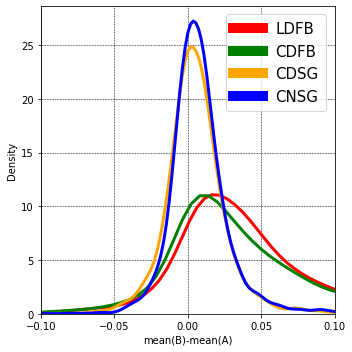

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

colors = ["red", "green", "orange", "blue"]
dataframe_lime_copy = dataframe_lime.copy()

legends = []
for i in range(0, 2):
    max_mean = 0
    min_var = 1000
    model = None
    for name in list(set(list(dataframe_lime_copy["models"]))):
        select_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.mean(values)
        var = np.var(values)
        if mean > max_mean:
            max_mean = mean
            min_var = var
            model = name
    selected_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==model)]
    sns.kdeplot(data=selected_dataframe, x="difference", lw=3, color=colors[i])
    cond = dataframe_lime_copy['models'].isin(selected_dataframe['models'])
    dataframe_lime_copy.drop(dataframe_lime_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legends.append(label)

for i in range(2, 4):
    min_mean = 1000
    max_var = 0
    model = None
    for name in list(set(dataframe_lime_copy["models"])):
        select_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.mean(values)
        var = np.var(values)
        if mean < min_mean:
            min_mean = mean
            max_var = var
            model = name
    selected_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==model)]
    sns.kdeplot(data=selected_dataframe, x="difference", lw=3, color=colors[i])
    cond = dataframe_lime_copy['models'].isin(selected_dataframe['models'])
    dataframe_lime_copy.drop(dataframe_lime_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legends.append(label)

legends[2], legends[3] = legends[3], legends[2]
    
ax.set_xlim(-0.1, 0.1)
ax.set_xlabel("mean(B)-mean(A)")

params = {'legend.fontsize': 15,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.titlepad': 12,
            'axes.axisbelow': True}
plt.rcParams.update(params)
    
leg = ax.legend(legends, loc='upper center', bbox_to_anchor=(0.8, 1.0), borderpad=0.5)
for index, legobj in enumerate(leg.legendHandles):
    legobj.set_linewidth(10.0)

fig.tight_layout()
plt.savefig('analysis/CompLing_results/'+dataset+'_lime_density_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.show()

In [9]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 7))

# dataframe_lime_copy = dataframe_lime.copy()
# colors = ["red", "green", "orange", "blue"]
# legends = []
# updated_dataframe = pd.DataFrame()

# for i in range(0, 2):
#     max_mean = 0
#     min_var = 1000
#     model = None
#     diff_values = None
#     for name in list(set(list(dataframe_lime_copy["models"]))):
#         select_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==name)]
#         values = np.array(list(select_dataframe["difference"]))
#         mean = np.mean(values)
#         var = np.var(values)
#         if mean > max_mean:
#             max_mean = mean
#             min_var = var
#             model = name
#             diff_values = values
#     selected_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==model)]
#     cond = dataframe_lime_copy['models'].isin(selected_dataframe['models'])
#     dataframe_lime_copy.drop(dataframe_lime_copy[cond].index, inplace = True)
#     base_model = model.split("-")[0]
#     word_embeddings = model.split("-")[1]
#     fine_tuning = model.split("-")[2]
#     if fine_tuning == "NON_STATIC":
#         fine_tuning = "FINE_TUNED"
#     if "DISTILLATION" in model.split("-"):
#         distillation = "DISTILLATION"
#     else:
#         distillation = "NO_DISTILLATION"
#     label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]+"\n"+"μ: "+str(round(max_mean, 3))+"\n"+"σ2: "+str(round(min_var, 4))
#     legends.append(label)
#     dataframe = pd.DataFrame({"models":[label]*len(diff_values),
#                             "difference":diff_values})
#     updated_dataframe = updated_dataframe.append(dataframe)

# for i in range(2, 4):
#     min_mean = 1000
#     max_var = 0
#     model = None
#     diff_values = None
#     for name in list(set(dataframe_lime_copy["models"])):
#         select_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==name)]
#         values = np.array(list(select_dataframe["difference"]))
#         mean = np.mean(values)
#         var = np.var(values)
#         if mean < min_mean:
#             min_mean = mean
#             max_var = var
#             model = name
#             diff_values = values
#     selected_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==model)]
#     cond = dataframe_lime_copy['models'].isin(selected_dataframe['models'])
#     dataframe_lime_copy.drop(dataframe_lime_copy[cond].index, inplace = True)
#     base_model = model.split("-")[0]
#     word_embeddings = model.split("-")[1]
#     fine_tuning = model.split("-")[2]
#     if fine_tuning == "NON_STATIC":
#         fine_tuning = "FINE_TUNED"
#     if "DISTILLATION" in model.split("-"):
#         distillation = "DISTILLATION"
#     else:
#         distillation = "NO_DISTILLATION"
#     label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]+"\n"+"μ: "+str(round(min_mean, 3))+"\n"+"σ2: "+str(round(max_var, 4))
#     legends.append(label)
#     dataframe = pd.DataFrame({"models":[label]*len(diff_values),
#                             "difference":diff_values})
#     updated_dataframe = updated_dataframe.append(dataframe)
    
# legends[2], legends[3] = legends[3], legends[2]

# sns.kdeplot(data=updated_dataframe.loc[updated_dataframe["models"]==legends[0]], x="difference", lw=3, color=colors[0], ax=ax1, fill=True)
# sns.kdeplot(data=updated_dataframe.loc[updated_dataframe["models"]==legends[1]], x="difference", lw=3, color=colors[1], ax=ax2, fill=True)
# sns.kdeplot(data=updated_dataframe.loc[updated_dataframe["models"]==legends[2]], x="difference", lw=3, color=colors[2], ax=ax3, fill=True)
# sns.kdeplot(data=updated_dataframe.loc[updated_dataframe["models"]==legends[3]], x="difference", lw=3, color=colors[3], ax=ax4, fill=True)

# ax1.set_xlim(-0.1, 0.1)
# ax1.set_ylim(0, 15)
# ax1.set_xlabel("")
# ax1.set_ylabel("")
# ax1.set_yticks([])
# # ax1.set_xticks([])
# ax1.spines['top'].set_visible(False)
# # ax1.spines['left'].set_visible(False)

# ax2.set_xlim(-0.1, 0.1)
# ax2.set_ylim(0, 15)
# ax2.set_xlabel("")
# ax2.set_ylabel("")
# ax2.set_yticks([])
# # ax2.set_xticks([])
# ax2.spines['top'].set_visible(False)

# ax3.set_xlim(-0.1, 0.1)
# ax3.set_ylim(0, 30)
# ax3.set_xlabel("")
# ax3.set_ylabel("")
# ax3.set_yticks([])
# # ax3.set_xticks([])
# ax3.spines['top'].set_visible(False)

# ax4.set_xlim(-0.1, 0.1)
# ax4.set_ylim(0, 30)
# ax4.set_xlabel("mean(B)-mean(A)")
# ax4.set_ylabel("")
# ax4.set_yticks([])
# # ax4.set_xticks([])
# ax4.spines['top'].set_visible(False)

# ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# ax4.grid(color = 'black', linestyle = '--', linewidth = 0.5)

# params = {'legend.fontsize': 13,
#             'axes.labelsize': 15,
#             'axes.titlesize': 13,
#             'xtick.labelsize': 15,
#             'ytick.labelsize': 15,
#             'axes.titlepad': 12,
#             'axes.axisbelow': True}
# plt.rcParams.update(params)

# leg1 = ax1.legend([legends[0]], loc='upper center', bbox_to_anchor=(0.1, 0.6), borderpad=0, frameon=False)
# for index, legobj in enumerate(leg1.legendHandles):
#     legobj.set_linewidth(0)
# # ax1.set_title(legends[0], loc='left', pad=-120)

# leg2 = ax2.legend([legends[1]], loc='upper center', bbox_to_anchor=(0.1, 0.6), borderpad=0, frameon=False)
# for index, legobj in enumerate(leg2.legendHandles):
#     legobj.set_linewidth(0)
# # ax2.set_title(legends[1], loc='left', pad=-60)

# leg3 = ax3.legend([legends[2]], loc='upper center', bbox_to_anchor=(0.1, 0.6), borderpad=0, frameon=False)
# for index, legobj in enumerate(leg3.legendHandles):
#     legobj.set_linewidth(0)
# # ax3.set_title(legends[2], loc='left', pad=-60)

# leg4 = ax4.legend([legends[3]], loc='upper center', bbox_to_anchor=(0.1, 0.6), borderpad=0, frameon=False)
# for index, legobj in enumerate(leg4.legendHandles):
#     legobj.set_linewidth(0)
# # ax4.set_title(legends[3], loc='left', pad=-60)
    
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.0)
# plt.savefig('analysis/CompLing_results/'+dataset+'_lime_density_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
# plt.show()

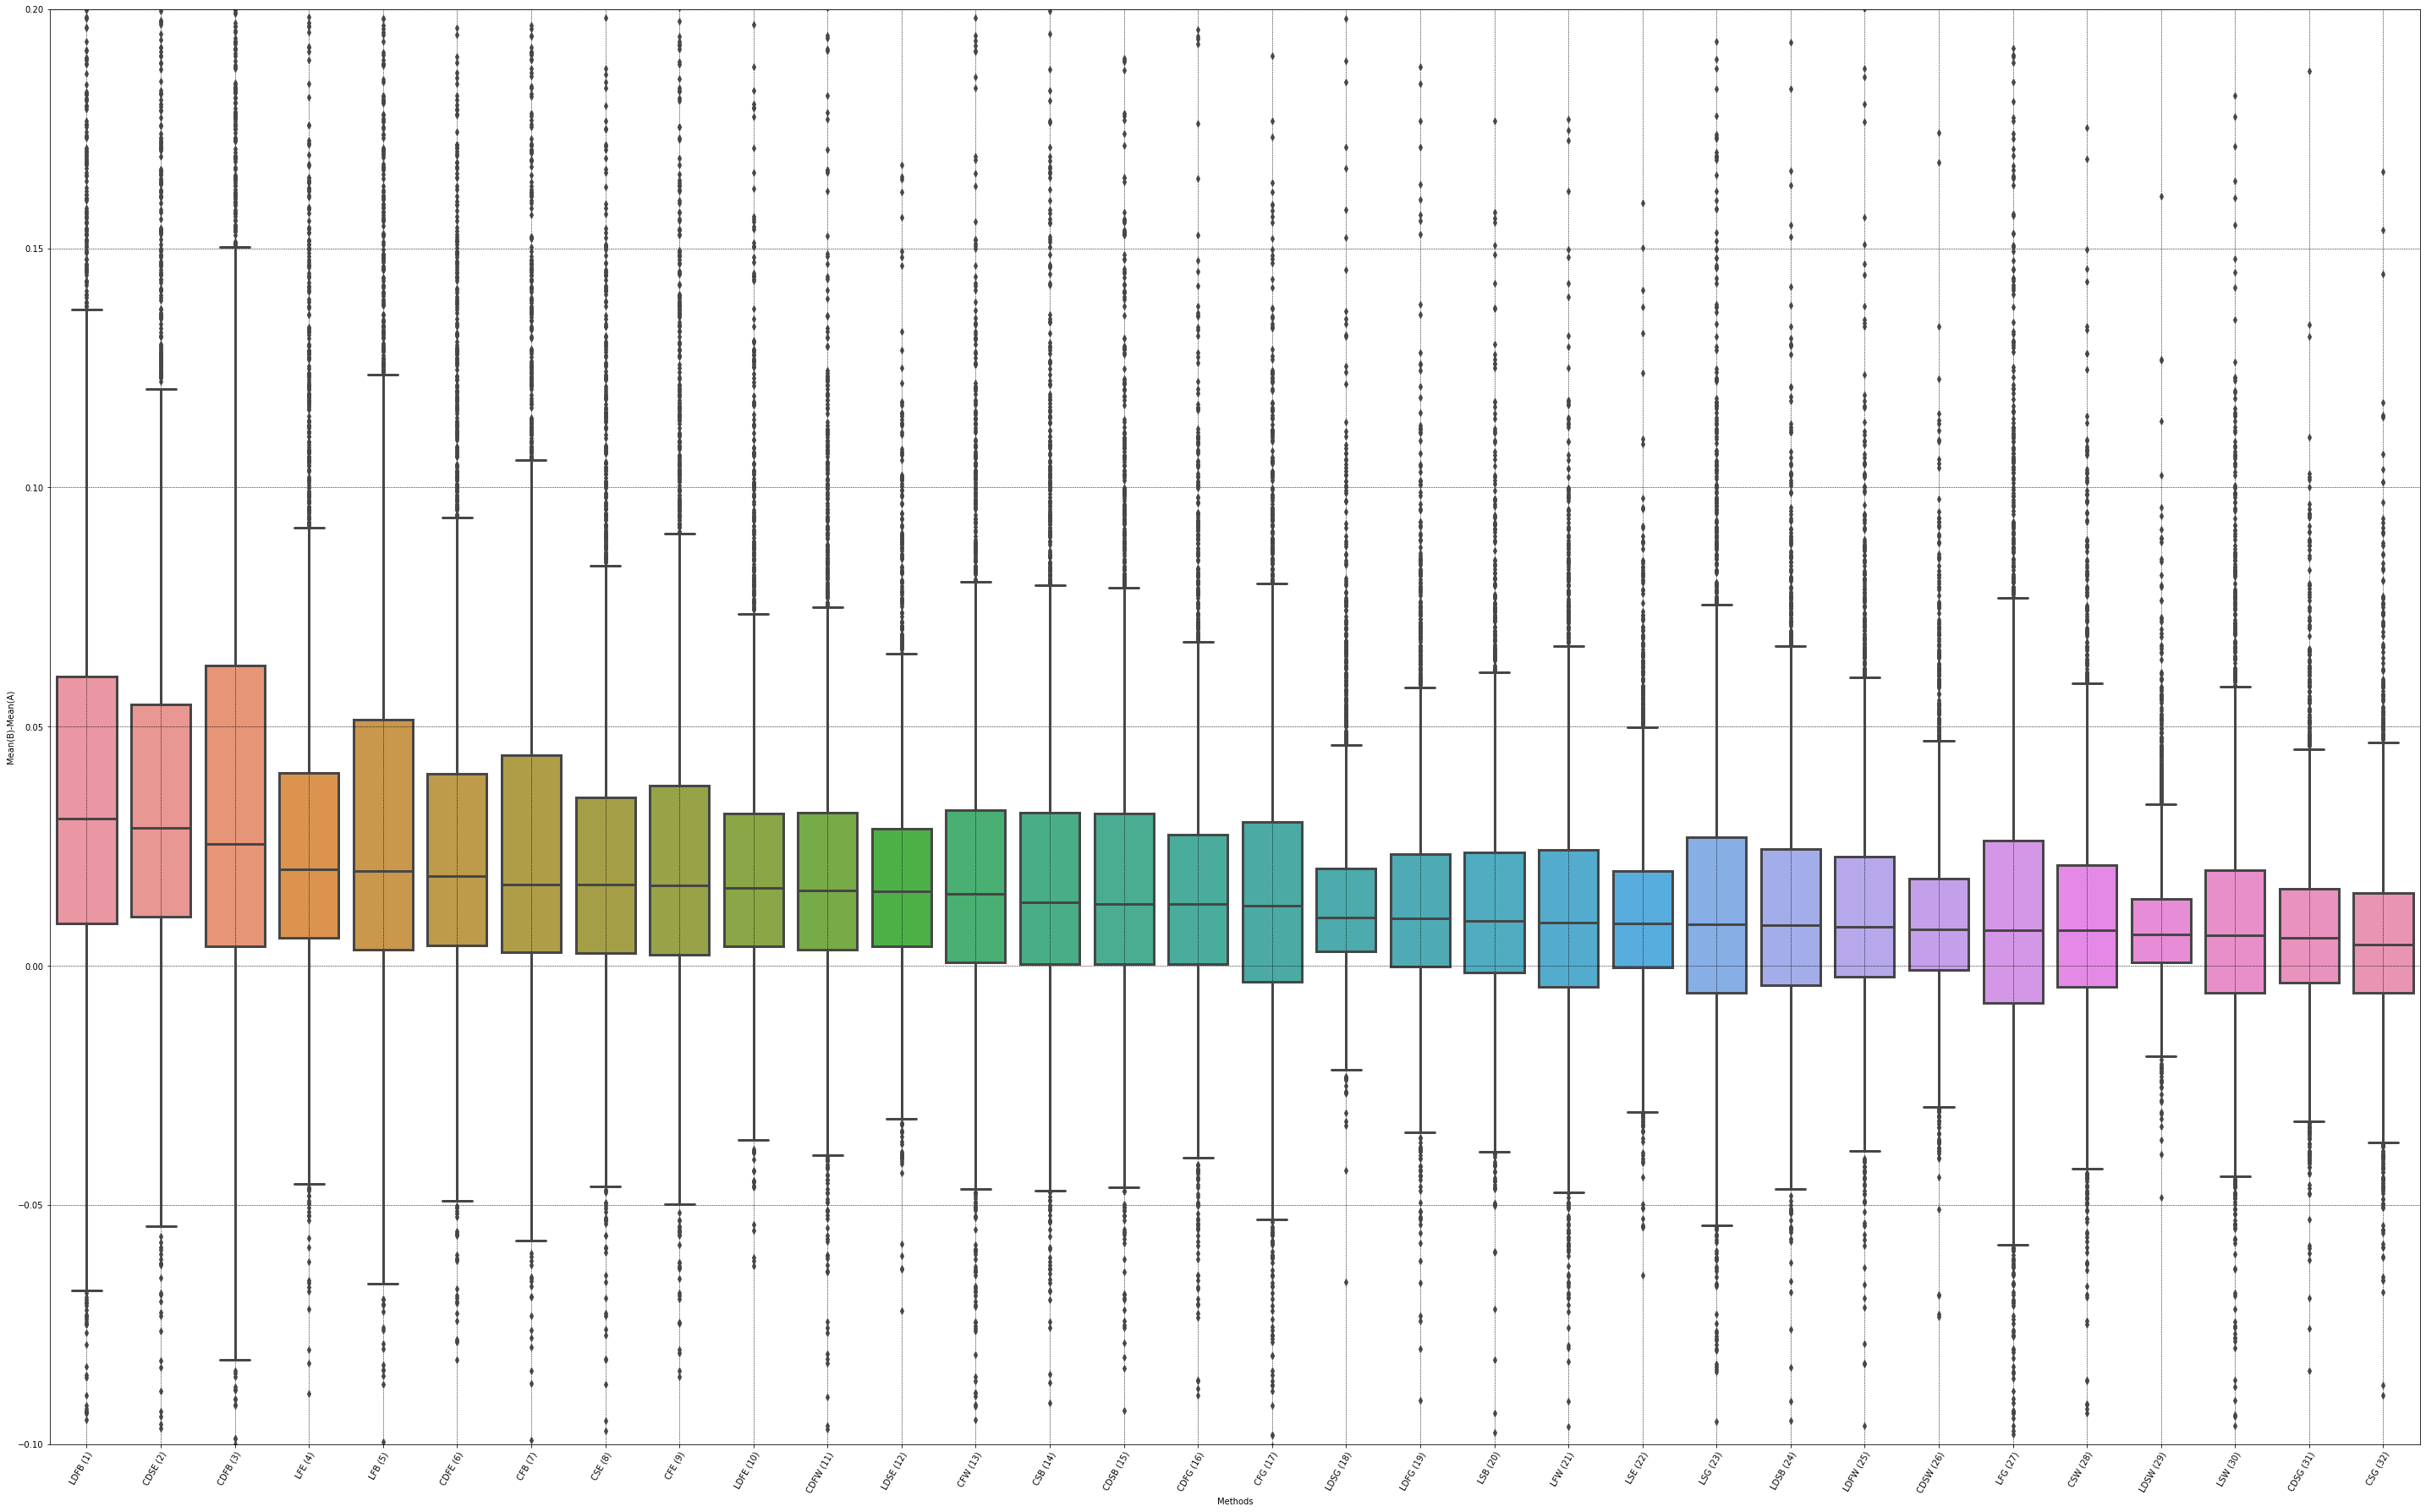

In [8]:
dataframe_lime_copy = dataframe_lime.copy()
updated_dataframe = pd.DataFrame()
legend_names = []
mean_values = []
var_values = []
legend_values = []
for i in range(0, len(set(dataframe_lime_copy["models"]))):
    max_mean = 0
    min_var = 1000
    model = None
    diff_values = None
    for name in list(set(list(dataframe_lime_copy["models"]))):
        select_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.median(values)
        var = np.var(values)
        if mean > max_mean:
            max_mean = mean
            min_var = var
            model = name
            diff_values = values
    selected_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==model)]
    cond = dataframe_lime_copy['models'].isin(selected_dataframe['models'])
    dataframe_lime_copy.drop(dataframe_lime_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legend_names.append(label)
    mean_var = "μ: "+str(round(max_mean, 3))+"\n"+"σ2: "+str(round(min_var, 4))
    legend_values.append(mean_var)
    mean_values.append(max_mean)
    var_values.append(min_var)
    dataframe = pd.DataFrame({"models":[label]*len(diff_values),
                            "mean(B)-mean(A)":diff_values})
    updated_dataframe = updated_dataframe.append(dataframe)

# fig, axes = plt.subplots(32, 1, figsize=(30, 43)) # width, height
# # colors = iter(cm.winter(np.linspace(0, 1, 32)))

# pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
# colors = iter(ListedColormap(pal).colors)

# for index, ax in enumerate(axes.reshape(-1)):
#     color = next(colors)
#     sns.kdeplot(data=updated_dataframe.loc[updated_dataframe["models"]==legend_names[index]], x="mean(B)-mean(A)", lw=3, color=color, ax=ax, fill=True)

#     ax.set_xlim(-0.1, 0.1)
#     ax.set_ylim(0, 60)
#     ax.set_xlabel("")
#     ax.set_ylabel("")
#     ax.set_yticks([])
#     ax.set_xticks([])
# #     if index != len(axes.reshape(-1))-1:
#     if index == len(axes.reshape(-1))-1:
#         ax.set_xlabel("mean(B)-mean(A)")
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    
#     updated_model = ""
#     if legend_names[index][0] == "C":
#         updated_model = updated_model + "C"
#     elif legend_names[index][0] == "L":
#         updated_model = updated_model + "L"

#     if legend_names[index][1] == "D":
#         updated_model = updated_model + "D"

#     if legend_names[index][2] == "S":
#         updated_model = updated_model + "S"
#     elif legend_names[index][2] == "F":
#         updated_model = updated_model + "F"

#     if legend_names[index][3] == "W":
#         updated_model = updated_model + "W"
#     elif legend_names[index][3] == "G":
#         updated_model = updated_model + "G"
#     elif legend_names[index][3] == "E":
#         updated_model = updated_model + "E"
#     elif legend_names[index][3] == "B":
#         updated_model = updated_model + "B"
    
#     props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#     ax.text(0.05, 0.5, updated_model+" ("+str(index+1)+")", transform=ax.transAxes, fontsize=43, verticalalignment='top', color=color)
#     ax.text(0.90, 0.95, legend_values[index], transform=ax.transAxes, fontsize=35, verticalalignment='top', color=color)
    
#     params = {'legend.fontsize': 20,
#                 'axes.labelsize': 40,
#                 'axes.titlesize': 30,
#                 'xtick.labelsize': 30,
#                 'ytick.labelsize': 30,
#                 'axes.titlepad': 12,
#                 'axes.axisbelow': True}
#     plt.rcParams.update(params)
    
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.0)
# plt.savefig('analysis/CompLing_results/'+dataset+'_lime_density_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
# plt.show()

fig, ax = plt.subplots(figsize=(40, 25))
width = 0.6

sns.set_theme(style="ticks", palette="pastel")
# pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
sns.boxplot(y="mean(B)-mean(A)", x="models", data=updated_dataframe, linewidth=3.0)
ax.set_ylabel("Mean(B)-Mean(A)")
ax.set_xlabel("Methods")

updated_legend_names = []
for index in range(len(legend_names)):
    updated_model = ""
    if legend_names[index][0] == "C":
        updated_model = updated_model + "C"
    elif legend_names[index][0] == "L":
        updated_model = updated_model + "L"

    if legend_names[index][1] == "D":
        updated_model = updated_model + "D"

    if legend_names[index][2] == "S":
        updated_model = updated_model + "S"
    elif legend_names[index][2] == "F":
        updated_model = updated_model + "F"

    if legend_names[index][3] == "W":
        updated_model = updated_model + "W"
    elif legend_names[index][3] == "G":
        updated_model = updated_model + "G"
    elif legend_names[index][3] == "E":
        updated_model = updated_model + "E"
    elif legend_names[index][3] == "B":
        updated_model = updated_model + "B"
    updated_model = updated_model + " ("+str(index+1)+")"
    updated_legend_names.append(updated_model)
    
ax.set_xticklabels(updated_legend_names)
ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax.set_ylim(-0.1, 0.2)

params = {'legend.fontsize': 30,
        'axes.labelsize': 60,
        'axes.titlesize': 60,
        'xtick.labelsize': 60,
        'ytick.labelsize': 60,
        'axes.titlepad': 12,
        'axes.axisbelow': True}
plt.rcParams.update(params)

plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
plt.tight_layout()
plt.savefig('analysis/CompLing_results/'+dataset+'_lime_density_box_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


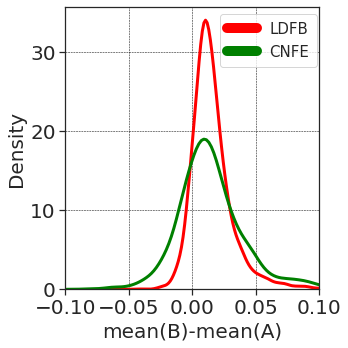

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

colors = ["red", "green", "orange", "blue"]
dataframe_shap_copy = dataframe_shap.copy()

legends = []
for i in range(0, 2):
    max_mean = 0
    min_var = 1000
    model = None
    for name in list(set(list(dataframe_shap_copy["models"]))):
        select_dataframe = dataframe_shap_copy.loc[(dataframe_shap_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.mean(values)
        var = np.var(values)
        if mean > max_mean:
            max_mean = mean
            min_var = var
            model = name
    selected_dataframe = dataframe_shap_copy.loc[(dataframe_shap_copy["models"]==model)]
    sns.kdeplot(data=selected_dataframe, x="difference", lw=3, color=colors[i])
    cond = dataframe_shap_copy['models'].isin(selected_dataframe['models'])
    dataframe_shap_copy.drop(dataframe_shap_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legends.append(label)

for i in range(2, 4):
    min_mean = 1000
    max_var = 0
    model = None
    for name in list(set(dataframe_shap_copy["models"])):
        select_dataframe = dataframe_shap_copy.loc[(dataframe_shap_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.mean(values)
        var = np.var(values)
        if mean < min_mean:
            min_mean = mean
            max_var = var
            model = name
    selected_dataframe = dataframe_shap_copy.loc[(dataframe_shap_copy["models"]==model)]
    sns.kdeplot(data=selected_dataframe, x="difference", lw=3, color=colors[i])
    cond = dataframe_shap_copy['models'].isin(selected_dataframe['models'])
    dataframe_shap_copy.drop(dataframe_shap_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legends.append(label)

legends[2], legends[3] = legends[3], legends[2]

ax.set_xlim(-0.1, 0.1)
ax.set_xlabel("mean(B)-mean(A)")
# ax.set_linewidth(4)

params = {'legend.fontsize': 15,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.titlepad': 12,
            'axes.axisbelow': True}
plt.rcParams.update(params)

legends[0] = "LDFB"
legends[1] = "CNFE"
leg = ax.legend(legends, loc='upper center', bbox_to_anchor=(0.8, 1.0), borderpad=0.5)
# leg.get_frame().set_length(2.0)
for index, legobj in enumerate(leg.legendHandles):
    legobj.set_linewidth(10.0)

plt.savefig('analysis/CompLing_results/'+dataset+'_shap_density_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
fig.tight_layout()
plt.show()

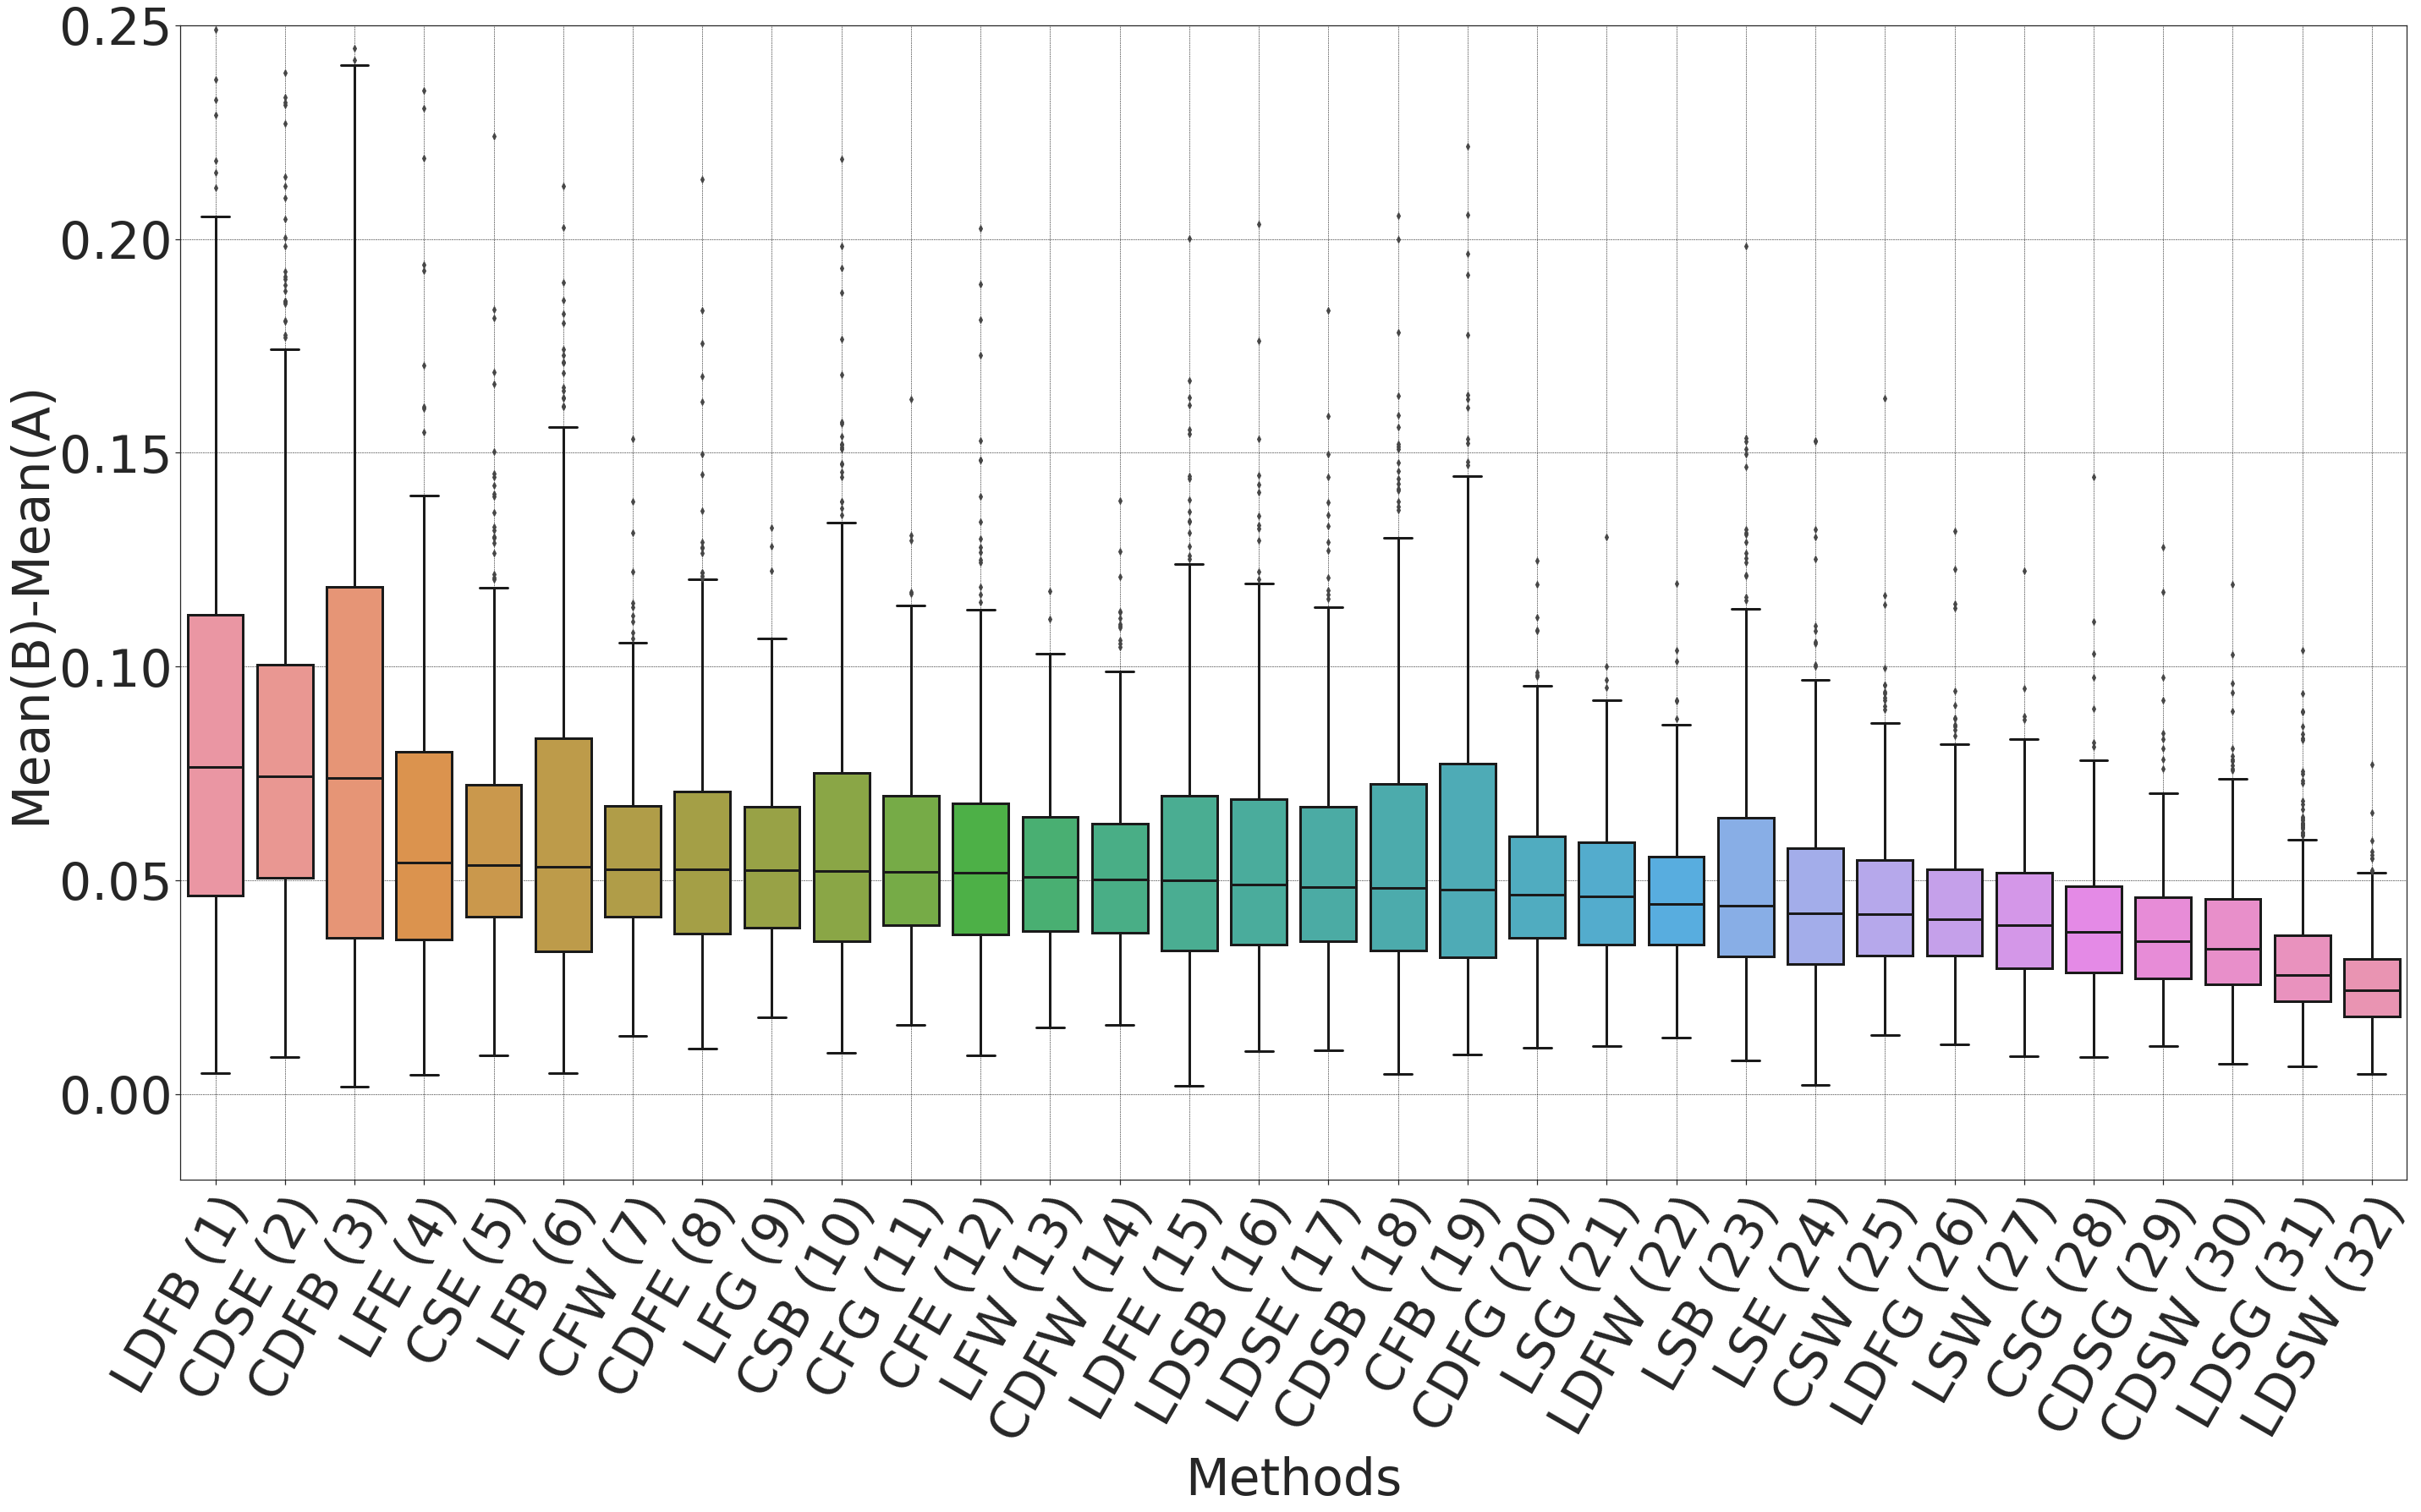

In [59]:
dataframe_lime_copy = dataframe_shap.copy()
updated_dataframe = pd.DataFrame()
legend_names = []
mean_values = []
var_values = []
legend_values = []
for i in range(0, len(set(dataframe_lime_copy["models"]))):
    max_mean = 0
    min_var = 1000
    model = None
    diff_values = None
    for name in list(set(list(dataframe_lime_copy["models"]))):
        select_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.median(values)
        var = np.var(values)
        if mean > max_mean:
            max_mean = mean
            min_var = var
            model = name
            diff_values = values
    selected_dataframe = dataframe_lime_copy.loc[(dataframe_lime_copy["models"]==model)]
    cond = dataframe_lime_copy['models'].isin(selected_dataframe['models'])
    dataframe_lime_copy.drop(dataframe_lime_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legend_names.append(label)
    mean_var = "μ: "+str(round(max_mean, 3))+"\n"+"σ2: "+str(round(min_var, 4))
    legend_values.append(mean_var)
    mean_values.append(max_mean)
    var_values.append(min_var)
    dataframe = pd.DataFrame({"models":[label]*len(diff_values),
                            "mean(B)-mean(A)":diff_values})
    updated_dataframe = updated_dataframe.append(dataframe)

# fig, axes = plt.subplots(32, 1, figsize=(30, 43)) # width, height
# # colors = iter(cm.winter(np.linspace(0, 1, 32)))

# pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
# colors = iter(ListedColormap(pal).colors)

# for index, ax in enumerate(axes.reshape(-1)):
#     color = next(colors)
#     sns.kdeplot(data=updated_dataframe.loc[updated_dataframe["models"]==legend_names[index]], x="mean(B)-mean(A)", lw=3, color=color, ax=ax, fill=True)

#     ax.set_xlim(-0.1, 0.1)
#     ax.set_ylim(0, 60)
#     ax.set_xlabel("")
#     ax.set_ylabel("")
#     ax.set_yticks([])
#     ax.set_xticks([])
# #     if index != len(axes.reshape(-1))-1:
#     if index == len(axes.reshape(-1))-1:
#         ax.set_xlabel("mean(B)-mean(A)")
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    
#     updated_model = ""
#     if legend_names[index][0] == "C":
#         updated_model = updated_model + "C"
#     elif legend_names[index][0] == "L":
#         updated_model = updated_model + "L"

#     if legend_names[index][1] == "D":
#         updated_model = updated_model + "D"

#     if legend_names[index][2] == "S":
#         updated_model = updated_model + "S"
#     elif legend_names[index][2] == "F":
#         updated_model = updated_model + "F"

#     if legend_names[index][3] == "W":
#         updated_model = updated_model + "W"
#     elif legend_names[index][3] == "G":
#         updated_model = updated_model + "G"
#     elif legend_names[index][3] == "E":
#         updated_model = updated_model + "E"
#     elif legend_names[index][3] == "B":
#         updated_model = updated_model + "B"
    
#     props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#     ax.text(0.05, 0.5, updated_model+" ("+str(index+1)+")", transform=ax.transAxes, fontsize=43, verticalalignment='top', color=color)
#     ax.text(0.90, 0.95, legend_values[index], transform=ax.transAxes, fontsize=35, verticalalignment='top', color=color)
    
#     params = {'legend.fontsize': 20,
#                 'axes.labelsize': 40,
#                 'axes.titlesize': 30,
#                 'xtick.labelsize': 30,
#                 'ytick.labelsize': 30,
#                 'axes.titlepad': 12,
#                 'axes.axisbelow': True}
#     plt.rcParams.update(params)
    
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.0)
# plt.savefig('analysis/CompLing_results/'+dataset+'_lime_density_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
# plt.show()

fig, ax = plt.subplots(figsize=(40, 25))
width = 0.6

sns.set_theme(style="ticks", palette="pastel")
# pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
sns.boxplot(y="mean(B)-mean(A)", x="models", data=updated_dataframe, linewidth=3.0)
ax.set_ylabel("Mean(B)-Mean(A)")
ax.set_xlabel("Methods")

ranks_qualitative_performances = []
updated_legend_names = []
for index in range(len(legend_names)):
    updated_model = ""
    if legend_names[index][0] == "C":
        updated_model = updated_model + "C"
    elif legend_names[index][0] == "L":
        updated_model = updated_model + "L"

    if legend_names[index][1] == "D":
        updated_model = updated_model + "D"

    if legend_names[index][2] == "S":
        updated_model = updated_model + "S"
    elif legend_names[index][2] == "F":
        updated_model = updated_model + "F"

    if legend_names[index][3] == "W":
        updated_model = updated_model + "W"
    elif legend_names[index][3] == "G":
        updated_model = updated_model + "G"
    elif legend_names[index][3] == "E":
        updated_model = updated_model + "E"
    elif legend_names[index][3] == "B":
        updated_model = updated_model + "B"
    updated_model = updated_model + " ("+str(index+1)+")"
    updated_legend_names.append(updated_model)
    ranks_qualitative_performances.append(index+1)
    
ax.set_xticklabels(updated_legend_names)
ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax.set_ylim(-0.02, 0.25)

params = {'legend.fontsize': 30,
        'axes.labelsize': 60,
        'axes.titlesize': 60,
        'xtick.labelsize': 60,
        'ytick.labelsize': 60,
        'axes.titlepad': 12,
        'axes.axisbelow': True}
plt.rcParams.update(params)

plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
plt.setp(ax.lines, color='k')
plt.setp(ax.artists, edgecolor = 'k')
plt.tight_layout()
plt.savefig('analysis/CompLing_results/'+dataset+'_shap_density_box_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.show()

In [43]:
# dataframe_SST2 = updated_dataframe
# dataframe_SENTIMENT140 = updated_dataframe

In [44]:
# # dataframe_SST2 = dataframe_SST2.drop('models', 1)
# # dataframe_SENTIMENT140 = dataframe_SENTIMENT140.drop('models', 1)
# # dataframe_SST2["dataset"] = ["SST2"]*len(dataframe_SST2)
# # dataframe_SENTIMENT140["dataset"] = ["SENTIMENT140"]*len(dataframe_SENTIMENT140)
# # dataframe_SST2 = dataframe_SST2.reset_index(drop=True)
# # dataframe_SENTIMENT140 = dataframe_SENTIMENT140.reset_index(drop=True)
# dataframe_combined = pd.concat([dataframe_SST2, dataframe_SENTIMENT140])

# fig, ax = plt.subplots(figsize=(20, 5))
# width = 0.6

# sns.set_theme(style="ticks", palette="pastel")
# # pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
# sns.boxplot(y="mean(B)-mean(A)", x="dataset", data=dataframe_combined, linewidth=3.0)
# ax.set_ylabel("Mean(B)-Mean(A)")
# ax.set_xlabel("")

# ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# ax.set_ylim(-0.02, 0.17)

# params = {'legend.fontsize': 30,
#             'axes.labelsize': 35,
#             'axes.titlesize': 30,
#             'xtick.labelsize': 30,
#             'ytick.labelsize': 30,
#             'axes.titlepad': 12,
#             'axes.axisbelow': True}
# plt.rcParams.update(params)

# plt.setp(ax.get_xticklabels())
# plt.tight_layout()
# plt.savefig('analysis/CompLing_results/datasets_box_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
# plt.show()

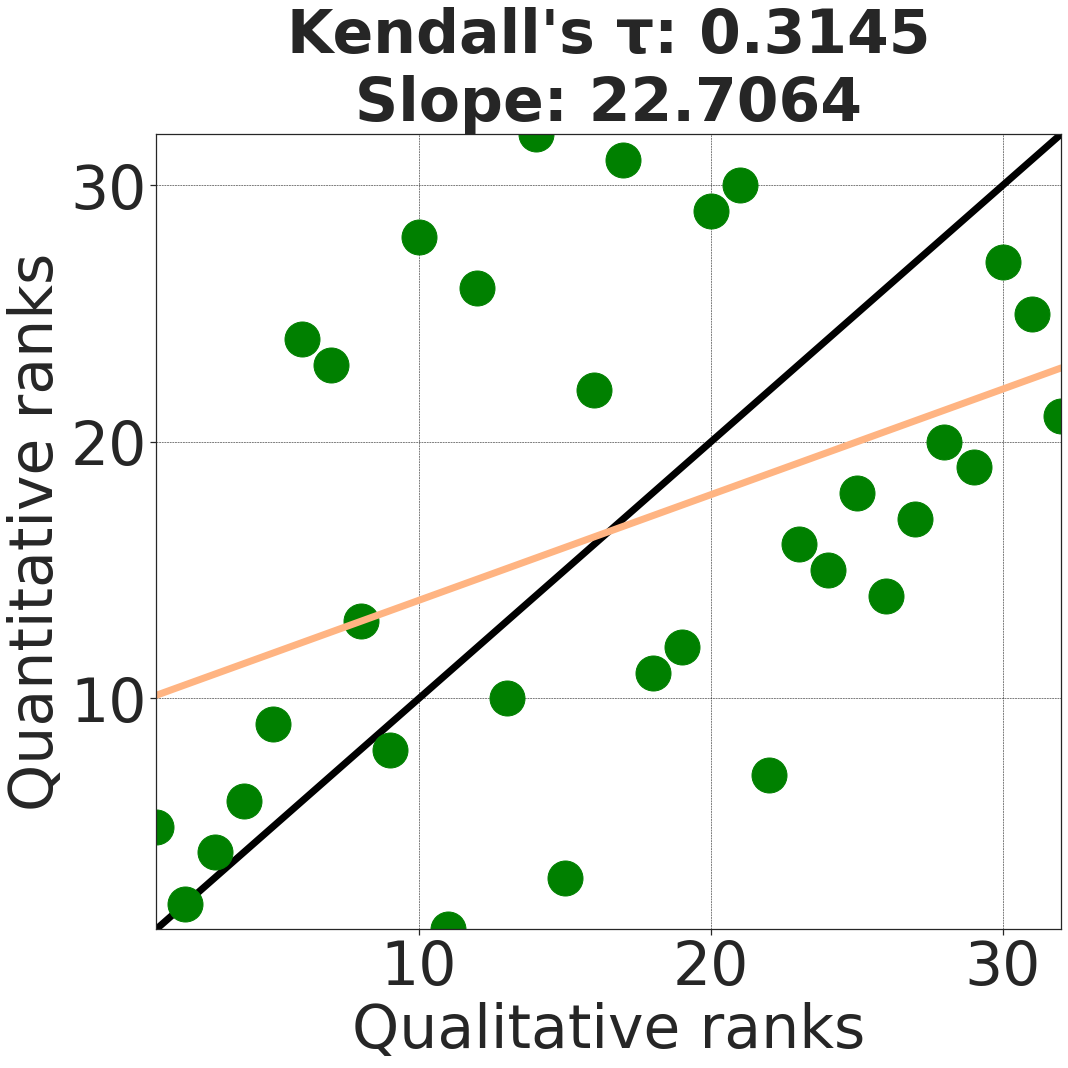

In [45]:
# Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

fig, ax = plt.subplots(figsize=(15, 15)) # width, height
plt.grid()

def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

from math import atan
def findAngle(M1, M2):
    PI = 3.14159265
    angle = abs((M2 - M1) / (1 + M1 * M2))
    ret = atan(angle)
    val = (ret * 180) / PI
    return round(val, 4)

x = [val for val in range(1, 33)]
y = [val for val in range(1, 33)]
ax.plot(x, y)
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*np.array(x)+b, color="black", linewidth=7)
percy_scores_ranks = list(len(percy_score_shap)+1-rankdata(percy_score_shap, method='ordinal').astype(int))
corresponding_quantitative_performances = []
for legend in legend_names:
    percy_score_rank = percy_scores_ranks[labels.index(legend)]
    corresponding_quantitative_performances.append(percy_score_rank)
ax.plot(ranks_qualitative_performances, corresponding_quantitative_performances, 'o', markersize=35, color="green")
m, b = np.polyfit(ranks_qualitative_performances, corresponding_quantitative_performances, 1)
points = m*np.array(ranks_qualitative_performances)+b
ax.plot(ranks_qualitative_performances, points, linewidth=7)
m1 = round(slope(x[0], y[0], x[1], y[1]), 2)
m2 = round(slope(ranks_qualitative_performances[0], points[0], ranks_qualitative_performances[1], points[1]), 2)
angle = findAngle(m1, m2)
ax.set_title("Kendall's τ: "+str(round(kendalltau(ranks_qualitative_performances, corresponding_quantitative_performances)[0], 4))+"\n"
             'Slope: '+str(angle), fontweight='bold')

ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

ax.set_xlim(1, 32)
ax.set_ylim(1, 32)

ax.set_xlabel("Qualitative ranks")
ax.set_ylabel("Quantitative ranks")

params = {'figure.titlesize':40,
            'legend.fontsize': 30,
            'axes.labelsize': 70,
            'axes.titlesize': 65,
            'xtick.labelsize': 70,
            'ytick.labelsize': 70,
            'axes.titlepad': 20,
            'axes.axisbelow': True}
plt.rcParams.update(params)
# plt.subplots_adjust(wspace=1.0)
plt.tight_layout()
plt.savefig('analysis/CompLing_results/'+dataset+'_SHAP_box_plot_ranks_scatter_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.show()

In [34]:
# print(percy_score_shap)
# print(percy_scores_ranks)
# print(labels)
# print(legend_names)
print(ranks_qualitative_performances)
print(corresponding_quantitative_performances)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[4, 7, 10, 21, 18, 14, 16, 25, 32, 13, 22, 28, 23, 9, 6, 2, 1, 19, 27, 15, 31, 30, 11, 8, 24, 17, 29, 26, 20, 12, 3, 5]


In [ ]:
fig, ax = plt.subplots(figsize=(40, 25))
width = 0.6

sns.set_theme(style="ticks", palette="pastel")
# pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
sns.boxplot(y="mean(B)-mean(A)", x="models", data=updated_dataframe, linewidth=3.0)
ax.set_ylabel("Mean(B)-Mean(A)")
ax.set_xlabel("Methods")

updated_legend_names = []
for index in range(len(legend_names)):
    updated_model = ""
    if legend_names[index][0] == "C":
        updated_model = updated_model + "C"
    elif legend_names[index][0] == "L":
        updated_model = updated_model + "L"

    if legend_names[index][1] == "D":
        updated_model = updated_model + "D"

    if legend_names[index][2] == "S":
        updated_model = updated_model + "S"
    elif legend_names[index][2] == "F":
        updated_model = updated_model + "F"

    if legend_names[index][3] == "W":
        updated_model = updated_model + "W"
    elif legend_names[index][3] == "G":
        updated_model = updated_model + "G"
    elif legend_names[index][3] == "E":
        updated_model = updated_model + "E"
    elif legend_names[index][3] == "B":
        updated_model = updated_model + "B"
    updated_model = updated_model + " ("+str(index+1)+")"
    updated_legend_names.append(updated_model)
    
ax.set_xticklabels(updated_legend_names)
ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax.set_ylim(-0.1, 0.2)

params = {'legend.fontsize': 30,
        'axes.labelsize': 60,
        'axes.titlesize': 60,
        'xtick.labelsize': 60,
        'ytick.labelsize': 60,
        'axes.titlepad': 12,
        'axes.axisbelow': True}
plt.rcParams.update(params)

plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
plt.tight_layout()
plt.savefig('analysis/CompLing_results/'+dataset+'_shap_density_box_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


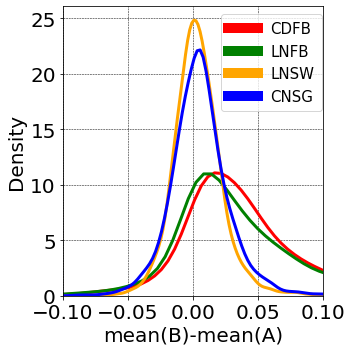

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

colors = ["red", "green", "orange", "blue"]
dataframe_int_grad_copy = dataframe_int_grad.copy()

legends = []
for i in range(0, 2):
    max_mean = 0
    min_var = 1000
    model = None
    for name in list(set(list(dataframe_int_grad_copy["models"]))):
        select_dataframe = dataframe_int_grad_copy.loc[(dataframe_int_grad_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.mean(values)
        var = np.var(values)
        if mean > max_mean:
            max_mean = mean
            min_var = var
            model = name
    selected_dataframe = dataframe_int_grad_copy.loc[(dataframe_int_grad_copy["models"]==model)]
    sns.kdeplot(data=selected_dataframe, x="difference", lw=3, color=colors[i])
    cond = dataframe_int_grad_copy['models'].isin(selected_dataframe['models'])
    dataframe_int_grad_copy.drop(dataframe_int_grad_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legends.append(label)

for i in range(2, 4):
    min_mean = 1000
    max_var = 0
    model = None
    for name in list(set(dataframe_int_grad_copy["models"])):
        select_dataframe = dataframe_int_grad_copy.loc[(dataframe_int_grad_copy["models"]==name)]
        values = np.array(list(select_dataframe["difference"]))
        mean = np.mean(values)
        var = np.var(values)
        if mean < min_mean:
            min_mean = mean
            max_var = var
            model = name
    selected_dataframe = dataframe_int_grad_copy.loc[(dataframe_int_grad_copy["models"]==model)]
    sns.kdeplot(data=selected_dataframe, x="difference", lw=3, color=colors[i])
    cond = dataframe_int_grad_copy['models'].isin(selected_dataframe['models'])
    dataframe_int_grad_copy.drop(dataframe_int_grad_copy[cond].index, inplace = True)
    base_model = model.split("-")[0]
    word_embeddings = model.split("-")[1]
    fine_tuning = model.split("-")[2]
    if fine_tuning == "NON_STATIC":
        fine_tuning = "FINE_TUNED"
    if "DISTILLATION" in model.split("-"):
        distillation = "DISTILLATION"
    else:
        distillation = "NO_DISTILLATION"
    label = base_model[0]+distillation[0]+fine_tuning[0]+word_embeddings[0]
    legends.append(label)

legends[2], legends[3] = legends[3], legends[2]

ax.set_xlim(-0.1, 0.1)
ax.set_xlabel("mean(B)-mean(A)")

params = {'legend.fontsize': 15,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.titlepad': 12,
            'axes.axisbelow': True}
plt.rcParams.update(params)

legends[0] = "CDFB"
legends[1] = "LNFB"
leg = ax.legend(legends, loc='upper center', bbox_to_anchor=(0.8, 1.0), borderpad=0.5)
# leg.get_frame().set_length(2.0)
for index, legobj in enumerate(leg.legendHandles):
    legobj.set_linewidth(10.0)

plt.savefig('analysis/CompLing_results/'+dataset+'_int_grad_density_plots.eps', bbox_inches = 'tight', facecolor='white', edgecolor='none')
fig.tight_layout()
plt.show()

In [9]:
import numpy as np

def generate(text_list, feature_att_scores, A_conjunct_color, B_conjunct_color):
    assert len(text_list) == len(feature_att_scores)
    
    # Convert feature_att_scores to numbers between 100 to 0
    A_conjunct = text_list[:text_list.index("but")]
    B_conjunct = text_list[text_list.index("but")+1:]
    if len(text_list) >= 10:
        count = 0
        indices_selected = []
        for i in range(10):
            if len(indices_selected) == 0:
                selected_list = feature_att_scores
            else:
                selected_list = [score for index, score in enumerate(feature_att_scores) if index not in indices_selected]
            max_score = max(selected_list)
            max_score_index = feature_att_scores.index(max_score)
            feature_att_scores[max_score_index] = 100 - count*10
            indices_selected.append(max_score_index)
            count += 1
    elif len(text_list) < 10:
        count = 0
        indices_selected = []
        for i in range(len(text_list)):
            if len(indices_selected) == 0:
                selected_list = feature_att_scores
            else:
                selected_list = [score for index, score in enumerate(feature_att_scores) if index not in indices_selected]
            max_score = max(selected_list)
            max_score_index = feature_att_scores.index(max_score)
            feature_att_scores[max_score_index] = 100 - count*int(100/len(text_list))
            indices_selected.append(max_score_index)
            count += 1
            
#     count = 0
#     indices_selected = []
#     for i in range(len(text_list)):
#         if len(indices_selected) == 0:
#             selected_list = feature_att_scores
#         else:
#             selected_list = [score for index, score in enumerate(feature_att_scores) if index not in indices_selected]
#         max_score = max(selected_list)
#         max_score_index = feature_att_scores.index(max_score)
#         feature_att_scores[max_score_index] = 100 - count*int(100/len(text_list))
#         indices_selected.append(max_score_index)
#         count += 1
    
    # Create the string
    string = ""
    for index, word in enumerate(text_list):
        if word in A_conjunct and feature_att_scores[index] != 0.0:
            string += "\colorbox{"+A_conjunct_color+"!"+str(feature_att_scores[index])+"}{"+word+"} "
        elif word in B_conjunct and feature_att_scores[index] != 0.0:
            if word == B_conjunct[len(B_conjunct)-1]:
                string += "\colorbox{"+B_conjunct_color+"!"+str(feature_att_scores[index])+"}{"+word+"}."
            else:
                string += "\colorbox{"+B_conjunct_color+"!"+str(feature_att_scores[index])+"}{"+word+"} "
        elif word == "but":
            string += "\\textcolor{blue}{\\textbf{"+word+"}} "
        else:
            string += word+" "
        
    return string

if __name__ == '__main__':
    ## This is a demo:

    words = 'bad', 'company', 'leaves', 'a', 'bad', 'taste', ',', 'not', 'only', 'because', 'of', 'its', 'bad', 'luck', 'timing', ',', 'but', 'also', 'the', 'staleness', 'of', 'its', 'script']
    feature_att_scores = [0.23745618601310037, 0.10969570998133776, 0.0, 0.035884505692558244, 0.0, 0.10969570998133776, 0.0, 0.0, 0.03941425603877555, 0.0, 0.06013192299631977, 0.0, 0.019390147291565206, 0.04015506469594372, 0.38226416454061896, 0.00032633462932870727]
    A_conjunct_color = 'red'
    B_conjunct_color = 'red'
    tex_code = generate(words, feature_att_scores.copy(), A_conjunct_color, B_conjunct_color)
    print(tex_code)

\colorbox{red!90}{tries} \colorbox{red!80}{to} add \colorbox{red!30}{some} spice \colorbox{red!70}{to} its quirky \colorbox{red!40}{sentiments} \textcolor{blue}{\textbf{but}} \colorbox{red!60}{the} taste \colorbox{red!20}{is} \colorbox{red!50}{all} \colorbox{red!100}{too} \colorbox{red!10}{familiar}.


In [2]:
print(len(words))

21


In [ ]:
# Table 1:-

# Sentiment140

# sentence:   ellen stafford aww would love to meet  schofe but i'm very much tired and having a major headache  
# sentiment:  0
# A conjunct:  ['aww', 'love', 'to', 'would', 'schofe']
# B conjunct:  ['away', 'happen', 'too', "i'm", 'will']
# A conjunct explanations:  [0.029403882755347745, 0.02572978926975403, 0.01817714344031229, 0.01664423838014187, 0.006929970488977748]
# B conjunct explanations:  [0.09892299004027334, 0.06440500163653529, 0.04763536142106958, 0.03332065161666837, 0.024625738312124747]
# A conjunct score:  0.019377004866906737
# B conjunct score:  0.053781948605334265
# features:  ['ellen', 'stafford', 'aww', 'would', 'love', 'to', 'meet', 'schofe', 'but', "i'm", 'very', 'much', 'tired', 'and', 'having', 'a', 'major', 'headache']
# no of features:  18
# Scores:  [0.0, 0.0, 0.029403882755347745, 0.01664423838014187, 0.02572978926975403, 0.01817714344031229, 0.0, 0.006929970488977748, 0.0, 0.03332065161666837, 0.04763536142106958, 0.0, 0.09892299004027334, 0.0, 0.0, 0.024625738312124747, 0.0, 0.06440500163653529]
# no of scores:  18

# sentence:  america  i don't think i've said this  but i fucking love you   so glad to be home 
# sentiment:  1
# A conjunct:  ['i', 'said', 'america', "don't", 'think']
# B conjunct:  ['love', 'i', 'glad', 'fucking', 'you']
# A conjunct explanations:  [0.09172359492177205, 0.010924708731633894, 0.009533716654157287, 0.00950449204228991, 0.008816970344454042]
# B conjunct explanations:  [0.09597775814155099, 0.09172359492177205, 0.08304087145872015, 0.06352406192028662, 0.044050891252056905]
# A conjunct score:  0.026100696538861434
# B conjunct score:  0.07566343553887735
# features:  ['america', 'i', "don't", 'think', "i've", 'said', 'this', 'but', 'i', 'fucking', 'love', 'you', 'so', 'glad', 'to', 'be', 'home']
# no of features:  17
# Scores:  [0.009533716654157287, 0.09172359492177205, 0.00950449204228991, 0.008816970344454042, 0.0, 0.010924708731633894, 0.0, 0.0, 0.09172359492177205, 0.06352406192028662, 0.09597775814155099, 0.044050891252056905, 0.0, 0.08304087145872015, 0.0, 0.0, 0.0]
# no of scores:  17

# sentence:  maybe make some new music today but hollywood is quite uninspirational         and unwilling to innovate either 
# sentiment:  0
# A conjunct:  ['today', 'music', 'make', 'new', 'some']
# B conjunct:  ['no', 'quite', 'uninspirational', 'bumps', 'c']
# A conjunct explanations:  [0.027047260836863218, 0.017947021531945953, 0.011143512234115206, 0.005518731305606966, 0.004692001349340267]
# B conjunct explanations:  [0.1143215929410383, 0.07127071536055901, 0.07122910359945797, 0.045326395839089255, 0.040924578842662644]
# A conjunct score:  0.013269705451574323
# B conjunct score:  0.06861447731656144
# features:  ['maybe', 'make', 'some', 'new', 'music', 'today', 'but', 'hollywood', 'is', 'quite', 'uninspirational', 'and', 'unwilling', 'to', 'innovate', 'either']
# no of features:  17
# Scores:  [0.0, 0.011143512234115206, 0.004692001349340267, 0.005518731305606966, 0.017947021531945953, 0.027047260836863218, 0.0, 0.0, 0.0, 0.07127071536055901, 0.07122910359945797, 0.0, 0.1143215929410383, 0.040924578842662644, 0.045326395839089255, 0.0]
# no of scores:  17

# SST2

# sentence:  lots of effort and intelligence are on display but in execution it is all awkward , static , and lifeless rumblings
# sentiment:  0
# A conjunct:  ['intelligence', 'on', 'effort', 'lots', 'and']
# B conjunct:  ['lifeless', 'awkward', 'static', 'execution', 'rumblings']
# A conjunct explanations:  [0.01866888717239301, 0.018283950509569855, 0.006956771879959856, 0.0022017739036776897, 4.950043091754336e-07]
# B conjunct explanations:  [0.14752899978226086, 0.09500109930026497, 0.05615841465115977, 0.049747103790898584, 0.03895237083261098]
# A conjunct score:  0.009222375693981917
# B conjunct score:  0.07747759767143904
# features:  ['lots', 'of', 'effort', 'and', 'intelligence', 'are', 'on', 'display', 'but', 'in', 'execution', 'it', 'is', 'all', 'awkward', ',', 'static', ',', 'and', 'lifeless', 'rumblings']
# no of features:  21
# Scores:  [0.0022017739036776897, 0.0, 0.006956771879959856, 4.950043091754336e-07, 0.01866888717239301, 0.0, 0.018283950509569855, 0.0, 0.0, 0.0, 0.049747103790898584, 0.0, 0.0, 0.0, 0.09500109930026497, 0.0, 0.05615841465115977, 0.0, 0.0, 0.14752899978226086, 0.03895237083261098]
# no of scores:  21

# sentence:  too daft by half but supremely good natured
# sentiment:  1
# A conjunct:  ['by', 'too', 'daft', 'half']
# B conjunct:  ['good', 'supremely', 'natured']
# A conjunct explanations:  [0.006774767190066569, 0.0005031923928037207, 0.00036157283903308937, 0.00030051914870040405]
# B conjunct explanations:  [0.35571050223342743, 0.32424571274428, 0.16069754346104181]
# A conjunct score:  0.0019850128926509458
# B conjunct score:  0.2802179194795831
# features:  ['too', 'daft', 'by', 'half', 'but', 'supremely', 'good', 'natured']
# no of features:  8
# Scores:  [0.0005031923928037207, 0.00036157283903308937, 0.006774767190066569, 0.00030051914870040405, 0.0, 0.32424571274428, 0.35571050223342743, 0.16069754346104181]
# no of scores:  8

# sentence:  it 's hard to imagine anyone managing to steal a movie not only from charismatic rising star jake gyllenhaal but also from accomplished oscar winners susan sarandon , dustin hoffman and holly hunter , yet newcomer ellen pompeo pulls off the feat with aplomb
# sentiment:  1
# A conjunct:  ['charismatic', 'star', 'managing', 'rising', 'from']
# B conjunct:  ['aplomb', 'oscar', 'winners', 'pulls', 'sarandon']
# A conjunct explanations:  [0.04944607767572232, 0.04745405946792376, 0.04730066217652603, 0.02322164685938106, 0.015514218067900536]
# B conjunct explanations:  [0.23057733881425538, 0.1409475468441685, 0.09790651808571561, 0.0852499698230831, 0.08373312233695507]
# A conjunct score:  0.03658733284949074
# B conjunct score:  0.12768289918083553
# features:  ['it', "'s", 'hard', 'to', 'imagine', 'anyone', 'managing', 'to', 'steal', 'a', 'movie', 'not', 'only', 'from', 'charismatic', 'rising', 'star', 'jake', 'gyllenhaal', 'but', 'also', 'from', 'accomplished', 'oscar', 'winners', 'susan', 'sarandon', ',', 'dustin', 'hoffman', 'and', 'holly', 'hunter', ',', 'yet', 'newcomer', 'ellen', 'pompeo', 'pulls', 'off', 'the', 'feat', 'with', 'aplomb']
# no of features:  44
# Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04730066217652603, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015514218067900536, 0.04944607767572232, 0.02322164685938106, 0.04745405946792376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1409475468441685, 0.09790651808571561, 0.0, 0.08373312233695507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0852499698230831, 0.0, 0.0, 0.0, 0.0, 0.23057733881425538]
# no of scores:  44

# Table 2:-

# SST2

# sentence:  `` analyze that '' is one of those crass , contrived sequels that not only fails on its own , but makes you second guess your affection for the original
# sentiment:  0
# A conjunct:  ['fails', 'crass', 'contrived', 'on', 'not']
# B conjunct:  ['guess', 'for', 'second', 'original', 'affection']
# A conjunct explanations:  [0.2136136251033408, 0.15276871677870318, 0.09564690903213924, 0.05112002540954376, 0.048581013356950864]
# B conjunct explanations:  [0.024434867667399093, 0.016129531672064785, 0.014838857861563687, 0.002248545973035719, 0.0001224473237766203]
# A conjunct score:  0.11234605793613557
# B conjunct score:  0.01155485009956798
# features:  ['``', 'analyze', 'that', "''", 'is', 'one', 'of', 'those', 'crass', ',', 'contrived', 'sequels', 'that', 'not', 'only', 'fails', 'on', 'its', 'own', ',', 'but', 'makes', 'you', 'second', 'guess', 'your', 'affection', 'for', 'the', 'original']
# no of features:  30
# Scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15276871677870318, 0.0, 0.09564690903213924, 0.0, 0.0, 0.048581013356950864, 0.0, 0.2136136251033408, 0.05112002540954376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014838857861563687, 0.024434867667399093, 0.0, 0.0001224473237766203, 0.016129531672064785, 0.0, 0.002248545973035719]
# no of scores:  30

# sentence:  a strong script , powerful direction and splendid production design allows us to be transported into the life of wladyslaw szpilman , who is not only a pianist , but a good human being
# sentiment:  1
# A conjunct:  ['splendid', 'powerful', 'allows', 'life', 'wladyslaw']
# B conjunct:  ['good', 'a', 'being', 'human']
# A conjunct explanations:  [0.01327536367624635, 0.012429284733566689, 0.010690432424026652, 0.010298045264799936, 0.009094524427539934]
# B conjunct explanations:  [0.01021291568848418, 0.0053397452342152174, 0.0020582830558842457, 0.0007057308535028096]
# A conjunct score:  0.011157530105235913
# B conjunct score:  0.004579168708021613
# features:  ['a', 'strong', 'script', ',', 'powerful', 'direction', 'and', 'splendid', 'production', 'design', 'allows', 'us', 'to', 'be', 'transported', 'into', 'the', 'life', 'of', 'wladyslaw', 'szpilman', ',', 'who', 'is', 'not', 'only', 'a', 'pianist', ',', 'but', 'a', 'good', 'human', 'being']
# no of features:  34
# Scores:  [0.0, 0.0, 0.0, 0.0, 0.012429284733566689, 0.0, 0.0, 0.01327536367624635, 0.0, 0.0, 0.010690432424026652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010298045264799936, 0.0, 0.009094524427539934, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053397452342152174, 0.01021291568848418, 0.0007057308535028096, 0.0020582830558842457]
# no of scores:  34

# sentence:  considering the harsh locations and demanding stunts , this must have been a difficult shoot , but the movie proves rough going for the audience as well
# sentiment:  0
# A conjunct:  ['harsh', 'been', 'difficult', 'and', 'locations']
# B conjunct:  ['well', 'rough', 'movie', 'proves', 'the']
# A conjunct explanations:  [0.04069002409037685, 0.03438654395966464, 0.025674899149037207, 0.018275385697844364, 0.01398042712857987]
# B conjunct explanations:  [0.018360472745322497, 0.01428306371469317, 0.013247336186763959, 0.0067491764564241484, 0.003529330552581265]
# A conjunct score:  0.026601456005100582
# B conjunct score:  0.011233875931157006
# features:  ['considering', 'the', 'harsh', 'locations', 'and', 'demanding', 'stunts', ',', 'this', 'must', 'have', 'been', 'a', 'difficult', 'shoot', ',', 'but', 'the', 'movie', 'proves', 'rough', 'going', 'for', 'the', 'audience', 'as', 'well']
# no of features:  27
# Scores:  [0.0, 0.0, 0.04069002409037685, 0.01398042712857987, 0.018275385697844364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03438654395966464, 0.0, 0.025674899149037207, 0.0, 0.0, 0.0, 0.003529330552581265, 0.013247336186763959, 0.0067491764564241484, 0.01428306371469317, 0.0, 0.0, 0.003529330552581265, 0.0, 0.0, 0.018360472745322497]
# no of scores:  27

# sentence:  a gorgeously strange movie , heaven is deeply concerned with morality , but it refuses to spell things out for viewers
# sentiment:  1
# A conjunct:  ['gorgeously', 'heaven', 'a', 'deeply', 'morality']
# B conjunct:  ['it', 'refuses', 'out', 'things', 'viewers']
# A conjunct explanations:  [0.27812909299873756, 0.14231864329133592, 0.08158174647018336, 0.06328634866582744, 0.06292248194323846]
# B conjunct explanations:  [0.005902609283560687, 0.004150712848244995, 0.0016837068064220059, 0.0013587252046652018, 0.0010309071753393413]
# A conjunct score:  0.12564766267386454
# B conjunct score:  0.0028253322636464457
# features:  ['a', 'gorgeously', 'strange', 'movie', ',', 'heaven', 'is', 'deeply', 'concerned', 'with', 'morality', ',', 'but', 'it', 'refuses', 'to', 'spell', 'things', 'out', 'for', 'viewers']
# no of features:  21
# Scores:  [0.08158174647018336, 0.27812909299873756, 0.0, 0.0, 0.0, 0.14231864329133592, 0.0, 0.06328634866582744, 0.0, 0.0, 0.06292248194323846, 0.0, 0.0, 0.005902609283560687, 0.004150712848244995, 0.0, 0.0, 0.0013587252046652018, 0.0016837068064220059, 0.0, 0.0010309071753393413]
# no of scores:  2

# Sentiment140




In [ ]:
#### Dividing SST-2 ####